# TFIM with NetKet: Plotting Baselines

This notebook generates two quick diagnostics:

1. **Energy vs $h/J$** (ED vs VMC) on a small 1D chain.
2. **Energy variance vs $N$** (VMC only) at fixed $h/J$.

The settings are intentionally small to keep runtime short. Increase `n_iter` and `n_samples` for cleaner curves.


In [1]:
import os
os.environ.setdefault("JAX_PLATFORM_NAME", "cpu")
os.environ.setdefault("JAX_ENABLE_X64", "0")

# Force CPU to avoid Metal backend dtype limitations.


'0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netket as nk

def make_tfim(graph, J=1.0, h=1.0):
    hilbert = nk.hilbert.Spin(s=0.5, N=graph.n_nodes)
    H = nk.operator.Ising(hilbert=hilbert, graph=graph, J=J, h=h)
    return hilbert, H

def run_vmc(H, hilbert, alpha=2, n_iter=150, n_samples=1024, lr=0.05):
    model = nk.models.RBM(alpha=alpha)
    sa = nk.sampler.MetropolisLocal(hilbert, n_chains=32)
    vstate = nk.vqs.MCState(sa, model, n_samples=n_samples, n_discard_per_chain=100)
    opt = nk.optimizer.Sgd(learning_rate=lr)
    vmc = nk.VMC(hamiltonian=H, optimizer=opt, variational_state=vstate)
    vmc.run(n_iter=n_iter)
    stats = vstate.expect(H)
    return stats.mean, stats.variance

print('NetKet', nk.__version__)


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


∣NK⟩ Tip: Debug multi-node HPC? `djaxrun -np 2 python Examples/Sharding/multi_process.py`

NetKet 3.21.0


## 1) Energy vs $h/J$ (1D, ED vs VMC)

We use a small periodic chain so ED is feasible. Energies are plotted **per site** to compare across sizes.


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-5.103 ± 0.097 [σ²=1.0e+01, R̂=1.010]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-4.825 ± 0.095 [σ²=9.9e+00, R̂=1.015]]

  1%|          | 1/150 [00:00<00:12, 11.75it/s, Energy=-4.946 ± 0.083 [σ²=1.0e+01, R̂=1.008]]

  1%|▏         | 2/150 [00:00<00:08, 18.41it/s, Energy=-5.040 ± 0.073 [σ²=1.0e+01, R̂=1.005]]

  2%|▏         | 3/150 [00:00<00:05, 27.50it/s, Energy=-5.040 ± 0.073 [σ²=1.0e+01, R̂=1.005]]

  2%|▏         | 3/150 [00:00<00:05, 27.50it/s, Energy=-5.04 ± 0.10 [σ²=1.1e+01, R̂=1.014]]  

  3%|▎         | 4/150 [00:00<00:05, 27.50it/s, Energy=-5.09 ± 0.11 [σ²=1.1e+01, R̂=1.016]]

  3%|▎         | 5/150 [00:00<00:05, 27.50it/s, Energy=-5.033 ± 0.100 [σ²=1.0e+01, R̂=1.012]]

  4%|▍         | 6/150 [00:00<00:05, 27.50it/s, Energy=-5.169 ± 0.082 [σ²=1.0e+01, R̂=1.015]]

  5%|▍         | 7/150 [00:00<00:05, 27.50it/s, Energy=-5.31 ± 0.12 [σ²=1.0e+01, R̂=1.018]]  

  5%|▌         | 8/150 [00:00<00:03, 36.74it/s, Energy=-5.31 ± 0.12 [σ²=1.0e+01, R̂=1.018]]

  5%|▌         | 8/150 [00:00<00:03, 36.74it/s, Energy=-5.34 ± 0.11 [σ²=9.5e+00, R̂=1.026]]

  6%|▌         | 9/150 [00:00<00:03, 36.74it/s, Energy=-5.442 ± 0.086 [σ²=9.2e+00, R̂=1.015]]

  7%|▋         | 10/150 [00:00<00:03, 36.74it/s, Energy=-5.95 ± 0.10 [σ²=9.8e+00, R̂=1.024]] 

  7%|▋         | 11/150 [00:00<00:03, 36.74it/s, Energy=-7.44 ± 0.13 [σ²=9.8e+00, R̂=1.037]]

  8%|▊         | 12/150 [00:00<00:03, 36.74it/s, Energy=-10.625 ± 0.012 [σ²=1.2e-01, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.76it/s, Energy=-10.625 ± 0.012 [σ²=1.2e-01, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.76it/s, Energy=-10.612 ± 0.015 [σ²=1.2e-01, R̂=1.050]]

  9%|▉         | 14/150 [00:00<00:03, 39.76it/s, Energy=-10.600 ± 0.023 [σ²=2.2e-01, R̂=1.047]]

 10%|█         | 15/150 [00:00<00:03, 39.76it/s, Energy=-10.616 ± 0.019 [σ²=1.2e-01, R̂=1.065]]

 11%|█         | 16/150 [00:00<00:03, 39.76it/s, Energy=-10.6282 ± 0.0067 [σ²=3.7e-02, R̂=1.029]]

 11%|█▏        | 17/150 [00:00<00:03, 39.76it/s, Energy=-10.624 ± 0.011 [σ²=8.5e-02, R̂=1.031]]  

 12%|█▏        | 18/150 [00:00<00:03, 41.26it/s, Energy=-10.624 ± 0.011 [σ²=8.5e-02, R̂=1.031]]

 12%|█▏        | 18/150 [00:00<00:03, 41.26it/s, Energy=-10.632 ± 0.011 [σ²=8.4e-02, R̂=1.025]]

 13%|█▎        | 19/150 [00:00<00:03, 41.26it/s, Energy=-10.617 ± 0.011 [σ²=7.8e-02, R̂=1.035]]

 13%|█▎        | 20/150 [00:00<00:03, 41.26it/s, Energy=-10.6184 ± 0.0077 [σ²=2.7e-02, R̂=1.055]]

 14%|█▍        | 21/150 [00:00<00:03, 41.26it/s, Energy=-10.6236 ± 0.0063 [σ²=5.2e-02, R̂=1.011]]

 15%|█▍        | 22/150 [00:00<00:03, 41.26it/s, Energy=-10.6302 ± 0.0063 [σ²=5.4e-02, R̂=1.011]]

 15%|█▌        | 23/150 [00:00<00:03, 42.04it/s, Energy=-10.6302 ± 0.0063 [σ²=5.4e-02, R̂=1.011]]

 15%|█▌        | 23/150 [00:00<00:03, 42.04it/s, Energy=-10.6176 ± 0.0073 [σ²=5.4e-02, R̂=1.012]]

 16%|█▌        | 24/150 [00:00<00:02, 42.04it/s, Energy=-10.6399 ± 0.0096 [σ²=6.6e-02, R̂=1.025]]

 17%|█▋        | 25/150 [00:00<00:02, 42.04it/s, Energy=-10.6128 ± 0.0062 [σ²=6.2e-02, R̂=1.006]]

 17%|█▋        | 26/150 [00:00<00:02, 42.04it/s, Energy=-10.6157 ± 0.0080 [σ²=4.7e-02, R̂=1.020]]

 18%|█▊        | 27/150 [00:00<00:02, 42.04it/s, Energy=-10.6254 ± 0.0064 [σ²=5.1e-02, R̂=1.010]]

 19%|█▊        | 28/150 [00:00<00:02, 42.53it/s, Energy=-10.6254 ± 0.0064 [σ²=5.1e-02, R̂=1.010]]

 19%|█▊        | 28/150 [00:00<00:02, 42.53it/s, Energy=-10.635 ± 0.012 [σ²=7.7e-02, R̂=1.060]]  

 19%|█▉        | 29/150 [00:00<00:02, 42.53it/s, Energy=-10.6352 ± 0.0075 [σ²=4.1e-02, R̂=1.019]]

 20%|██        | 30/150 [00:00<00:02, 42.53it/s, Energy=-10.6270 ± 0.0059 [σ²=3.3e-02, R̂=1.013]]

 21%|██        | 31/150 [00:00<00:02, 42.53it/s, Energy=-10.627 ± 0.010 [σ²=5.0e-02, R̂=1.027]]  

 21%|██▏       | 32/150 [00:00<00:02, 42.53it/s, Energy=-10.633 ± 0.010 [σ²=5.7e-02, R̂=1.039]]

 22%|██▏       | 33/150 [00:00<00:02, 42.81it/s, Energy=-10.633 ± 0.010 [σ²=5.7e-02, R̂=1.039]]

 22%|██▏       | 33/150 [00:00<00:02, 42.81it/s, Energy=-10.6218 ± 0.0085 [σ²=5.6e-02, R̂=1.018]]

 23%|██▎       | 34/150 [00:00<00:02, 42.81it/s, Energy=-10.626 ± 0.010 [σ²=9.4e-02, R̂=1.019]]  

 23%|██▎       | 35/150 [00:00<00:02, 42.81it/s, Energy=-10.6234 ± 0.0073 [σ²=4.4e-02, R̂=1.023]]

 24%|██▍       | 36/150 [00:00<00:02, 42.81it/s, Energy=-10.6333 ± 0.0078 [σ²=5.7e-02, R̂=1.021]]

 25%|██▍       | 37/150 [00:00<00:02, 42.81it/s, Energy=-10.606 ± 0.011 [σ²=1.1e-01, R̂=1.021]]  

 25%|██▌       | 38/150 [00:00<00:02, 43.03it/s, Energy=-10.606 ± 0.011 [σ²=1.1e-01, R̂=1.021]]

 25%|██▌       | 38/150 [00:00<00:02, 43.03it/s, Energy=-10.6380 ± 0.0075 [σ²=4.0e-02, R̂=1.026]]

 26%|██▌       | 39/150 [00:00<00:02, 43.03it/s, Energy=-10.6077 ± 0.0086 [σ²=9.3e-02, R̂=1.014]]

 27%|██▋       | 40/150 [00:00<00:02, 43.03it/s, Energy=-10.6198 ± 0.0058 [σ²=4.9e-02, R̂=1.010]]

 27%|██▋       | 41/150 [00:01<00:02, 43.03it/s, Energy=-10.6193 ± 0.0092 [σ²=6.8e-02, R̂=1.021]]

 28%|██▊       | 42/150 [00:01<00:02, 43.03it/s, Energy=-10.6252 ± 0.0076 [σ²=3.7e-02, R̂=1.032]]

 29%|██▊       | 43/150 [00:01<00:02, 43.22it/s, Energy=-10.6252 ± 0.0076 [σ²=3.7e-02, R̂=1.032]]

 29%|██▊       | 43/150 [00:01<00:02, 43.22it/s, Energy=-10.6311 ± 0.0048 [σ²=4.5e-02, R̂=1.027]]

 29%|██▉       | 44/150 [00:01<00:02, 43.22it/s, Energy=-10.6373 ± 0.0096 [σ²=1.2e-01, R̂=1.016]]

 30%|███       | 45/150 [00:01<00:02, 43.22it/s, Energy=-10.6425 ± 0.0084 [σ²=6.0e-02, R̂=1.019]]

 31%|███       | 46/150 [00:01<00:02, 43.22it/s, Energy=-10.6370 ± 0.0098 [σ²=6.8e-02, R̂=1.022]]

 31%|███▏      | 47/150 [00:01<00:02, 43.22it/s, Energy=-10.6319 ± 0.0067 [σ²=5.4e-02, R̂=1.020]]

 32%|███▏      | 48/150 [00:01<00:02, 43.33it/s, Energy=-10.6319 ± 0.0067 [σ²=5.4e-02, R̂=1.020]]

 32%|███▏      | 48/150 [00:01<00:02, 43.33it/s, Energy=-10.6279 ± 0.0099 [σ²=9.6e-02, R̂=1.019]]

 33%|███▎      | 49/150 [00:01<00:02, 43.33it/s, Energy=-10.6200 ± 0.0088 [σ²=5.8e-02, R̂=1.013]]

 33%|███▎      | 50/150 [00:01<00:02, 43.33it/s, Energy=-10.6330 ± 0.0067 [σ²=6.5e-02, R̂=1.020]]

 34%|███▍      | 51/150 [00:01<00:02, 43.33it/s, Energy=-10.6231 ± 0.0070 [σ²=3.7e-02, R̂=1.026]]

 35%|███▍      | 52/150 [00:01<00:02, 43.33it/s, Energy=-10.606 ± 0.015 [σ²=1.4e-01, R̂=1.033]]  

 35%|███▌      | 53/150 [00:01<00:02, 43.40it/s, Energy=-10.606 ± 0.015 [σ²=1.4e-01, R̂=1.033]]

 35%|███▌      | 53/150 [00:01<00:02, 43.40it/s, Energy=-10.6298 ± 0.0083 [σ²=4.4e-02, R̂=1.046]]

 36%|███▌      | 54/150 [00:01<00:02, 43.40it/s, Energy=-10.630 ± 0.011 [σ²=6.6e-02, R̂=1.041]]  

 37%|███▋      | 55/150 [00:01<00:02, 43.40it/s, Energy=-10.6292 ± 0.0090 [σ²=4.5e-02, R̂=1.041]]

 37%|███▋      | 56/150 [00:01<00:02, 43.40it/s, Energy=-10.630 ± 0.013 [σ²=1.0e-01, R̂=1.033]]  

 38%|███▊      | 57/150 [00:01<00:02, 43.40it/s, Energy=-10.6103 ± 0.0086 [σ²=5.6e-02, R̂=1.025]]

 39%|███▊      | 58/150 [00:01<00:02, 43.43it/s, Energy=-10.6103 ± 0.0086 [σ²=5.6e-02, R̂=1.025]]

 39%|███▊      | 58/150 [00:01<00:02, 43.43it/s, Energy=-10.621 ± 0.013 [σ²=8.1e-02, R̂=1.028]]  

 39%|███▉      | 59/150 [00:01<00:02, 43.43it/s, Energy=-10.623 ± 0.012 [σ²=8.8e-02, R̂=1.033]]

 40%|████      | 60/150 [00:01<00:02, 43.43it/s, Energy=-10.606 ± 0.013 [σ²=8.2e-02, R̂=1.039]]

 41%|████      | 61/150 [00:01<00:02, 43.43it/s, Energy=-10.6098 ± 0.0078 [σ²=3.4e-02, R̂=1.030]]

 41%|████▏     | 62/150 [00:01<00:02, 43.43it/s, Energy=-10.6211 ± 0.0050 [σ²=4.9e-02, R̂=1.019]]

 42%|████▏     | 63/150 [00:01<00:02, 43.50it/s, Energy=-10.6211 ± 0.0050 [σ²=4.9e-02, R̂=1.019]]

 42%|████▏     | 63/150 [00:01<00:02, 43.50it/s, Energy=-10.6335 ± 0.0084 [σ²=6.3e-02, R̂=1.014]]

 43%|████▎     | 64/150 [00:01<00:01, 43.50it/s, Energy=-10.6327 ± 0.0085 [σ²=4.7e-02, R̂=1.039]]

 43%|████▎     | 65/150 [00:01<00:01, 43.50it/s, Energy=-10.6223 ± 0.0094 [σ²=6.8e-02, R̂=1.025]]

 44%|████▍     | 66/150 [00:01<00:01, 43.50it/s, Energy=-10.627 ± 0.010 [σ²=6.4e-02, R̂=1.024]]  

 45%|████▍     | 67/150 [00:01<00:01, 43.50it/s, Energy=-10.6318 ± 0.0062 [σ²=4.6e-02, R̂=1.012]]

 45%|████▌     | 68/150 [00:01<00:01, 43.55it/s, Energy=-10.6318 ± 0.0062 [σ²=4.6e-02, R̂=1.012]]

 45%|████▌     | 68/150 [00:01<00:01, 43.55it/s, Energy=-10.6288 ± 0.0091 [σ²=7.3e-02, R̂=1.022]]

 46%|████▌     | 69/150 [00:01<00:01, 43.55it/s, Energy=-10.630 ± 0.011 [σ²=8.4e-02, R̂=1.022]]  

 47%|████▋     | 70/150 [00:01<00:01, 43.55it/s, Energy=-10.623 ± 0.013 [σ²=1.3e-01, R̂=1.023]]

 47%|████▋     | 71/150 [00:01<00:01, 43.55it/s, Energy=-10.6222 ± 0.0049 [σ²=1.5e-02, R̂=1.028]]

 48%|████▊     | 72/150 [00:01<00:01, 43.55it/s, Energy=-10.6351 ± 0.0089 [σ²=6.9e-02, R̂=1.018]]

 49%|████▊     | 73/150 [00:01<00:01, 43.52it/s, Energy=-10.6351 ± 0.0089 [σ²=6.9e-02, R̂=1.018]]

 49%|████▊     | 73/150 [00:01<00:01, 43.52it/s, Energy=-10.6295 ± 0.0052 [σ²=7.0e-02, R̂=0.997]]

 49%|████▉     | 74/150 [00:01<00:01, 43.52it/s, Energy=-10.6267 ± 0.0050 [σ²=3.1e-02, R̂=1.015]]

 50%|█████     | 75/150 [00:01<00:01, 43.52it/s, Energy=-10.6319 ± 0.0058 [σ²=4.1e-02, R̂=1.020]]

 51%|█████     | 76/150 [00:01<00:01, 43.52it/s, Energy=-10.6295 ± 0.0077 [σ²=7.3e-02, R̂=1.014]]

 51%|█████▏    | 77/150 [00:01<00:01, 43.52it/s, Energy=-10.6343 ± 0.0096 [σ²=6.0e-02, R̂=1.030]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.53it/s, Energy=-10.6343 ± 0.0096 [σ²=6.0e-02, R̂=1.030]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.53it/s, Energy=-10.6216 ± 0.0089 [σ²=6.1e-02, R̂=1.019]]

 53%|█████▎    | 79/150 [00:01<00:01, 43.53it/s, Energy=-10.6420 ± 0.0088 [σ²=6.8e-02, R̂=1.014]]

 53%|█████▎    | 80/150 [00:01<00:01, 43.53it/s, Energy=-10.6375 ± 0.0072 [σ²=5.7e-02, R̂=1.018]]

 54%|█████▍    | 81/150 [00:01<00:01, 43.53it/s, Energy=-10.606 ± 0.017 [σ²=1.3e-01, R̂=1.057]]  

 55%|█████▍    | 82/150 [00:01<00:01, 43.53it/s, Energy=-10.6307 ± 0.0078 [σ²=3.1e-02, R̂=1.042]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.65it/s, Energy=-10.6307 ± 0.0078 [σ²=3.1e-02, R̂=1.042]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.65it/s, Energy=-10.619 ± 0.012 [σ²=1.4e-01, R̂=1.019]]  

 56%|█████▌    | 84/150 [00:01<00:01, 43.65it/s, Energy=-10.644 ± 0.010 [σ²=6.8e-02, R̂=1.026]]

 57%|█████▋    | 85/150 [00:02<00:01, 43.65it/s, Energy=-10.6290 ± 0.0058 [σ²=3.1e-02, R̂=1.018]]

 57%|█████▋    | 86/150 [00:02<00:01, 43.65it/s, Energy=-10.605 ± 0.014 [σ²=1.0e-01, R̂=1.045]]  

 58%|█████▊    | 87/150 [00:02<00:01, 43.65it/s, Energy=-10.6096 ± 0.0070 [σ²=7.4e-02, R̂=1.025]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.60it/s, Energy=-10.6096 ± 0.0070 [σ²=7.4e-02, R̂=1.025]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.60it/s, Energy=-10.6207 ± 0.0062 [σ²=3.7e-02, R̂=1.018]]

 59%|█████▉    | 89/150 [00:02<00:01, 43.60it/s, Energy=-10.6246 ± 0.0060 [σ²=4.2e-02, R̂=1.009]]

 60%|██████    | 90/150 [00:02<00:01, 43.60it/s, Energy=-10.6195 ± 0.0049 [σ²=2.7e-02, R̂=1.009]]

 61%|██████    | 91/150 [00:02<00:01, 43.60it/s, Energy=-10.6227 ± 0.0080 [σ²=6.4e-02, R̂=1.016]]

 61%|██████▏   | 92/150 [00:02<00:01, 43.60it/s, Energy=-10.6269 ± 0.0079 [σ²=3.5e-02, R̂=1.023]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.63it/s, Energy=-10.6269 ± 0.0079 [σ²=3.5e-02, R̂=1.023]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.63it/s, Energy=-10.6308 ± 0.0067 [σ²=4.1e-02, R̂=1.019]]

 63%|██████▎   | 94/150 [00:02<00:01, 43.63it/s, Energy=-10.619 ± 0.021 [σ²=1.6e-01, R̂=1.063]]  

 63%|██████▎   | 95/150 [00:02<00:01, 43.63it/s, Energy=-10.6334 ± 0.0059 [σ²=4.1e-02, R̂=1.021]]

 64%|██████▍   | 96/150 [00:02<00:01, 43.63it/s, Energy=-10.6255 ± 0.0062 [σ²=3.6e-02, R̂=1.027]]

 65%|██████▍   | 97/150 [00:02<00:01, 43.63it/s, Energy=-10.6218 ± 0.0060 [σ²=3.5e-02, R̂=1.010]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.66it/s, Energy=-10.6218 ± 0.0060 [σ²=3.5e-02, R̂=1.010]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.66it/s, Energy=-10.6274 ± 0.0060 [σ²=3.2e-02, R̂=1.027]]

 66%|██████▌   | 99/150 [00:02<00:01, 43.66it/s, Energy=-10.6250 ± 0.0067 [σ²=5.5e-02, R̂=1.016]]

 67%|██████▋   | 100/150 [00:02<00:01, 43.66it/s, Energy=-10.619 ± 0.010 [σ²=6.8e-02, R̂=1.034]] 

 67%|██████▋   | 101/150 [00:02<00:01, 43.66it/s, Energy=-10.6242 ± 0.0061 [σ²=4.8e-02, R̂=1.009]]

 68%|██████▊   | 102/150 [00:02<00:01, 43.66it/s, Energy=-10.605 ± 0.019 [σ²=1.7e-01, R̂=1.047]]  

 69%|██████▊   | 103/150 [00:02<00:01, 43.72it/s, Energy=-10.605 ± 0.019 [σ²=1.7e-01, R̂=1.047]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.72it/s, Energy=-10.628 ± 0.011 [σ²=6.5e-02, R̂=1.035]]

 69%|██████▉   | 104/150 [00:02<00:01, 43.72it/s, Energy=-10.6305 ± 0.0035 [σ²=3.6e-02, R̂=1.006]]

 70%|███████   | 105/150 [00:02<00:01, 43.72it/s, Energy=-10.6243 ± 0.0074 [σ²=4.1e-02, R̂=1.024]]

 71%|███████   | 106/150 [00:02<00:01, 43.72it/s, Energy=-10.6348 ± 0.0055 [σ²=3.5e-02, R̂=1.010]]

 71%|███████▏  | 107/150 [00:02<00:00, 43.72it/s, Energy=-10.6216 ± 0.0043 [σ²=2.9e-02, R̂=1.006]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.69it/s, Energy=-10.6216 ± 0.0043 [σ²=2.9e-02, R̂=1.006]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.69it/s, Energy=-10.603 ± 0.020 [σ²=1.6e-01, R̂=1.064]]  

 73%|███████▎  | 109/150 [00:02<00:00, 43.69it/s, Energy=-10.6224 ± 0.0059 [σ²=3.0e-02, R̂=1.021]]

 73%|███████▎  | 110/150 [00:02<00:00, 43.69it/s, Energy=-10.6233 ± 0.0046 [σ²=5.9e-02, R̂=1.032]]

 74%|███████▍  | 111/150 [00:02<00:00, 43.69it/s, Energy=-10.6205 ± 0.0099 [σ²=8.0e-02, R̂=1.025]]

 75%|███████▍  | 112/150 [00:02<00:00, 43.69it/s, Energy=-10.6328 ± 0.0050 [σ²=2.8e-02, R̂=1.016]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.67it/s, Energy=-10.6328 ± 0.0050 [σ²=2.8e-02, R̂=1.016]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.67it/s, Energy=-10.612 ± 0.017 [σ²=1.2e-01, R̂=1.030]]  

 76%|███████▌  | 114/150 [00:02<00:00, 43.67it/s, Energy=-10.633 ± 0.011 [σ²=6.7e-02, R̂=1.026]]

 77%|███████▋  | 115/150 [00:02<00:00, 43.67it/s, Energy=-10.6175 ± 0.0089 [σ²=7.5e-02, R̂=1.017]]

 77%|███████▋  | 116/150 [00:02<00:00, 43.67it/s, Energy=-10.6269 ± 0.0078 [σ²=5.7e-02, R̂=1.013]]

 78%|███████▊  | 117/150 [00:02<00:00, 43.67it/s, Energy=-10.613 ± 0.013 [σ²=1.3e-01, R̂=1.027]]  

 79%|███████▊  | 118/150 [00:02<00:00, 43.74it/s, Energy=-10.613 ± 0.013 [σ²=1.3e-01, R̂=1.027]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.74it/s, Energy=-10.647 ± 0.012 [σ²=8.5e-02, R̂=1.032]]

 79%|███████▉  | 119/150 [00:02<00:00, 43.74it/s, Energy=-10.6383 ± 0.0078 [σ²=7.2e-02, R̂=1.009]]

 80%|████████  | 120/150 [00:02<00:00, 43.74it/s, Energy=-10.6194 ± 0.0073 [σ²=5.7e-02, R̂=1.013]]

 81%|████████  | 121/150 [00:02<00:00, 43.74it/s, Energy=-10.6413 ± 0.0063 [σ²=3.6e-02, R̂=1.023]]

 81%|████████▏ | 122/150 [00:02<00:00, 43.74it/s, Energy=-10.626 ± 0.013 [σ²=1.5e-01, R̂=1.024]]  

 82%|████████▏ | 123/150 [00:02<00:00, 43.61it/s, Energy=-10.626 ± 0.013 [σ²=1.5e-01, R̂=1.024]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.61it/s, Energy=-10.6182 ± 0.0088 [σ²=6.2e-02, R̂=1.020]]

 83%|████████▎ | 124/150 [00:02<00:00, 43.61it/s, Energy=-10.6270 ± 0.0074 [σ²=4.4e-02, R̂=1.023]]

 83%|████████▎ | 125/150 [00:02<00:00, 43.61it/s, Energy=-10.6237 ± 0.0093 [σ²=6.6e-02, R̂=1.026]]

 84%|████████▍ | 126/150 [00:02<00:00, 43.61it/s, Energy=-10.6157 ± 0.0074 [σ²=4.6e-02, R̂=1.019]]

 85%|████████▍ | 127/150 [00:02<00:00, 43.61it/s, Energy=-10.6213 ± 0.0043 [σ²=2.5e-02, R̂=1.016]]

 85%|████████▌ | 128/150 [00:02<00:00, 43.61it/s, Energy=-10.6213 ± 0.0043 [σ²=2.5e-02, R̂=1.016]]

 85%|████████▌ | 128/150 [00:03<00:00, 43.61it/s, Energy=-10.6188 ± 0.0100 [σ²=1.0e-01, R̂=1.015]]

 86%|████████▌ | 129/150 [00:03<00:00, 43.61it/s, Energy=-10.6124 ± 0.0047 [σ²=2.9e-02, R̂=1.015]]

 87%|████████▋ | 130/150 [00:03<00:00, 43.61it/s, Energy=-10.6344 ± 0.0079 [σ²=5.3e-02, R̂=1.019]]

 87%|████████▋ | 131/150 [00:03<00:00, 43.61it/s, Energy=-10.6265 ± 0.0091 [σ²=7.0e-02, R̂=1.021]]

 88%|████████▊ | 132/150 [00:03<00:00, 43.61it/s, Energy=-10.6252 ± 0.0062 [σ²=4.2e-02, R̂=1.011]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.56it/s, Energy=-10.6252 ± 0.0062 [σ²=4.2e-02, R̂=1.011]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.56it/s, Energy=-10.622 ± 0.012 [σ²=8.2e-02, R̂=1.036]]  

 89%|████████▉ | 134/150 [00:03<00:00, 43.56it/s, Energy=-10.6262 ± 0.0077 [σ²=7.1e-02, R̂=1.011]]

 90%|█████████ | 135/150 [00:03<00:00, 43.56it/s, Energy=-10.6204 ± 0.0090 [σ²=5.6e-02, R̂=1.032]]

 91%|█████████ | 136/150 [00:03<00:00, 43.56it/s, Energy=-10.6204 ± 0.0036 [σ²=1.3e-02, R̂=1.015]]

 91%|█████████▏| 137/150 [00:03<00:00, 43.56it/s, Energy=-10.6425 ± 0.0074 [σ²=5.5e-02, R̂=1.014]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.62it/s, Energy=-10.6425 ± 0.0074 [σ²=5.5e-02, R̂=1.014]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.62it/s, Energy=-10.6361 ± 0.0054 [σ²=3.7e-02, R̂=1.021]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.62it/s, Energy=-10.6172 ± 0.0057 [σ²=3.1e-02, R̂=1.022]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.62it/s, Energy=-10.6246 ± 0.0066 [σ²=4.1e-02, R̂=1.017]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.62it/s, Energy=-10.6210 ± 0.0089 [σ²=5.5e-02, R̂=1.029]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.62it/s, Energy=-10.6213 ± 0.0063 [σ²=3.2e-02, R̂=1.023]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.62it/s, Energy=-10.6213 ± 0.0063 [σ²=3.2e-02, R̂=1.023]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.62it/s, Energy=-10.6219 ± 0.0069 [σ²=4.3e-02, R̂=1.019]]

 96%|█████████▌| 144/150 [00:03<00:00, 43.62it/s, Energy=-10.6297 ± 0.0063 [σ²=3.5e-02, R̂=1.023]]

 97%|█████████▋| 145/150 [00:03<00:00, 43.62it/s, Energy=-10.6202 ± 0.0090 [σ²=4.8e-02, R̂=1.023]]

 97%|█████████▋| 146/150 [00:03<00:00, 43.62it/s, Energy=-10.6194 ± 0.0065 [σ²=6.0e-02, R̂=1.011]]

 98%|█████████▊| 147/150 [00:03<00:00, 43.62it/s, Energy=-10.6199 ± 0.0072 [σ²=5.5e-02, R̂=1.017]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.54it/s, Energy=-10.6199 ± 0.0072 [σ²=5.5e-02, R̂=1.017]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.54it/s, Energy=-10.631 ± 0.011 [σ²=6.4e-02, R̂=1.051]]  

100%|██████████| 150/150 [00:03<00:00, 43.33it/s, Energy=-10.631 ± 0.011 [σ²=6.4e-02, R̂=1.051]]


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-6.92 ± 0.12 [σ²=1.0e+01, R̂=1.020]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-6.781 ± 0.092 [σ²=9.9e+00, R̂=1.013]]

  1%|          | 1/150 [00:00<00:12, 12.08it/s, Energy=-6.68 ± 0.11 [σ²=1.0e+01, R̂=1.020]]

  1%|▏         | 2/150 [00:00<00:07, 18.83it/s, Energy=-6.627 ± 0.071 [σ²=9.6e+00, R̂=1.008]]

  2%|▏         | 3/150 [00:00<00:05, 28.15it/s, Energy=-6.627 ± 0.071 [σ²=9.6e+00, R̂=1.008]]

  2%|▏         | 3/150 [00:00<00:05, 28.15it/s, Energy=-6.854 ± 0.095 [σ²=1.0e+01, R̂=1.017]]

  3%|▎         | 4/150 [00:00<00:05, 28.15it/s, Energy=-6.77 ± 0.10 [σ²=1.0e+01, R̂=1.024]]  

  3%|▎         | 5/150 [00:00<00:05, 28.15it/s, Energy=-6.659 ± 0.092 [σ²=1.1e+01, R̂=1.010]]

  4%|▍         | 6/150 [00:00<00:05, 28.15it/s, Energy=-6.82 ± 0.10 [σ²=9.0e+00, R̂=1.022]]  

  5%|▍         | 7/150 [00:00<00:05, 28.15it/s, Energy=-7.109 ± 0.097 [σ²=9.5e+00, R̂=1.017]]

  5%|▌         | 8/150 [00:00<00:03, 36.99it/s, Energy=-7.109 ± 0.097 [σ²=9.5e+00, R̂=1.017]]

  5%|▌         | 8/150 [00:00<00:03, 36.99it/s, Energy=-7.19 ± 0.11 [σ²=9.7e+00, R̂=1.024]]  

  6%|▌         | 9/150 [00:00<00:03, 36.99it/s, Energy=-7.62 ± 0.13 [σ²=1.0e+01, R̂=1.027]]

  7%|▋         | 10/150 [00:00<00:03, 36.99it/s, Energy=-9.429 ± 0.086 [σ²=6.3e+00, R̂=1.025]]

  7%|▋         | 11/150 [00:00<00:03, 36.99it/s, Energy=-11.066 ± 0.021 [σ²=3.8e-01, R̂=1.029]]

  8%|▊         | 12/150 [00:00<00:03, 36.99it/s, Energy=-11.092 ± 0.015 [σ²=2.4e-01, R̂=1.028]]

  9%|▊         | 13/150 [00:00<00:03, 39.81it/s, Energy=-11.092 ± 0.015 [σ²=2.4e-01, R̂=1.028]]

  9%|▊         | 13/150 [00:00<00:03, 39.81it/s, Energy=-11.106 ± 0.011 [σ²=1.5e-01, R̂=1.015]]

  9%|▉         | 14/150 [00:00<00:03, 39.81it/s, Energy=-11.084 ± 0.012 [σ²=1.5e-01, R̂=1.021]]

 10%|█         | 15/150 [00:00<00:03, 39.81it/s, Energy=-11.102 ± 0.015 [σ²=1.7e-01, R̂=1.021]]

 11%|█         | 16/150 [00:00<00:03, 39.81it/s, Energy=-11.123 ± 0.012 [σ²=1.2e-01, R̂=1.017]]

 11%|█▏        | 17/150 [00:00<00:03, 39.81it/s, Energy=-11.118 ± 0.015 [σ²=1.7e-01, R̂=1.023]]

 12%|█▏        | 18/150 [00:00<00:03, 41.25it/s, Energy=-11.118 ± 0.015 [σ²=1.7e-01, R̂=1.023]]

 12%|█▏        | 18/150 [00:00<00:03, 41.25it/s, Energy=-11.1161 ± 0.0079 [σ²=1.6e-01, R̂=0.997]]

 13%|█▎        | 19/150 [00:00<00:03, 41.25it/s, Energy=-11.112 ± 0.015 [σ²=2.0e-01, R̂=1.016]]  

 13%|█▎        | 20/150 [00:00<00:03, 41.25it/s, Energy=-11.086 ± 0.035 [σ²=3.1e-01, R̂=1.084]]

 14%|█▍        | 21/150 [00:00<00:03, 41.25it/s, Energy=-11.095 ± 0.011 [σ²=1.3e-01, R̂=1.016]]

 15%|█▍        | 22/150 [00:00<00:03, 41.25it/s, Energy=-11.110 ± 0.012 [σ²=1.6e-01, R̂=1.017]]

 15%|█▌        | 23/150 [00:00<00:03, 42.06it/s, Energy=-11.110 ± 0.012 [σ²=1.6e-01, R̂=1.017]]

 15%|█▌        | 23/150 [00:00<00:03, 42.06it/s, Energy=-11.112 ± 0.012 [σ²=1.4e-01, R̂=1.019]]

 16%|█▌        | 24/150 [00:00<00:02, 42.06it/s, Energy=-11.110 ± 0.014 [σ²=1.9e-01, R̂=1.016]]

 17%|█▋        | 25/150 [00:00<00:02, 42.06it/s, Energy=-11.122 ± 0.014 [σ²=1.3e-01, R̂=1.031]]

 17%|█▋        | 26/150 [00:00<00:02, 42.06it/s, Energy=-11.108 ± 0.014 [σ²=2.5e-01, R̂=1.013]]

 18%|█▊        | 27/150 [00:00<00:02, 42.06it/s, Energy=-11.100 ± 0.010 [σ²=1.3e-01, R̂=1.030]]

 19%|█▊        | 28/150 [00:00<00:02, 42.61it/s, Energy=-11.100 ± 0.010 [σ²=1.3e-01, R̂=1.030]]

 19%|█▊        | 28/150 [00:00<00:02, 42.61it/s, Energy=-11.107 ± 0.011 [σ²=1.4e-01, R̂=1.006]]

 19%|█▉        | 29/150 [00:00<00:02, 42.61it/s, Energy=-11.1089 ± 0.0062 [σ²=1.0e-01, R̂=0.999]]

 20%|██        | 30/150 [00:00<00:02, 42.61it/s, Energy=-11.101 ± 0.014 [σ²=1.5e-01, R̂=1.020]]  

 21%|██        | 31/150 [00:00<00:02, 42.61it/s, Energy=-11.118 ± 0.011 [σ²=1.6e-01, R̂=1.016]]

 21%|██▏       | 32/150 [00:00<00:02, 42.61it/s, Energy=-11.110 ± 0.014 [σ²=1.7e-01, R̂=1.019]]

 22%|██▏       | 33/150 [00:00<00:02, 42.92it/s, Energy=-11.110 ± 0.014 [σ²=1.7e-01, R̂=1.019]]

 22%|██▏       | 33/150 [00:00<00:02, 42.92it/s, Energy=-11.115 ± 0.012 [σ²=1.3e-01, R̂=1.010]]

 23%|██▎       | 34/150 [00:00<00:02, 42.92it/s, Energy=-11.083 ± 0.014 [σ²=2.0e-01, R̂=1.020]]

 23%|██▎       | 35/150 [00:00<00:02, 42.92it/s, Energy=-11.124 ± 0.013 [σ²=1.7e-01, R̂=1.016]]

 24%|██▍       | 36/150 [00:00<00:02, 42.92it/s, Energy=-11.122 ± 0.013 [σ²=1.9e-01, R̂=1.019]]

 25%|██▍       | 37/150 [00:00<00:02, 42.92it/s, Energy=-11.121 ± 0.010 [σ²=1.1e-01, R̂=1.012]]

 25%|██▌       | 38/150 [00:00<00:02, 42.82it/s, Energy=-11.121 ± 0.010 [σ²=1.1e-01, R̂=1.012]]

 25%|██▌       | 38/150 [00:00<00:02, 42.82it/s, Energy=-11.116 ± 0.011 [σ²=1.1e-01, R̂=1.014]]

 26%|██▌       | 39/150 [00:00<00:02, 42.82it/s, Energy=-11.103 ± 0.011 [σ²=1.3e-01, R̂=1.019]]

 27%|██▋       | 40/150 [00:00<00:02, 42.82it/s, Energy=-11.118 ± 0.015 [σ²=1.6e-01, R̂=1.025]]

 27%|██▋       | 41/150 [00:01<00:02, 42.82it/s, Energy=-11.132 ± 0.022 [σ²=2.6e-01, R̂=1.043]]

 28%|██▊       | 42/150 [00:01<00:02, 42.82it/s, Energy=-11.114 ± 0.013 [σ²=1.7e-01, R̂=1.022]]

 29%|██▊       | 43/150 [00:01<00:02, 43.15it/s, Energy=-11.114 ± 0.013 [σ²=1.7e-01, R̂=1.022]]

 29%|██▊       | 43/150 [00:01<00:02, 43.15it/s, Energy=-11.1070 ± 0.0094 [σ²=8.6e-02, R̂=1.017]]

 29%|██▉       | 44/150 [00:01<00:02, 43.15it/s, Energy=-11.133 ± 0.010 [σ²=1.1e-01, R̂=1.017]]  

 30%|███       | 45/150 [00:01<00:02, 43.15it/s, Energy=-11.123 ± 0.015 [σ²=1.9e-01, R̂=1.028]]

 31%|███       | 46/150 [00:01<00:02, 43.15it/s, Energy=-11.1102 ± 0.0087 [σ²=9.1e-02, R̂=1.020]]

 31%|███▏      | 47/150 [00:01<00:02, 43.15it/s, Energy=-11.129 ± 0.013 [σ²=1.9e-01, R̂=1.019]]  

 32%|███▏      | 48/150 [00:01<00:02, 43.20it/s, Energy=-11.129 ± 0.013 [σ²=1.9e-01, R̂=1.019]]

 32%|███▏      | 48/150 [00:01<00:02, 43.20it/s, Energy=-11.1329 ± 0.0092 [σ²=1.4e-01, R̂=1.012]]

 33%|███▎      | 49/150 [00:01<00:02, 43.20it/s, Energy=-11.113 ± 0.014 [σ²=1.8e-01, R̂=1.025]]  

 33%|███▎      | 50/150 [00:01<00:02, 43.20it/s, Energy=-11.129 ± 0.013 [σ²=1.6e-01, R̂=1.016]]

 34%|███▍      | 51/150 [00:01<00:02, 43.20it/s, Energy=-11.128 ± 0.010 [σ²=1.2e-01, R̂=1.008]]

 35%|███▍      | 52/150 [00:01<00:02, 43.20it/s, Energy=-11.141 ± 0.010 [σ²=9.0e-02, R̂=1.016]]

 35%|███▌      | 53/150 [00:01<00:02, 43.23it/s, Energy=-11.141 ± 0.010 [σ²=9.0e-02, R̂=1.016]]

 35%|███▌      | 53/150 [00:01<00:02, 43.23it/s, Energy=-11.095 ± 0.018 [σ²=3.0e-01, R̂=1.028]]

 36%|███▌      | 54/150 [00:01<00:02, 43.23it/s, Energy=-11.105 ± 0.010 [σ²=1.9e-01, R̂=0.999]]

 37%|███▋      | 55/150 [00:01<00:02, 43.23it/s, Energy=-11.1111 ± 0.0073 [σ²=7.4e-02, R̂=1.012]]

 37%|███▋      | 56/150 [00:01<00:02, 43.23it/s, Energy=-11.120 ± 0.012 [σ²=1.2e-01, R̂=1.026]]  

 38%|███▊      | 57/150 [00:01<00:02, 43.23it/s, Energy=-11.115 ± 0.010 [σ²=1.0e-01, R̂=1.016]]

 39%|███▊      | 58/150 [00:01<00:02, 43.30it/s, Energy=-11.115 ± 0.010 [σ²=1.0e-01, R̂=1.016]]

 39%|███▊      | 58/150 [00:01<00:02, 43.30it/s, Energy=-11.089 ± 0.019 [σ²=2.4e-01, R̂=1.033]]

 39%|███▉      | 59/150 [00:01<00:02, 43.30it/s, Energy=-11.132 ± 0.014 [σ²=1.7e-01, R̂=1.024]]

 40%|████      | 60/150 [00:01<00:02, 43.30it/s, Energy=-11.089 ± 0.014 [σ²=1.4e-01, R̂=1.020]]

 41%|████      | 61/150 [00:01<00:02, 43.30it/s, Energy=-11.1007 ± 0.0071 [σ²=8.6e-02, R̂=1.014]]

 41%|████▏     | 62/150 [00:01<00:02, 43.30it/s, Energy=-11.140 ± 0.020 [σ²=2.6e-01, R̂=1.015]]  

 42%|████▏     | 63/150 [00:01<00:02, 43.30it/s, Energy=-11.140 ± 0.020 [σ²=2.6e-01, R̂=1.015]]

 42%|████▏     | 63/150 [00:01<00:02, 43.30it/s, Energy=-11.121 ± 0.012 [σ²=1.3e-01, R̂=1.020]]

 43%|████▎     | 64/150 [00:01<00:01, 43.30it/s, Energy=-11.114 ± 0.014 [σ²=1.5e-01, R̂=1.028]]

 43%|████▎     | 65/150 [00:01<00:01, 43.30it/s, Energy=-11.143 ± 0.014 [σ²=1.6e-01, R̂=1.018]]

 44%|████▍     | 66/150 [00:01<00:01, 43.30it/s, Energy=-11.109 ± 0.015 [σ²=2.6e-01, R̂=1.018]]

 45%|████▍     | 67/150 [00:01<00:01, 43.30it/s, Energy=-11.134 ± 0.014 [σ²=1.4e-01, R̂=1.029]]

 45%|████▌     | 68/150 [00:01<00:01, 43.33it/s, Energy=-11.134 ± 0.014 [σ²=1.4e-01, R̂=1.029]]

 45%|████▌     | 68/150 [00:01<00:01, 43.33it/s, Energy=-11.091 ± 0.021 [σ²=1.8e-01, R̂=1.057]]

 46%|████▌     | 69/150 [00:01<00:01, 43.33it/s, Energy=-11.102 ± 0.015 [σ²=1.6e-01, R̂=1.020]]

 47%|████▋     | 70/150 [00:01<00:01, 43.33it/s, Energy=-11.115 ± 0.021 [σ²=2.6e-01, R̂=1.036]]

 47%|████▋     | 71/150 [00:01<00:01, 43.33it/s, Energy=-11.111 ± 0.014 [σ²=2.1e-01, R̂=1.016]]

 48%|████▊     | 72/150 [00:01<00:01, 43.33it/s, Energy=-11.0898 ± 0.0087 [σ²=6.1e-02, R̂=1.017]]

 49%|████▊     | 73/150 [00:01<00:01, 43.37it/s, Energy=-11.0898 ± 0.0087 [σ²=6.1e-02, R̂=1.017]]

 49%|████▊     | 73/150 [00:01<00:01, 43.37it/s, Energy=-11.0986 ± 0.0094 [σ²=1.0e-01, R̂=1.019]]

 49%|████▉     | 74/150 [00:01<00:01, 43.37it/s, Energy=-11.098 ± 0.024 [σ²=1.8e-01, R̂=1.083]]  

 50%|█████     | 75/150 [00:01<00:01, 43.37it/s, Energy=-11.1076 ± 0.0090 [σ²=1.1e-01, R̂=1.020]]

 51%|█████     | 76/150 [00:01<00:01, 43.37it/s, Energy=-11.105 ± 0.014 [σ²=1.7e-01, R̂=1.017]]  

 51%|█████▏    | 77/150 [00:01<00:01, 43.37it/s, Energy=-11.103 ± 0.012 [σ²=1.2e-01, R̂=1.027]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.38it/s, Energy=-11.103 ± 0.012 [σ²=1.2e-01, R̂=1.027]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.38it/s, Energy=-11.122 ± 0.011 [σ²=1.2e-01, R̂=1.012]]

 53%|█████▎    | 79/150 [00:01<00:01, 43.38it/s, Energy=-11.122 ± 0.010 [σ²=1.4e-01, R̂=1.020]]

 53%|█████▎    | 80/150 [00:01<00:01, 43.38it/s, Energy=-11.082 ± 0.019 [σ²=2.6e-01, R̂=1.023]]

 54%|█████▍    | 81/150 [00:01<00:01, 43.38it/s, Energy=-11.095 ± 0.012 [σ²=1.2e-01, R̂=1.025]]

 55%|█████▍    | 82/150 [00:01<00:01, 43.38it/s, Energy=-11.1034 ± 0.0089 [σ²=7.5e-02, R̂=1.017]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.45it/s, Energy=-11.1034 ± 0.0089 [σ²=7.5e-02, R̂=1.017]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.45it/s, Energy=-11.091 ± 0.012 [σ²=1.6e-01, R̂=1.016]]  

 56%|█████▌    | 84/150 [00:01<00:01, 43.45it/s, Energy=-11.115 ± 0.011 [σ²=1.2e-01, R̂=1.027]]

 57%|█████▋    | 85/150 [00:02<00:01, 43.45it/s, Energy=-11.099 ± 0.011 [σ²=1.3e-01, R̂=1.017]]

 57%|█████▋    | 86/150 [00:02<00:01, 43.45it/s, Energy=-11.087 ± 0.022 [σ²=1.9e-01, R̂=1.055]]

 58%|█████▊    | 87/150 [00:02<00:01, 43.45it/s, Energy=-11.1118 ± 0.0099 [σ²=7.6e-02, R̂=1.021]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.72it/s, Energy=-11.1118 ± 0.0099 [σ²=7.6e-02, R̂=1.021]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.72it/s, Energy=-11.103 ± 0.011 [σ²=1.2e-01, R̂=1.019]]  

 59%|█████▉    | 89/150 [00:02<00:01, 42.72it/s, Energy=-11.113 ± 0.017 [σ²=3.0e-01, R̂=1.009]]

 60%|██████    | 90/150 [00:02<00:01, 42.72it/s, Energy=-11.108 ± 0.013 [σ²=2.1e-01, R̂=1.010]]

 61%|██████    | 91/150 [00:02<00:01, 42.72it/s, Energy=-11.122 ± 0.012 [σ²=9.6e-02, R̂=1.027]]

 61%|██████▏   | 92/150 [00:02<00:01, 42.72it/s, Energy=-11.158 ± 0.020 [σ²=2.6e-01, R̂=1.032]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.72it/s, Energy=-11.158 ± 0.020 [σ²=2.6e-01, R̂=1.032]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.72it/s, Energy=-11.123 ± 0.019 [σ²=2.2e-01, R̂=1.022]]

 63%|██████▎   | 94/150 [00:02<00:01, 42.72it/s, Energy=-11.110 ± 0.015 [σ²=1.5e-01, R̂=1.030]]

 63%|██████▎   | 95/150 [00:02<00:01, 42.72it/s, Energy=-11.082 ± 0.015 [σ²=1.6e-01, R̂=1.023]]

 64%|██████▍   | 96/150 [00:02<00:01, 42.72it/s, Energy=-11.1121 ± 0.0070 [σ²=1.3e-01, R̂=0.998]]

 65%|██████▍   | 97/150 [00:02<00:01, 42.72it/s, Energy=-11.110 ± 0.021 [σ²=2.7e-01, R̂=1.036]]  

 65%|██████▌   | 98/150 [00:02<00:01, 42.83it/s, Energy=-11.110 ± 0.021 [σ²=2.7e-01, R̂=1.036]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.83it/s, Energy=-11.119 ± 0.014 [σ²=1.8e-01, R̂=1.016]]

 66%|██████▌   | 99/150 [00:02<00:01, 42.83it/s, Energy=-11.108 ± 0.018 [σ²=2.7e-01, R̂=1.023]]

 67%|██████▋   | 100/150 [00:02<00:01, 42.83it/s, Energy=-11.103 ± 0.012 [σ²=1.5e-01, R̂=1.023]]

 67%|██████▋   | 101/150 [00:02<00:01, 42.83it/s, Energy=-11.121 ± 0.014 [σ²=1.4e-01, R̂=1.023]]

 68%|██████▊   | 102/150 [00:02<00:01, 42.83it/s, Energy=-11.102 ± 0.016 [σ²=1.8e-01, R̂=1.023]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.87it/s, Energy=-11.102 ± 0.016 [σ²=1.8e-01, R̂=1.023]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.87it/s, Energy=-11.1266 ± 0.0077 [σ²=7.4e-02, R̂=1.019]]

 69%|██████▉   | 104/150 [00:02<00:01, 42.87it/s, Energy=-11.101 ± 0.014 [σ²=1.3e-01, R̂=1.028]]  

 70%|███████   | 105/150 [00:02<00:01, 42.87it/s, Energy=-11.1287 ± 0.0100 [σ²=1.1e-01, R̂=1.011]]

 71%|███████   | 106/150 [00:02<00:01, 42.87it/s, Energy=-11.128 ± 0.015 [σ²=1.4e-01, R̂=1.028]]  

 71%|███████▏  | 107/150 [00:02<00:01, 42.87it/s, Energy=-11.115 ± 0.012 [σ²=1.3e-01, R̂=1.022]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.98it/s, Energy=-11.115 ± 0.012 [σ²=1.3e-01, R̂=1.022]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.98it/s, Energy=-11.108 ± 0.017 [σ²=2.6e-01, R̂=1.024]]

 73%|███████▎  | 109/150 [00:02<00:00, 42.98it/s, Energy=-11.073 ± 0.022 [σ²=2.4e-01, R̂=1.040]]

 73%|███████▎  | 110/150 [00:02<00:00, 42.98it/s, Energy=-11.098 ± 0.011 [σ²=1.4e-01, R̂=1.014]]

 74%|███████▍  | 111/150 [00:02<00:00, 42.98it/s, Energy=-11.110 ± 0.013 [σ²=1.2e-01, R̂=1.027]]

 75%|███████▍  | 112/150 [00:02<00:00, 42.98it/s, Energy=-11.1152 ± 0.0086 [σ²=7.3e-02, R̂=1.021]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.12it/s, Energy=-11.1152 ± 0.0086 [σ²=7.3e-02, R̂=1.021]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.12it/s, Energy=-11.091 ± 0.012 [σ²=1.8e-01, R̂=1.007]]  

 76%|███████▌  | 114/150 [00:02<00:00, 43.12it/s, Energy=-11.091 ± 0.018 [σ²=1.8e-01, R̂=1.040]]

 77%|███████▋  | 115/150 [00:02<00:00, 43.12it/s, Energy=-11.097 ± 0.011 [σ²=1.7e-01, R̂=1.012]]

 77%|███████▋  | 116/150 [00:02<00:00, 43.12it/s, Energy=-11.130 ± 0.016 [σ²=2.3e-01, R̂=1.019]]

 78%|███████▊  | 117/150 [00:02<00:00, 43.12it/s, Energy=-11.116 ± 0.012 [σ²=1.1e-01, R̂=1.024]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.29it/s, Energy=-11.116 ± 0.012 [σ²=1.1e-01, R̂=1.024]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.29it/s, Energy=-11.1183 ± 0.0087 [σ²=9.0e-02, R̂=1.019]]

 79%|███████▉  | 119/150 [00:02<00:00, 43.29it/s, Energy=-11.123 ± 0.019 [σ²=1.2e-01, R̂=1.044]]  

 80%|████████  | 120/150 [00:02<00:00, 43.29it/s, Energy=-11.117 ± 0.017 [σ²=2.5e-01, R̂=1.017]]

 81%|████████  | 121/150 [00:02<00:00, 43.29it/s, Energy=-11.1188 ± 0.0076 [σ²=1.0e-01, R̂=1.011]]

 81%|████████▏ | 122/150 [00:02<00:00, 43.29it/s, Energy=-11.115 ± 0.011 [σ²=1.6e-01, R̂=1.007]]  

 82%|████████▏ | 123/150 [00:02<00:00, 43.39it/s, Energy=-11.115 ± 0.011 [σ²=1.6e-01, R̂=1.007]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.39it/s, Energy=-11.112 ± 0.012 [σ²=1.6e-01, R̂=1.018]]

 83%|████████▎ | 124/150 [00:02<00:00, 43.39it/s, Energy=-11.127 ± 0.011 [σ²=8.4e-02, R̂=1.023]]

 83%|████████▎ | 125/150 [00:02<00:00, 43.39it/s, Energy=-11.130 ± 0.017 [σ²=2.2e-01, R̂=1.026]]

 84%|████████▍ | 126/150 [00:02<00:00, 43.39it/s, Energy=-11.096 ± 0.012 [σ²=1.7e-01, R̂=1.010]]

 85%|████████▍ | 127/150 [00:02<00:00, 43.39it/s, Energy=-11.142 ± 0.014 [σ²=1.3e-01, R̂=1.020]]

 85%|████████▌ | 128/150 [00:02<00:00, 43.48it/s, Energy=-11.142 ± 0.014 [σ²=1.3e-01, R̂=1.020]]

 85%|████████▌ | 128/150 [00:03<00:00, 43.48it/s, Energy=-11.111 ± 0.015 [σ²=1.6e-01, R̂=1.038]]

 86%|████████▌ | 129/150 [00:03<00:00, 43.48it/s, Energy=-11.1081 ± 0.0068 [σ²=9.1e-02, R̂=1.011]]

 87%|████████▋ | 130/150 [00:03<00:00, 43.48it/s, Energy=-11.100 ± 0.013 [σ²=1.2e-01, R̂=1.028]]  

 87%|████████▋ | 131/150 [00:03<00:00, 43.48it/s, Energy=-11.1255 ± 0.0093 [σ²=1.3e-01, R̂=1.008]]

 88%|████████▊ | 132/150 [00:03<00:00, 43.48it/s, Energy=-11.131 ± 0.012 [σ²=9.9e-02, R̂=1.023]]  

 89%|████████▊ | 133/150 [00:03<00:00, 43.44it/s, Energy=-11.131 ± 0.012 [σ²=9.9e-02, R̂=1.023]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.44it/s, Energy=-11.108 ± 0.016 [σ²=1.8e-01, R̂=1.026]]

 89%|████████▉ | 134/150 [00:03<00:00, 43.44it/s, Energy=-11.126 ± 0.021 [σ²=2.3e-01, R̂=1.052]]

 90%|█████████ | 135/150 [00:03<00:00, 43.44it/s, Energy=-11.129 ± 0.012 [σ²=1.4e-01, R̂=1.019]]

 91%|█████████ | 136/150 [00:03<00:00, 43.44it/s, Energy=-11.123 ± 0.012 [σ²=1.3e-01, R̂=1.014]]

 91%|█████████▏| 137/150 [00:03<00:00, 43.44it/s, Energy=-11.083 ± 0.012 [σ²=1.3e-01, R̂=1.020]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.36it/s, Energy=-11.083 ± 0.012 [σ²=1.3e-01, R̂=1.020]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.36it/s, Energy=-11.105 ± 0.010 [σ²=1.0e-01, R̂=1.018]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.36it/s, Energy=-11.136 ± 0.013 [σ²=1.4e-01, R̂=1.028]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.36it/s, Energy=-11.108 ± 0.013 [σ²=1.6e-01, R̂=1.012]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.36it/s, Energy=-11.138 ± 0.016 [σ²=1.8e-01, R̂=1.030]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.36it/s, Energy=-11.132 ± 0.013 [σ²=1.2e-01, R̂=1.031]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.31it/s, Energy=-11.132 ± 0.013 [σ²=1.2e-01, R̂=1.031]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.31it/s, Energy=-11.126 ± 0.014 [σ²=2.3e-01, R̂=1.011]]

 96%|█████████▌| 144/150 [00:03<00:00, 43.31it/s, Energy=-11.111 ± 0.010 [σ²=1.4e-01, R̂=1.004]]

 97%|█████████▋| 145/150 [00:03<00:00, 43.31it/s, Energy=-11.125 ± 0.010 [σ²=1.6e-01, R̂=1.007]]

 97%|█████████▋| 146/150 [00:03<00:00, 43.31it/s, Energy=-11.127 ± 0.016 [σ²=1.8e-01, R̂=1.023]]

 98%|█████████▊| 147/150 [00:03<00:00, 43.31it/s, Energy=-11.128 ± 0.012 [σ²=1.4e-01, R̂=1.018]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.32it/s, Energy=-11.128 ± 0.012 [σ²=1.4e-01, R̂=1.018]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.32it/s, Energy=-11.132 ± 0.013 [σ²=1.8e-01, R̂=1.020]]

100%|██████████| 150/150 [00:03<00:00, 43.06it/s, Energy=-11.132 ± 0.013 [σ²=1.8e-01, R̂=1.020]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-8.378 ± 0.079 [σ²=1.0e+01, R̂=1.014]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-8.22 ± 0.10 [σ²=9.8e+00, R̂=1.009]]  

  1%|          | 1/150 [00:00<00:12, 12.13it/s, Energy=-8.475 ± 0.080 [σ²=9.7e+00, R̂=1.010]]

  1%|▏         | 2/150 [00:00<00:07, 18.96it/s, Energy=-8.481 ± 0.096 [σ²=9.2e+00, R̂=1.014]]

  2%|▏         | 3/150 [00:00<00:05, 28.35it/s, Energy=-8.481 ± 0.096 [σ²=9.2e+00, R̂=1.014]]

  2%|▏         | 3/150 [00:00<00:05, 28.35it/s, Energy=-8.417 ± 0.092 [σ²=9.2e+00, R̂=1.021]]

  3%|▎         | 4/150 [00:00<00:05, 28.35it/s, Energy=-8.61 ± 0.11 [σ²=1.0e+01, R̂=1.013]]  

  3%|▎         | 5/150 [00:00<00:05, 28.35it/s, Energy=-8.43 ± 0.10 [σ²=9.7e+00, R̂=1.017]]

  4%|▍         | 6/150 [00:00<00:05, 28.35it/s, Energy=-8.33 ± 0.11 [σ²=9.5e+00, R̂=1.022]]

  5%|▍         | 7/150 [00:00<00:05, 28.35it/s, Energy=-8.841 ± 0.089 [σ²=9.5e+00, R̂=1.018]]

  5%|▌         | 8/150 [00:00<00:03, 37.45it/s, Energy=-8.841 ± 0.089 [σ²=9.5e+00, R̂=1.018]]

  5%|▌         | 8/150 [00:00<00:03, 37.45it/s, Energy=-8.67 ± 0.11 [σ²=1.0e+01, R̂=1.025]]  

  6%|▌         | 9/150 [00:00<00:03, 37.45it/s, Energy=-9.049 ± 0.096 [σ²=8.7e+00, R̂=1.014]]

  7%|▋         | 10/150 [00:00<00:03, 37.45it/s, Energy=-9.441 ± 0.084 [σ²=8.1e+00, R̂=1.024]]

  7%|▋         | 11/150 [00:00<00:03, 37.45it/s, Energy=-10.38 ± 0.11 [σ²=6.2e+00, R̂=1.034]] 

  8%|▊         | 12/150 [00:00<00:03, 37.45it/s, Energy=-11.719 ± 0.028 [σ²=5.8e-01, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.90it/s, Energy=-11.719 ± 0.028 [σ²=5.8e-01, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.90it/s, Energy=-11.726 ± 0.018 [σ²=3.1e-01, R̂=1.015]]

  9%|▉         | 14/150 [00:00<00:03, 39.90it/s, Energy=-11.772 ± 0.017 [σ²=3.4e-01, R̂=1.010]]

 10%|█         | 15/150 [00:00<00:03, 39.90it/s, Energy=-11.774 ± 0.019 [σ²=4.0e-01, R̂=1.022]]

 11%|█         | 16/150 [00:00<00:03, 39.90it/s, Energy=-11.791 ± 0.019 [σ²=4.3e-01, R̂=1.014]]

 11%|█▏        | 17/150 [00:00<00:03, 39.90it/s, Energy=-11.742 ± 0.025 [σ²=4.8e-01, R̂=1.036]]

 12%|█▏        | 18/150 [00:00<00:03, 41.17it/s, Energy=-11.742 ± 0.025 [σ²=4.8e-01, R̂=1.036]]

 12%|█▏        | 18/150 [00:00<00:03, 41.17it/s, Energy=-11.747 ± 0.017 [σ²=3.0e-01, R̂=1.016]]

 13%|█▎        | 19/150 [00:00<00:03, 41.17it/s, Energy=-11.773 ± 0.020 [σ²=2.9e-01, R̂=1.032]]

 13%|█▎        | 20/150 [00:00<00:03, 41.17it/s, Energy=-11.743 ± 0.022 [σ²=5.5e-01, R̂=1.018]]

 14%|█▍        | 21/150 [00:00<00:03, 41.17it/s, Energy=-11.751 ± 0.018 [σ²=2.3e-01, R̂=1.032]]

 15%|█▍        | 22/150 [00:00<00:03, 41.17it/s, Energy=-11.742 ± 0.020 [σ²=2.9e-01, R̂=1.030]]

 15%|█▌        | 23/150 [00:00<00:03, 41.93it/s, Energy=-11.742 ± 0.020 [σ²=2.9e-01, R̂=1.030]]

 15%|█▌        | 23/150 [00:00<00:03, 41.93it/s, Energy=-11.761 ± 0.023 [σ²=3.3e-01, R̂=1.029]]

 16%|█▌        | 24/150 [00:00<00:03, 41.93it/s, Energy=-11.747 ± 0.020 [σ²=3.2e-01, R̂=1.018]]

 17%|█▋        | 25/150 [00:00<00:02, 41.93it/s, Energy=-11.770 ± 0.014 [σ²=2.8e-01, R̂=1.016]]

 17%|█▋        | 26/150 [00:00<00:02, 41.93it/s, Energy=-11.765 ± 0.017 [σ²=2.8e-01, R̂=1.017]]

 18%|█▊        | 27/150 [00:00<00:02, 41.93it/s, Energy=-11.758 ± 0.020 [σ²=2.9e-01, R̂=1.025]]

 19%|█▊        | 28/150 [00:00<00:02, 42.30it/s, Energy=-11.758 ± 0.020 [σ²=2.9e-01, R̂=1.025]]

 19%|█▊        | 28/150 [00:00<00:02, 42.30it/s, Energy=-11.758 ± 0.025 [σ²=3.2e-01, R̂=1.036]]

 19%|█▉        | 29/150 [00:00<00:02, 42.30it/s, Energy=-11.742 ± 0.020 [σ²=3.0e-01, R̂=1.028]]

 20%|██        | 30/150 [00:00<00:02, 42.30it/s, Energy=-11.796 ± 0.020 [σ²=3.1e-01, R̂=1.026]]

 21%|██        | 31/150 [00:00<00:02, 42.30it/s, Energy=-11.765 ± 0.023 [σ²=3.7e-01, R̂=1.035]]

 21%|██▏       | 32/150 [00:00<00:02, 42.30it/s, Energy=-11.774 ± 0.011 [σ²=2.8e-01, R̂=1.005]]

 22%|██▏       | 33/150 [00:00<00:02, 42.65it/s, Energy=-11.774 ± 0.011 [σ²=2.8e-01, R̂=1.005]]

 22%|██▏       | 33/150 [00:00<00:02, 42.65it/s, Energy=-11.757 ± 0.019 [σ²=3.9e-01, R̂=1.012]]

 23%|██▎       | 34/150 [00:00<00:02, 42.65it/s, Energy=-11.798 ± 0.026 [σ²=4.3e-01, R̂=1.024]]

 23%|██▎       | 35/150 [00:00<00:02, 42.65it/s, Energy=-11.715 ± 0.015 [σ²=2.9e-01, R̂=1.015]]

 24%|██▍       | 36/150 [00:00<00:02, 42.65it/s, Energy=-11.685 ± 0.023 [σ²=4.6e-01, R̂=1.024]]

 25%|██▍       | 37/150 [00:00<00:02, 42.65it/s, Energy=-11.735 ± 0.015 [σ²=2.2e-01, R̂=1.020]]

 25%|██▌       | 38/150 [00:00<00:02, 42.89it/s, Energy=-11.735 ± 0.015 [σ²=2.2e-01, R̂=1.020]]

 25%|██▌       | 38/150 [00:00<00:02, 42.89it/s, Energy=-11.787 ± 0.018 [σ²=3.6e-01, R̂=1.019]]

 26%|██▌       | 39/150 [00:00<00:02, 42.89it/s, Energy=-11.785 ± 0.019 [σ²=4.3e-01, R̂=1.019]]

 27%|██▋       | 40/150 [00:00<00:02, 42.89it/s, Energy=-11.750 ± 0.018 [σ²=2.1e-01, R̂=1.028]]

 27%|██▋       | 41/150 [00:01<00:02, 42.89it/s, Energy=-11.777 ± 0.017 [σ²=2.6e-01, R̂=1.021]]

 28%|██▊       | 42/150 [00:01<00:02, 42.89it/s, Energy=-11.791 ± 0.017 [σ²=2.4e-01, R̂=1.023]]

 29%|██▊       | 43/150 [00:01<00:02, 43.05it/s, Energy=-11.791 ± 0.017 [σ²=2.4e-01, R̂=1.023]]

 29%|██▊       | 43/150 [00:01<00:02, 43.05it/s, Energy=-11.761 ± 0.020 [σ²=4.5e-01, R̂=1.015]]

 29%|██▉       | 44/150 [00:01<00:02, 43.05it/s, Energy=-11.720 ± 0.018 [σ²=2.8e-01, R̂=1.015]]

 30%|███       | 45/150 [00:01<00:02, 43.05it/s, Energy=-11.746 ± 0.015 [σ²=3.5e-01, R̂=1.014]]

 31%|███       | 46/150 [00:01<00:02, 43.05it/s, Energy=-11.784 ± 0.015 [σ²=2.8e-01, R̂=1.019]]

 31%|███▏      | 47/150 [00:01<00:02, 43.05it/s, Energy=-11.752 ± 0.017 [σ²=3.1e-01, R̂=1.008]]

 32%|███▏      | 48/150 [00:01<00:02, 43.21it/s, Energy=-11.752 ± 0.017 [σ²=3.1e-01, R̂=1.008]]

 32%|███▏      | 48/150 [00:01<00:02, 43.21it/s, Energy=-11.755 ± 0.020 [σ²=2.9e-01, R̂=1.032]]

 33%|███▎      | 49/150 [00:01<00:02, 43.21it/s, Energy=-11.761 ± 0.020 [σ²=3.0e-01, R̂=1.027]]

 33%|███▎      | 50/150 [00:01<00:02, 43.21it/s, Energy=-11.740 ± 0.018 [σ²=3.2e-01, R̂=1.022]]

 34%|███▍      | 51/150 [00:01<00:02, 43.21it/s, Energy=-11.776 ± 0.017 [σ²=3.2e-01, R̂=1.022]]

 35%|███▍      | 52/150 [00:01<00:02, 43.21it/s, Energy=-11.767 ± 0.014 [σ²=2.5e-01, R̂=1.014]]

 35%|███▌      | 53/150 [00:01<00:02, 43.31it/s, Energy=-11.767 ± 0.014 [σ²=2.5e-01, R̂=1.014]]

 35%|███▌      | 53/150 [00:01<00:02, 43.31it/s, Energy=-11.792 ± 0.023 [σ²=3.9e-01, R̂=1.034]]

 36%|███▌      | 54/150 [00:01<00:02, 43.31it/s, Energy=-11.792 ± 0.027 [σ²=3.9e-01, R̂=1.033]]

 37%|███▋      | 55/150 [00:01<00:02, 43.31it/s, Energy=-11.762 ± 0.019 [σ²=2.7e-01, R̂=1.025]]

 37%|███▋      | 56/150 [00:01<00:02, 43.31it/s, Energy=-11.758 ± 0.016 [σ²=2.4e-01, R̂=1.019]]

 38%|███▊      | 57/150 [00:01<00:02, 43.31it/s, Energy=-11.749 ± 0.016 [σ²=2.5e-01, R̂=1.019]]

 39%|███▊      | 58/150 [00:01<00:02, 43.32it/s, Energy=-11.749 ± 0.016 [σ²=2.5e-01, R̂=1.019]]

 39%|███▊      | 58/150 [00:01<00:02, 43.32it/s, Energy=-11.756 ± 0.021 [σ²=4.0e-01, R̂=1.019]]

 39%|███▉      | 59/150 [00:01<00:02, 43.32it/s, Energy=-11.755 ± 0.014 [σ²=2.2e-01, R̂=1.024]]

 40%|████      | 60/150 [00:01<00:02, 43.32it/s, Energy=-11.757 ± 0.017 [σ²=3.0e-01, R̂=1.017]]

 41%|████      | 61/150 [00:01<00:02, 43.32it/s, Energy=-11.788 ± 0.021 [σ²=3.0e-01, R̂=1.019]]

 41%|████▏     | 62/150 [00:01<00:02, 43.32it/s, Energy=-11.796 ± 0.019 [σ²=3.4e-01, R̂=1.019]]

 42%|████▏     | 63/150 [00:01<00:02, 43.41it/s, Energy=-11.796 ± 0.019 [σ²=3.4e-01, R̂=1.019]]

 42%|████▏     | 63/150 [00:01<00:02, 43.41it/s, Energy=-11.774 ± 0.014 [σ²=2.7e-01, R̂=1.015]]

 43%|████▎     | 64/150 [00:01<00:01, 43.41it/s, Energy=-11.801 ± 0.018 [σ²=2.5e-01, R̂=1.028]]

 43%|████▎     | 65/150 [00:01<00:01, 43.41it/s, Energy=-11.741 ± 0.033 [σ²=4.9e-01, R̂=1.045]]

 44%|████▍     | 66/150 [00:01<00:01, 43.41it/s, Energy=-11.774 ± 0.022 [σ²=4.0e-01, R̂=1.018]]

 45%|████▍     | 67/150 [00:01<00:01, 43.41it/s, Energy=-11.803 ± 0.018 [σ²=2.4e-01, R̂=1.029]]

 45%|████▌     | 68/150 [00:01<00:01, 43.41it/s, Energy=-11.803 ± 0.018 [σ²=2.4e-01, R̂=1.029]]

 45%|████▌     | 68/150 [00:01<00:01, 43.41it/s, Energy=-11.769 ± 0.014 [σ²=2.7e-01, R̂=1.013]]

 46%|████▌     | 69/150 [00:01<00:01, 43.41it/s, Energy=-11.785 ± 0.018 [σ²=3.4e-01, R̂=1.018]]

 47%|████▋     | 70/150 [00:01<00:01, 43.41it/s, Energy=-11.812 ± 0.016 [σ²=2.5e-01, R̂=1.016]]

 47%|████▋     | 71/150 [00:01<00:01, 43.41it/s, Energy=-11.755 ± 0.017 [σ²=2.6e-01, R̂=1.018]]

 48%|████▊     | 72/150 [00:01<00:01, 43.41it/s, Energy=-11.786 ± 0.015 [σ²=3.1e-01, R̂=1.014]]

 49%|████▊     | 73/150 [00:01<00:01, 43.46it/s, Energy=-11.786 ± 0.015 [σ²=3.1e-01, R̂=1.014]]

 49%|████▊     | 73/150 [00:01<00:01, 43.46it/s, Energy=-11.748 ± 0.018 [σ²=3.4e-01, R̂=1.015]]

 49%|████▉     | 74/150 [00:01<00:01, 43.46it/s, Energy=-11.785 ± 0.020 [σ²=3.6e-01, R̂=1.020]]

 50%|█████     | 75/150 [00:01<00:01, 43.46it/s, Energy=-11.772 ± 0.013 [σ²=2.6e-01, R̂=1.024]]

 51%|█████     | 76/150 [00:01<00:01, 43.46it/s, Energy=-11.740 ± 0.014 [σ²=3.0e-01, R̂=1.010]]

 51%|█████▏    | 77/150 [00:01<00:01, 43.46it/s, Energy=-11.754 ± 0.016 [σ²=2.4e-01, R̂=1.029]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.43it/s, Energy=-11.754 ± 0.016 [σ²=2.4e-01, R̂=1.029]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.43it/s, Energy=-11.748 ± 0.014 [σ²=2.7e-01, R̂=1.020]]

 53%|█████▎    | 79/150 [00:01<00:01, 43.43it/s, Energy=-11.785 ± 0.018 [σ²=3.1e-01, R̂=1.020]]

 53%|█████▎    | 80/150 [00:01<00:01, 43.43it/s, Energy=-11.764 ± 0.026 [σ²=3.5e-01, R̂=1.040]]

 54%|█████▍    | 81/150 [00:01<00:01, 43.43it/s, Energy=-11.755 ± 0.020 [σ²=2.7e-01, R̂=1.026]]

 55%|█████▍    | 82/150 [00:01<00:01, 43.43it/s, Energy=-11.775 ± 0.014 [σ²=2.0e-01, R̂=1.022]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.38it/s, Energy=-11.775 ± 0.014 [σ²=2.0e-01, R̂=1.022]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.38it/s, Energy=-11.793 ± 0.017 [σ²=2.8e-01, R̂=1.011]]

 56%|█████▌    | 84/150 [00:01<00:01, 43.38it/s, Energy=-11.770 ± 0.017 [σ²=3.2e-01, R̂=1.012]]

 57%|█████▋    | 85/150 [00:02<00:01, 43.38it/s, Energy=-11.797 ± 0.022 [σ²=2.5e-01, R̂=1.046]]

 57%|█████▋    | 86/150 [00:02<00:01, 43.38it/s, Energy=-11.773 ± 0.022 [σ²=3.2e-01, R̂=1.038]]

 58%|█████▊    | 87/150 [00:02<00:01, 43.38it/s, Energy=-11.748 ± 0.017 [σ²=2.5e-01, R̂=1.024]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.40it/s, Energy=-11.748 ± 0.017 [σ²=2.5e-01, R̂=1.024]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.40it/s, Energy=-11.793 ± 0.017 [σ²=2.5e-01, R̂=1.017]]

 59%|█████▉    | 89/150 [00:02<00:01, 43.40it/s, Energy=-11.765 ± 0.018 [σ²=3.3e-01, R̂=1.018]]

 60%|██████    | 90/150 [00:02<00:01, 43.40it/s, Energy=-11.759 ± 0.020 [σ²=2.9e-01, R̂=1.025]]

 61%|██████    | 91/150 [00:02<00:01, 43.40it/s, Energy=-11.764 ± 0.014 [σ²=2.0e-01, R̂=1.029]]

 61%|██████▏   | 92/150 [00:02<00:01, 43.40it/s, Energy=-11.766 ± 0.024 [σ²=3.7e-01, R̂=1.020]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.41it/s, Energy=-11.766 ± 0.024 [σ²=3.7e-01, R̂=1.020]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.41it/s, Energy=-11.801 ± 0.018 [σ²=3.1e-01, R̂=1.017]]

 63%|██████▎   | 94/150 [00:02<00:01, 43.41it/s, Energy=-11.776 ± 0.016 [σ²=2.8e-01, R̂=1.011]]

 63%|██████▎   | 95/150 [00:02<00:01, 43.41it/s, Energy=-11.774 ± 0.015 [σ²=2.7e-01, R̂=1.017]]

 64%|██████▍   | 96/150 [00:02<00:01, 43.41it/s, Energy=-11.789 ± 0.015 [σ²=3.0e-01, R̂=1.020]]

 65%|██████▍   | 97/150 [00:02<00:01, 43.41it/s, Energy=-11.772 ± 0.017 [σ²=2.6e-01, R̂=1.015]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.41it/s, Energy=-11.772 ± 0.017 [σ²=2.6e-01, R̂=1.015]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.41it/s, Energy=-11.808 ± 0.019 [σ²=2.5e-01, R̂=1.021]]

 66%|██████▌   | 99/150 [00:02<00:01, 43.41it/s, Energy=-11.792 ± 0.014 [σ²=2.2e-01, R̂=1.010]]

 67%|██████▋   | 100/150 [00:02<00:01, 43.41it/s, Energy=-11.784 ± 0.018 [σ²=3.3e-01, R̂=1.021]]

 67%|██████▋   | 101/150 [00:02<00:01, 43.41it/s, Energy=-11.776 ± 0.019 [σ²=3.2e-01, R̂=1.022]]

 68%|██████▊   | 102/150 [00:02<00:01, 43.41it/s, Energy=-11.781 ± 0.011 [σ²=2.0e-01, R̂=1.005]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.41it/s, Energy=-11.781 ± 0.011 [σ²=2.0e-01, R̂=1.005]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.41it/s, Energy=-11.797 ± 0.013 [σ²=2.3e-01, R̂=1.023]]

 69%|██████▉   | 104/150 [00:02<00:01, 43.41it/s, Energy=-11.768 ± 0.019 [σ²=2.9e-01, R̂=1.022]]

 70%|███████   | 105/150 [00:02<00:01, 43.41it/s, Energy=-11.778 ± 0.014 [σ²=1.8e-01, R̂=1.023]]

 71%|███████   | 106/150 [00:02<00:01, 43.41it/s, Energy=-11.785 ± 0.021 [σ²=2.3e-01, R̂=1.029]]

 71%|███████▏  | 107/150 [00:02<00:00, 43.41it/s, Energy=-11.765 ± 0.013 [σ²=1.9e-01, R̂=1.023]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.31it/s, Energy=-11.765 ± 0.013 [σ²=1.9e-01, R̂=1.023]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.31it/s, Energy=-11.770 ± 0.018 [σ²=2.6e-01, R̂=1.020]]

 73%|███████▎  | 109/150 [00:02<00:00, 43.31it/s, Energy=-11.805 ± 0.013 [σ²=2.5e-01, R̂=1.012]]

 73%|███████▎  | 110/150 [00:02<00:00, 43.31it/s, Energy=-11.811 ± 0.020 [σ²=3.2e-01, R̂=1.025]]

 74%|███████▍  | 111/150 [00:02<00:00, 43.31it/s, Energy=-11.758 ± 0.016 [σ²=3.2e-01, R̂=1.011]]

 75%|███████▍  | 112/150 [00:02<00:00, 43.31it/s, Energy=-11.778 ± 0.017 [σ²=2.0e-01, R̂=1.025]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.39it/s, Energy=-11.778 ± 0.017 [σ²=2.0e-01, R̂=1.025]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.39it/s, Energy=-11.783 ± 0.016 [σ²=2.4e-01, R̂=1.014]]

 76%|███████▌  | 114/150 [00:02<00:00, 43.39it/s, Energy=-11.785 ± 0.015 [σ²=2.0e-01, R̂=1.015]]

 77%|███████▋  | 115/150 [00:02<00:00, 43.39it/s, Energy=-11.788 ± 0.017 [σ²=2.8e-01, R̂=1.025]]

 77%|███████▋  | 116/150 [00:02<00:00, 43.39it/s, Energy=-11.773 ± 0.018 [σ²=2.1e-01, R̂=1.028]]

 78%|███████▊  | 117/150 [00:02<00:00, 43.39it/s, Energy=-11.770 ± 0.012 [σ²=2.2e-01, R̂=1.008]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.42it/s, Energy=-11.770 ± 0.012 [σ²=2.2e-01, R̂=1.008]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.42it/s, Energy=-11.807 ± 0.020 [σ²=3.3e-01, R̂=1.038]]

 79%|███████▉  | 119/150 [00:02<00:00, 43.42it/s, Energy=-11.777 ± 0.012 [σ²=2.0e-01, R̂=1.013]]

 80%|████████  | 120/150 [00:02<00:00, 43.42it/s, Energy=-11.772 ± 0.015 [σ²=2.0e-01, R̂=1.019]]

 81%|████████  | 121/150 [00:02<00:00, 43.42it/s, Energy=-11.773 ± 0.020 [σ²=2.8e-01, R̂=1.018]]

 81%|████████▏ | 122/150 [00:02<00:00, 43.42it/s, Energy=-11.785 ± 0.015 [σ²=2.0e-01, R̂=1.020]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.45it/s, Energy=-11.785 ± 0.015 [σ²=2.0e-01, R̂=1.020]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.45it/s, Energy=-11.789 ± 0.016 [σ²=2.6e-01, R̂=1.018]]

 83%|████████▎ | 124/150 [00:02<00:00, 43.45it/s, Energy=-11.803 ± 0.020 [σ²=3.5e-01, R̂=1.020]]

 83%|████████▎ | 125/150 [00:02<00:00, 43.45it/s, Energy=-11.796 ± 0.012 [σ²=1.9e-01, R̂=1.015]]

 84%|████████▍ | 126/150 [00:02<00:00, 43.45it/s, Energy=-11.759 ± 0.018 [σ²=2.2e-01, R̂=1.021]]

 85%|████████▍ | 127/150 [00:02<00:00, 43.45it/s, Energy=-11.765 ± 0.011 [σ²=1.8e-01, R̂=1.008]]

 85%|████████▌ | 128/150 [00:02<00:00, 43.48it/s, Energy=-11.765 ± 0.011 [σ²=1.8e-01, R̂=1.008]]

 85%|████████▌ | 128/150 [00:03<00:00, 43.48it/s, Energy=-11.794 ± 0.015 [σ²=2.1e-01, R̂=1.014]]

 86%|████████▌ | 129/150 [00:03<00:00, 43.48it/s, Energy=-11.777 ± 0.017 [σ²=2.3e-01, R̂=1.021]]

 87%|████████▋ | 130/150 [00:03<00:00, 43.48it/s, Energy=-11.757 ± 0.016 [σ²=2.8e-01, R̂=1.018]]

 87%|████████▋ | 131/150 [00:03<00:00, 43.48it/s, Energy=-11.794 ± 0.016 [σ²=1.8e-01, R̂=1.024]]

 88%|████████▊ | 132/150 [00:03<00:00, 43.48it/s, Energy=-11.782 ± 0.016 [σ²=2.1e-01, R̂=1.028]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.51it/s, Energy=-11.782 ± 0.016 [σ²=2.1e-01, R̂=1.028]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.51it/s, Energy=-11.782 ± 0.012 [σ²=2.3e-01, R̂=1.007]]

 89%|████████▉ | 134/150 [00:03<00:00, 43.51it/s, Energy=-11.779 ± 0.016 [σ²=2.5e-01, R̂=1.014]]

 90%|█████████ | 135/150 [00:03<00:00, 43.51it/s, Energy=-11.803 ± 0.016 [σ²=2.2e-01, R̂=1.018]]

 91%|█████████ | 136/150 [00:03<00:00, 43.51it/s, Energy=-11.777 ± 0.016 [σ²=2.3e-01, R̂=1.022]]

 91%|█████████▏| 137/150 [00:03<00:00, 43.51it/s, Energy=-11.796 ± 0.014 [σ²=2.3e-01, R̂=1.014]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.44it/s, Energy=-11.796 ± 0.014 [σ²=2.3e-01, R̂=1.014]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.44it/s, Energy=-11.808 ± 0.013 [σ²=2.0e-01, R̂=1.007]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.44it/s, Energy=-11.769 ± 0.015 [σ²=2.7e-01, R̂=1.010]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.44it/s, Energy=-11.797 ± 0.016 [σ²=2.2e-01, R̂=1.013]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.44it/s, Energy=-11.784 ± 0.010 [σ²=2.5e-01, R̂=1.015]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.44it/s, Energy=-11.754 ± 0.022 [σ²=2.5e-01, R̂=1.035]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.40it/s, Energy=-11.754 ± 0.022 [σ²=2.5e-01, R̂=1.035]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.40it/s, Energy=-11.801 ± 0.014 [σ²=1.9e-01, R̂=1.028]]

 96%|█████████▌| 144/150 [00:03<00:00, 43.40it/s, Energy=-11.760 ± 0.015 [σ²=2.0e-01, R̂=1.020]]

 97%|█████████▋| 145/150 [00:03<00:00, 43.40it/s, Energy=-11.795 ± 0.014 [σ²=2.6e-01, R̂=1.009]]

 97%|█████████▋| 146/150 [00:03<00:00, 43.40it/s, Energy=-11.811 ± 0.014 [σ²=2.5e-01, R̂=1.015]]

 98%|█████████▊| 147/150 [00:03<00:00, 43.40it/s, Energy=-11.779 ± 0.014 [σ²=2.2e-01, R̂=1.019]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.49it/s, Energy=-11.779 ± 0.014 [σ²=2.2e-01, R̂=1.019]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.49it/s, Energy=-11.768 ± 0.012 [σ²=1.7e-01, R̂=1.015]]

100%|██████████| 150/150 [00:03<00:00, 43.20it/s, Energy=-11.768 ± 0.012 [σ²=1.7e-01, R̂=1.015]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-9.960 ± 0.092 [σ²=1.1e+01, R̂=1.021]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-10.00 ± 0.10 [σ²=1.0e+01, R̂=1.011]] 

  1%|          | 1/150 [00:00<00:12, 12.06it/s, Energy=-10.10 ± 0.10 [σ²=1.0e+01, R̂=1.018]]

  1%|▏         | 2/150 [00:00<00:07, 18.83it/s, Energy=-10.02 ± 0.10 [σ²=1.1e+01, R̂=1.009]]

  2%|▏         | 3/150 [00:00<00:05, 28.15it/s, Energy=-10.02 ± 0.10 [σ²=1.1e+01, R̂=1.009]]

  2%|▏         | 3/150 [00:00<00:05, 28.15it/s, Energy=-9.835 ± 0.091 [σ²=9.8e+00, R̂=1.018]]

  3%|▎         | 4/150 [00:00<00:05, 28.15it/s, Energy=-10.106 ± 0.082 [σ²=9.8e+00, R̂=1.016]]

  3%|▎         | 5/150 [00:00<00:05, 28.15it/s, Energy=-10.14 ± 0.10 [σ²=9.7e+00, R̂=1.013]]  

  4%|▍         | 6/150 [00:00<00:05, 28.15it/s, Energy=-10.29 ± 0.10 [σ²=9.8e+00, R̂=1.013]]

  5%|▍         | 7/150 [00:00<00:05, 28.15it/s, Energy=-10.145 ± 0.090 [σ²=9.4e+00, R̂=1.021]]

  5%|▌         | 8/150 [00:00<00:03, 37.17it/s, Energy=-10.145 ± 0.090 [σ²=9.4e+00, R̂=1.021]]

  5%|▌         | 8/150 [00:00<00:03, 37.17it/s, Energy=-10.20 ± 0.13 [σ²=9.7e+00, R̂=1.023]]  

  6%|▌         | 9/150 [00:00<00:03, 37.17it/s, Energy=-10.495 ± 0.099 [σ²=9.2e+00, R̂=1.021]]

  7%|▋         | 10/150 [00:00<00:03, 37.17it/s, Energy=-10.578 ± 0.088 [σ²=8.3e+00, R̂=1.013]]

  7%|▋         | 11/150 [00:00<00:03, 37.17it/s, Energy=-10.819 ± 0.084 [σ²=7.7e+00, R̂=1.012]]

  8%|▊         | 12/150 [00:00<00:03, 37.17it/s, Energy=-11.240 ± 0.085 [σ²=6.3e+00, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.95it/s, Energy=-11.240 ± 0.085 [σ²=6.3e+00, R̂=1.022]]

  9%|▊         | 13/150 [00:00<00:03, 39.95it/s, Energy=-11.762 ± 0.075 [σ²=4.8e+00, R̂=1.028]]

  9%|▉         | 14/150 [00:00<00:03, 39.95it/s, Energy=-12.538 ± 0.038 [σ²=1.0e+00, R̂=1.033]]

 10%|█         | 15/150 [00:00<00:03, 39.95it/s, Energy=-12.502 ± 0.042 [σ²=9.4e-01, R̂=1.038]]

 11%|█         | 16/150 [00:00<00:03, 39.95it/s, Energy=-12.577 ± 0.029 [σ²=6.2e-01, R̂=1.020]]

 11%|█▏        | 17/150 [00:00<00:03, 39.95it/s, Energy=-12.536 ± 0.044 [σ²=1.2e+00, R̂=1.041]]

 12%|█▏        | 18/150 [00:00<00:03, 41.28it/s, Energy=-12.536 ± 0.044 [σ²=1.2e+00, R̂=1.041]]

 12%|█▏        | 18/150 [00:00<00:03, 41.28it/s, Energy=-12.530 ± 0.028 [σ²=8.1e-01, R̂=1.019]]

 13%|█▎        | 19/150 [00:00<00:03, 41.28it/s, Energy=-12.550 ± 0.036 [σ²=9.0e-01, R̂=1.029]]

 13%|█▎        | 20/150 [00:00<00:03, 41.28it/s, Energy=-12.624 ± 0.030 [σ²=7.0e-01, R̂=1.021]]

 14%|█▍        | 21/150 [00:00<00:03, 41.28it/s, Energy=-12.507 ± 0.034 [σ²=1.0e+00, R̂=1.018]]

 15%|█▍        | 22/150 [00:00<00:03, 41.28it/s, Energy=-12.544 ± 0.019 [σ²=6.5e-01, R̂=1.006]]

 15%|█▌        | 23/150 [00:00<00:03, 41.98it/s, Energy=-12.544 ± 0.019 [σ²=6.5e-01, R̂=1.006]]

 15%|█▌        | 23/150 [00:00<00:03, 41.98it/s, Energy=-12.554 ± 0.019 [σ²=6.0e-01, R̂=1.005]]

 16%|█▌        | 24/150 [00:00<00:03, 41.98it/s, Energy=-12.551 ± 0.030 [σ²=7.4e-01, R̂=1.025]]

 17%|█▋        | 25/150 [00:00<00:02, 41.98it/s, Energy=-12.569 ± 0.030 [σ²=7.7e-01, R̂=1.015]]

 17%|█▋        | 26/150 [00:00<00:02, 41.98it/s, Energy=-12.537 ± 0.031 [σ²=6.5e-01, R̂=1.032]]

 18%|█▊        | 27/150 [00:00<00:02, 41.98it/s, Energy=-12.568 ± 0.021 [σ²=7.7e-01, R̂=1.007]]

 19%|█▊        | 28/150 [00:00<00:02, 42.46it/s, Energy=-12.568 ± 0.021 [σ²=7.7e-01, R̂=1.007]]

 19%|█▊        | 28/150 [00:00<00:02, 42.46it/s, Energy=-12.566 ± 0.034 [σ²=8.6e-01, R̂=1.018]]

 19%|█▉        | 29/150 [00:00<00:02, 42.46it/s, Energy=-12.574 ± 0.022 [σ²=6.3e-01, R̂=1.021]]

 20%|██        | 30/150 [00:00<00:02, 42.46it/s, Energy=-12.602 ± 0.023 [σ²=6.8e-01, R̂=1.023]]

 21%|██        | 31/150 [00:00<00:02, 42.46it/s, Energy=-12.578 ± 0.040 [σ²=9.1e-01, R̂=1.032]]

 21%|██▏       | 32/150 [00:00<00:02, 42.46it/s, Energy=-12.549 ± 0.027 [σ²=6.5e-01, R̂=1.026]]

 22%|██▏       | 33/150 [00:00<00:02, 42.77it/s, Energy=-12.549 ± 0.027 [σ²=6.5e-01, R̂=1.026]]

 22%|██▏       | 33/150 [00:00<00:02, 42.77it/s, Energy=-12.576 ± 0.023 [σ²=5.8e-01, R̂=1.015]]

 23%|██▎       | 34/150 [00:00<00:02, 42.77it/s, Energy=-12.604 ± 0.028 [σ²=6.5e-01, R̂=1.018]]

 23%|██▎       | 35/150 [00:00<00:02, 42.77it/s, Energy=-12.578 ± 0.027 [σ²=7.0e-01, R̂=1.016]]

 24%|██▍       | 36/150 [00:00<00:02, 42.77it/s, Energy=-12.573 ± 0.024 [σ²=7.0e-01, R̂=1.018]]

 25%|██▍       | 37/150 [00:00<00:02, 42.77it/s, Energy=-12.642 ± 0.028 [σ²=7.5e-01, R̂=1.018]]

 25%|██▌       | 38/150 [00:00<00:02, 42.90it/s, Energy=-12.642 ± 0.028 [σ²=7.5e-01, R̂=1.018]]

 25%|██▌       | 38/150 [00:00<00:02, 42.90it/s, Energy=-12.560 ± 0.031 [σ²=7.0e-01, R̂=1.025]]

 26%|██▌       | 39/150 [00:00<00:02, 42.90it/s, Energy=-12.569 ± 0.032 [σ²=6.8e-01, R̂=1.025]]

 27%|██▋       | 40/150 [00:00<00:02, 42.90it/s, Energy=-12.585 ± 0.018 [σ²=4.8e-01, R̂=1.006]]

 27%|██▋       | 41/150 [00:01<00:02, 42.90it/s, Energy=-12.621 ± 0.017 [σ²=6.2e-01, R̂=1.005]]

 28%|██▊       | 42/150 [00:01<00:02, 42.90it/s, Energy=-12.565 ± 0.026 [σ²=7.5e-01, R̂=1.014]]

 29%|██▊       | 43/150 [00:01<00:02, 42.98it/s, Energy=-12.565 ± 0.026 [σ²=7.5e-01, R̂=1.014]]

 29%|██▊       | 43/150 [00:01<00:02, 42.98it/s, Energy=-12.567 ± 0.023 [σ²=5.4e-01, R̂=1.017]]

 29%|██▉       | 44/150 [00:01<00:02, 42.98it/s, Energy=-12.586 ± 0.022 [σ²=6.4e-01, R̂=1.011]]

 30%|███       | 45/150 [00:01<00:02, 42.98it/s, Energy=-12.616 ± 0.027 [σ²=4.3e-01, R̂=1.028]]

 31%|███       | 46/150 [00:01<00:02, 42.98it/s, Energy=-12.593 ± 0.029 [σ²=7.9e-01, R̂=1.019]]

 31%|███▏      | 47/150 [00:01<00:02, 42.98it/s, Energy=-12.602 ± 0.030 [σ²=7.0e-01, R̂=1.026]]

 32%|███▏      | 48/150 [00:01<00:02, 43.13it/s, Energy=-12.602 ± 0.030 [σ²=7.0e-01, R̂=1.026]]

 32%|███▏      | 48/150 [00:01<00:02, 43.13it/s, Energy=-12.575 ± 0.020 [σ²=5.9e-01, R̂=1.014]]

 33%|███▎      | 49/150 [00:01<00:02, 43.13it/s, Energy=-12.586 ± 0.021 [σ²=4.5e-01, R̂=1.021]]

 33%|███▎      | 50/150 [00:01<00:02, 43.13it/s, Energy=-12.615 ± 0.024 [σ²=6.9e-01, R̂=1.013]]

 34%|███▍      | 51/150 [00:01<00:02, 43.13it/s, Energy=-12.621 ± 0.032 [σ²=6.0e-01, R̂=1.024]]

 35%|███▍      | 52/150 [00:01<00:02, 43.13it/s, Energy=-12.631 ± 0.024 [σ²=7.3e-01, R̂=1.009]]

 35%|███▌      | 53/150 [00:01<00:02, 43.18it/s, Energy=-12.631 ± 0.024 [σ²=7.3e-01, R̂=1.009]]

 35%|███▌      | 53/150 [00:01<00:02, 43.18it/s, Energy=-12.590 ± 0.021 [σ²=5.9e-01, R̂=1.012]]

 36%|███▌      | 54/150 [00:01<00:02, 43.18it/s, Energy=-12.615 ± 0.026 [σ²=6.1e-01, R̂=1.017]]

 37%|███▋      | 55/150 [00:01<00:02, 43.18it/s, Energy=-12.628 ± 0.024 [σ²=6.0e-01, R̂=1.021]]

 37%|███▋      | 56/150 [00:01<00:02, 43.18it/s, Energy=-12.618 ± 0.024 [σ²=5.0e-01, R̂=1.019]]

 38%|███▊      | 57/150 [00:01<00:02, 43.18it/s, Energy=-12.574 ± 0.025 [σ²=6.4e-01, R̂=1.022]]

 39%|███▊      | 58/150 [00:01<00:02, 43.22it/s, Energy=-12.574 ± 0.025 [σ²=6.4e-01, R̂=1.022]]

 39%|███▊      | 58/150 [00:01<00:02, 43.22it/s, Energy=-12.598 ± 0.024 [σ²=6.1e-01, R̂=1.019]]

 39%|███▉      | 59/150 [00:01<00:02, 43.22it/s, Energy=-12.639 ± 0.018 [σ²=4.2e-01, R̂=1.014]]

 40%|████      | 60/150 [00:01<00:02, 43.22it/s, Energy=-12.595 ± 0.025 [σ²=5.9e-01, R̂=1.015]]

 41%|████      | 61/150 [00:01<00:02, 43.22it/s, Energy=-12.645 ± 0.029 [σ²=5.0e-01, R̂=1.028]]

 41%|████▏     | 62/150 [00:01<00:02, 43.22it/s, Energy=-12.591 ± 0.021 [σ²=6.9e-01, R̂=1.008]]

 42%|████▏     | 63/150 [00:01<00:02, 43.23it/s, Energy=-12.591 ± 0.021 [σ²=6.9e-01, R̂=1.008]]

 42%|████▏     | 63/150 [00:01<00:02, 43.23it/s, Energy=-12.632 ± 0.023 [σ²=5.2e-01, R̂=1.020]]

 43%|████▎     | 64/150 [00:01<00:01, 43.23it/s, Energy=-12.621 ± 0.024 [σ²=7.3e-01, R̂=1.012]]

 43%|████▎     | 65/150 [00:01<00:01, 43.23it/s, Energy=-12.676 ± 0.023 [σ²=5.4e-01, R̂=1.017]]

 44%|████▍     | 66/150 [00:01<00:01, 43.23it/s, Energy=-12.594 ± 0.027 [σ²=6.7e-01, R̂=1.019]]

 45%|████▍     | 67/150 [00:01<00:01, 43.23it/s, Energy=-12.602 ± 0.019 [σ²=6.2e-01, R̂=1.004]]

 45%|████▌     | 68/150 [00:01<00:01, 43.22it/s, Energy=-12.602 ± 0.019 [σ²=6.2e-01, R̂=1.004]]

 45%|████▌     | 68/150 [00:01<00:01, 43.22it/s, Energy=-12.648 ± 0.023 [σ²=6.2e-01, R̂=1.019]]

 46%|████▌     | 69/150 [00:01<00:01, 43.22it/s, Energy=-12.658 ± 0.013 [σ²=4.6e-01, R̂=1.015]]

 47%|████▋     | 70/150 [00:01<00:01, 43.22it/s, Energy=-12.644 ± 0.026 [σ²=5.6e-01, R̂=1.019]]

 47%|████▋     | 71/150 [00:01<00:01, 43.22it/s, Energy=-12.651 ± 0.025 [σ²=5.2e-01, R̂=1.023]]

 48%|████▊     | 72/150 [00:01<00:01, 43.22it/s, Energy=-12.658 ± 0.024 [σ²=5.9e-01, R̂=1.009]]

 49%|████▊     | 73/150 [00:01<00:01, 43.28it/s, Energy=-12.658 ± 0.024 [σ²=5.9e-01, R̂=1.009]]

 49%|████▊     | 73/150 [00:01<00:01, 43.28it/s, Energy=-12.610 ± 0.029 [σ²=6.5e-01, R̂=1.028]]

 49%|████▉     | 74/150 [00:01<00:01, 43.28it/s, Energy=-12.665 ± 0.020 [σ²=4.3e-01, R̂=1.016]]

 50%|█████     | 75/150 [00:01<00:01, 43.28it/s, Energy=-12.600 ± 0.024 [σ²=5.6e-01, R̂=1.018]]

 51%|█████     | 76/150 [00:01<00:01, 43.28it/s, Energy=-12.657 ± 0.022 [σ²=5.3e-01, R̂=1.014]]

 51%|█████▏    | 77/150 [00:01<00:01, 43.28it/s, Energy=-12.649 ± 0.023 [σ²=5.8e-01, R̂=1.017]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.34it/s, Energy=-12.649 ± 0.023 [σ²=5.8e-01, R̂=1.017]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.34it/s, Energy=-12.659 ± 0.027 [σ²=5.7e-01, R̂=1.023]]

 53%|█████▎    | 79/150 [00:01<00:01, 43.34it/s, Energy=-12.636 ± 0.020 [σ²=5.6e-01, R̂=1.013]]

 53%|█████▎    | 80/150 [00:01<00:01, 43.34it/s, Energy=-12.661 ± 0.028 [σ²=5.8e-01, R̂=1.018]]

 54%|█████▍    | 81/150 [00:01<00:01, 43.34it/s, Energy=-12.628 ± 0.023 [σ²=4.5e-01, R̂=1.023]]

 55%|█████▍    | 82/150 [00:01<00:01, 43.34it/s, Energy=-12.604 ± 0.023 [σ²=4.8e-01, R̂=1.018]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.37it/s, Energy=-12.604 ± 0.023 [σ²=4.8e-01, R̂=1.018]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.37it/s, Energy=-12.636 ± 0.024 [σ²=4.8e-01, R̂=1.021]]

 56%|█████▌    | 84/150 [00:02<00:01, 43.37it/s, Energy=-12.655 ± 0.019 [σ²=5.1e-01, R̂=1.009]]

 57%|█████▋    | 85/150 [00:02<00:01, 43.37it/s, Energy=-12.677 ± 0.023 [σ²=5.2e-01, R̂=1.015]]

 57%|█████▋    | 86/150 [00:02<00:01, 43.37it/s, Energy=-12.635 ± 0.025 [σ²=5.2e-01, R̂=1.018]]

 58%|█████▊    | 87/150 [00:02<00:01, 43.37it/s, Energy=-12.601 ± 0.021 [σ²=5.4e-01, R̂=1.012]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.37it/s, Energy=-12.601 ± 0.021 [σ²=5.4e-01, R̂=1.012]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.37it/s, Energy=-12.639 ± 0.023 [σ²=4.7e-01, R̂=1.016]]

 59%|█████▉    | 89/150 [00:02<00:01, 43.37it/s, Energy=-12.636 ± 0.026 [σ²=6.1e-01, R̂=1.016]]

 60%|██████    | 90/150 [00:02<00:01, 43.37it/s, Energy=-12.686 ± 0.017 [σ²=4.0e-01, R̂=1.019]]

 61%|██████    | 91/150 [00:02<00:01, 43.37it/s, Energy=-12.671 ± 0.027 [σ²=4.6e-01, R̂=1.039]]

 61%|██████▏   | 92/150 [00:02<00:01, 43.37it/s, Energy=-12.636 ± 0.024 [σ²=4.6e-01, R̂=1.030]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.34it/s, Energy=-12.636 ± 0.024 [σ²=4.6e-01, R̂=1.030]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.34it/s, Energy=-12.624 ± 0.025 [σ²=5.8e-01, R̂=1.017]]

 63%|██████▎   | 94/150 [00:02<00:01, 43.34it/s, Energy=-12.636 ± 0.019 [σ²=3.9e-01, R̂=1.022]]

 63%|██████▎   | 95/150 [00:02<00:01, 43.34it/s, Energy=-12.647 ± 0.020 [σ²=5.3e-01, R̂=1.009]]

 64%|██████▍   | 96/150 [00:02<00:01, 43.34it/s, Energy=-12.669 ± 0.017 [σ²=4.5e-01, R̂=1.014]]

 65%|██████▍   | 97/150 [00:02<00:01, 43.34it/s, Energy=-12.654 ± 0.028 [σ²=6.5e-01, R̂=1.017]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.23it/s, Energy=-12.654 ± 0.028 [σ²=6.5e-01, R̂=1.017]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.23it/s, Energy=-12.679 ± 0.020 [σ²=4.8e-01, R̂=1.017]]

 66%|██████▌   | 99/150 [00:02<00:01, 43.23it/s, Energy=-12.628 ± 0.025 [σ²=5.2e-01, R̂=1.020]]

 67%|██████▋   | 100/150 [00:02<00:01, 43.23it/s, Energy=-12.652 ± 0.024 [σ²=5.2e-01, R̂=1.025]]

 67%|██████▋   | 101/150 [00:02<00:01, 43.23it/s, Energy=-12.687 ± 0.021 [σ²=5.3e-01, R̂=1.019]]

 68%|██████▊   | 102/150 [00:02<00:01, 43.23it/s, Energy=-12.677 ± 0.021 [σ²=5.3e-01, R̂=1.016]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.19it/s, Energy=-12.677 ± 0.021 [σ²=5.3e-01, R̂=1.016]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.19it/s, Energy=-12.638 ± 0.023 [σ²=5.4e-01, R̂=1.020]]

 69%|██████▉   | 104/150 [00:02<00:01, 43.19it/s, Energy=-12.661 ± 0.026 [σ²=4.5e-01, R̂=1.025]]

 70%|███████   | 105/150 [00:02<00:01, 43.19it/s, Energy=-12.638 ± 0.017 [σ²=5.3e-01, R̂=1.010]]

 71%|███████   | 106/150 [00:02<00:01, 43.19it/s, Energy=-12.658 ± 0.015 [σ²=3.9e-01, R̂=1.011]]

 71%|███████▏  | 107/150 [00:02<00:00, 43.19it/s, Energy=-12.639 ± 0.022 [σ²=4.8e-01, R̂=1.018]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.21it/s, Energy=-12.639 ± 0.022 [σ²=4.8e-01, R̂=1.018]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.21it/s, Energy=-12.633 ± 0.020 [σ²=5.0e-01, R̂=1.019]]

 73%|███████▎  | 109/150 [00:02<00:00, 43.21it/s, Energy=-12.629 ± 0.025 [σ²=5.5e-01, R̂=1.020]]

 73%|███████▎  | 110/150 [00:02<00:00, 43.21it/s, Energy=-12.645 ± 0.020 [σ²=4.2e-01, R̂=1.025]]

 74%|███████▍  | 111/150 [00:02<00:00, 43.21it/s, Energy=-12.655 ± 0.023 [σ²=5.5e-01, R̂=1.015]]

 75%|███████▍  | 112/150 [00:02<00:00, 43.21it/s, Energy=-12.666 ± 0.026 [σ²=5.4e-01, R̂=1.031]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.17it/s, Energy=-12.666 ± 0.026 [σ²=5.4e-01, R̂=1.031]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.17it/s, Energy=-12.651 ± 0.022 [σ²=4.4e-01, R̂=1.013]]

 76%|███████▌  | 114/150 [00:02<00:00, 43.17it/s, Energy=-12.727 ± 0.019 [σ²=4.0e-01, R̂=1.016]]

 77%|███████▋  | 115/150 [00:02<00:00, 43.17it/s, Energy=-12.647 ± 0.026 [σ²=6.4e-01, R̂=1.020]]

 77%|███████▋  | 116/150 [00:02<00:00, 43.17it/s, Energy=-12.652 ± 0.020 [σ²=4.5e-01, R̂=1.012]]

 78%|███████▊  | 117/150 [00:02<00:00, 43.17it/s, Energy=-12.676 ± 0.028 [σ²=5.5e-01, R̂=1.028]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.10it/s, Energy=-12.676 ± 0.028 [σ²=5.5e-01, R̂=1.028]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.10it/s, Energy=-12.666 ± 0.016 [σ²=3.8e-01, R̂=1.012]]

 79%|███████▉  | 119/150 [00:02<00:00, 43.10it/s, Energy=-12.661 ± 0.022 [σ²=5.5e-01, R̂=1.014]]

 80%|████████  | 120/150 [00:02<00:00, 43.10it/s, Energy=-12.662 ± 0.023 [σ²=4.5e-01, R̂=1.015]]

 81%|████████  | 121/150 [00:02<00:00, 43.10it/s, Energy=-12.645 ± 0.024 [σ²=5.6e-01, R̂=1.015]]

 81%|████████▏ | 122/150 [00:02<00:00, 43.10it/s, Energy=-12.663 ± 0.020 [σ²=5.1e-01, R̂=1.012]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.06it/s, Energy=-12.663 ± 0.020 [σ²=5.1e-01, R̂=1.012]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.06it/s, Energy=-12.654 ± 0.014 [σ²=5.2e-01, R̂=1.007]]

 83%|████████▎ | 124/150 [00:02<00:00, 43.06it/s, Energy=-12.651 ± 0.022 [σ²=4.4e-01, R̂=1.016]]

 83%|████████▎ | 125/150 [00:02<00:00, 43.06it/s, Energy=-12.663 ± 0.025 [σ²=5.2e-01, R̂=1.019]]

 84%|████████▍ | 126/150 [00:02<00:00, 43.06it/s, Energy=-12.628 ± 0.019 [σ²=4.2e-01, R̂=1.004]]

 85%|████████▍ | 127/150 [00:02<00:00, 43.06it/s, Energy=-12.675 ± 0.021 [σ²=4.1e-01, R̂=1.021]]

 85%|████████▌ | 128/150 [00:02<00:00, 43.10it/s, Energy=-12.675 ± 0.021 [σ²=4.1e-01, R̂=1.021]]

 85%|████████▌ | 128/150 [00:03<00:00, 43.10it/s, Energy=-12.675 ± 0.026 [σ²=4.9e-01, R̂=1.020]]

 86%|████████▌ | 129/150 [00:03<00:00, 43.10it/s, Energy=-12.662 ± 0.021 [σ²=5.3e-01, R̂=1.012]]

 87%|████████▋ | 130/150 [00:03<00:00, 43.10it/s, Energy=-12.660 ± 0.025 [σ²=4.9e-01, R̂=1.023]]

 87%|████████▋ | 131/150 [00:03<00:00, 43.10it/s, Energy=-12.703 ± 0.017 [σ²=4.1e-01, R̂=1.012]]

 88%|████████▊ | 132/150 [00:03<00:00, 43.10it/s, Energy=-12.696 ± 0.023 [σ²=5.2e-01, R̂=1.013]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.15it/s, Energy=-12.696 ± 0.023 [σ²=5.2e-01, R̂=1.013]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.15it/s, Energy=-12.676 ± 0.020 [σ²=5.0e-01, R̂=1.014]]

 89%|████████▉ | 134/150 [00:03<00:00, 43.15it/s, Energy=-12.669 ± 0.024 [σ²=5.0e-01, R̂=1.018]]

 90%|█████████ | 135/150 [00:03<00:00, 43.15it/s, Energy=-12.723 ± 0.020 [σ²=4.2e-01, R̂=1.018]]

 91%|█████████ | 136/150 [00:03<00:00, 43.15it/s, Energy=-12.654 ± 0.021 [σ²=5.2e-01, R̂=1.009]]

 91%|█████████▏| 137/150 [00:03<00:00, 43.15it/s, Energy=-12.670 ± 0.024 [σ²=4.7e-01, R̂=1.017]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.19it/s, Energy=-12.670 ± 0.024 [σ²=4.7e-01, R̂=1.017]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.19it/s, Energy=-12.693 ± 0.020 [σ²=4.9e-01, R̂=1.013]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.19it/s, Energy=-12.660 ± 0.027 [σ²=5.1e-01, R̂=1.027]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.19it/s, Energy=-12.693 ± 0.020 [σ²=3.4e-01, R̂=1.019]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.19it/s, Energy=-12.674 ± 0.023 [σ²=3.9e-01, R̂=1.029]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.19it/s, Energy=-12.656 ± 0.022 [σ²=3.9e-01, R̂=1.019]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.19it/s, Energy=-12.656 ± 0.022 [σ²=3.9e-01, R̂=1.019]]

 95%|█████████▌| 143/150 [00:03<00:00, 43.19it/s, Energy=-12.722 ± 0.023 [σ²=3.8e-01, R̂=1.023]]

 96%|█████████▌| 144/150 [00:03<00:00, 43.19it/s, Energy=-12.698 ± 0.029 [σ²=4.6e-01, R̂=1.023]]

 97%|█████████▋| 145/150 [00:03<00:00, 43.19it/s, Energy=-12.710 ± 0.022 [σ²=4.1e-01, R̂=1.017]]

 97%|█████████▋| 146/150 [00:03<00:00, 43.19it/s, Energy=-12.697 ± 0.022 [σ²=4.8e-01, R̂=1.013]]

 98%|█████████▊| 147/150 [00:03<00:00, 43.19it/s, Energy=-12.721 ± 0.017 [σ²=3.9e-01, R̂=1.013]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.20it/s, Energy=-12.721 ± 0.017 [σ²=3.9e-01, R̂=1.013]]

 99%|█████████▊| 148/150 [00:03<00:00, 43.20it/s, Energy=-12.684 ± 0.020 [σ²=5.0e-01, R̂=1.009]]

100%|██████████| 150/150 [00:03<00:00, 43.05it/s, Energy=-12.684 ± 0.020 [σ²=5.0e-01, R̂=1.009]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-11.582 ± 0.096 [σ²=9.4e+00, R̂=1.015]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-11.831 ± 0.092 [σ²=1.0e+01, R̂=1.014]]

  1%|          | 1/150 [00:00<00:12, 12.15it/s, Energy=-11.726 ± 0.092 [σ²=1.0e+01, R̂=1.019]]

  1%|▏         | 2/150 [00:00<00:07, 18.93it/s, Energy=-11.709 ± 0.093 [σ²=1.1e+01, R̂=1.017]]

  2%|▏         | 3/150 [00:00<00:05, 28.32it/s, Energy=-11.709 ± 0.093 [σ²=1.1e+01, R̂=1.017]]

  2%|▏         | 3/150 [00:00<00:05, 28.32it/s, Energy=-11.72 ± 0.10 [σ²=1.0e+01, R̂=1.018]]  

  3%|▎         | 4/150 [00:00<00:05, 28.32it/s, Energy=-11.857 ± 0.085 [σ²=9.8e+00, R̂=1.013]]

  3%|▎         | 5/150 [00:00<00:05, 28.32it/s, Energy=-11.643 ± 0.084 [σ²=9.5e+00, R̂=1.008]]

  4%|▍         | 6/150 [00:00<00:05, 28.32it/s, Energy=-11.927 ± 0.095 [σ²=9.4e+00, R̂=1.019]]

  5%|▍         | 7/150 [00:00<00:05, 28.32it/s, Energy=-11.732 ± 0.086 [σ²=9.1e+00, R̂=1.020]]

  5%|▌         | 8/150 [00:00<00:03, 37.45it/s, Energy=-11.732 ± 0.086 [σ²=9.1e+00, R̂=1.020]]

  5%|▌         | 8/150 [00:00<00:03, 37.45it/s, Energy=-12.045 ± 0.095 [σ²=8.8e+00, R̂=1.012]]

  6%|▌         | 9/150 [00:00<00:03, 37.45it/s, Energy=-11.85 ± 0.12 [σ²=8.8e+00, R̂=1.021]]  

  7%|▋         | 10/150 [00:00<00:03, 37.45it/s, Energy=-12.176 ± 0.095 [σ²=8.9e+00, R̂=1.016]]

  7%|▋         | 11/150 [00:00<00:03, 37.45it/s, Energy=-12.475 ± 0.091 [σ²=7.3e+00, R̂=1.016]]

  8%|▊         | 12/150 [00:00<00:03, 37.45it/s, Energy=-12.697 ± 0.083 [σ²=6.7e+00, R̂=1.014]]

  9%|▊         | 13/150 [00:00<00:03, 40.08it/s, Energy=-12.697 ± 0.083 [σ²=6.7e+00, R̂=1.014]]

  9%|▊         | 13/150 [00:00<00:03, 40.08it/s, Energy=-13.137 ± 0.084 [σ²=4.7e+00, R̂=1.028]]

  9%|▉         | 14/150 [00:00<00:03, 40.08it/s, Energy=-13.518 ± 0.041 [σ²=1.6e+00, R̂=1.021]]

 10%|█         | 15/150 [00:00<00:03, 40.08it/s, Energy=-13.563 ± 0.039 [σ²=1.3e+00, R̂=1.026]]

 11%|█         | 16/150 [00:00<00:03, 40.08it/s, Energy=-13.544 ± 0.040 [σ²=1.2e+00, R̂=1.024]]

 11%|█▏        | 17/150 [00:00<00:03, 40.08it/s, Energy=-13.530 ± 0.036 [σ²=1.5e+00, R̂=1.011]]

 12%|█▏        | 18/150 [00:00<00:03, 41.28it/s, Energy=-13.530 ± 0.036 [σ²=1.5e+00, R̂=1.011]]

 12%|█▏        | 18/150 [00:00<00:03, 41.28it/s, Energy=-13.615 ± 0.037 [σ²=1.4e+00, R̂=1.014]]

 13%|█▎        | 19/150 [00:00<00:03, 41.28it/s, Energy=-13.513 ± 0.029 [σ²=1.5e+00, R̂=1.005]]

 13%|█▎        | 20/150 [00:00<00:03, 41.28it/s, Energy=-13.529 ± 0.043 [σ²=1.3e+00, R̂=1.025]]

 14%|█▍        | 21/150 [00:00<00:03, 41.28it/s, Energy=-13.588 ± 0.038 [σ²=1.3e+00, R̂=1.024]]

 15%|█▍        | 22/150 [00:00<00:03, 41.28it/s, Energy=-13.617 ± 0.043 [σ²=1.5e+00, R̂=1.020]]

 15%|█▌        | 23/150 [00:00<00:03, 41.94it/s, Energy=-13.617 ± 0.043 [σ²=1.5e+00, R̂=1.020]]

 15%|█▌        | 23/150 [00:00<00:03, 41.94it/s, Energy=-13.605 ± 0.034 [σ²=1.5e+00, R̂=1.013]]

 16%|█▌        | 24/150 [00:00<00:03, 41.94it/s, Energy=-13.615 ± 0.034 [σ²=1.4e+00, R̂=1.015]]

 17%|█▋        | 25/150 [00:00<00:02, 41.94it/s, Energy=-13.595 ± 0.037 [σ²=1.5e+00, R̂=1.016]]

 17%|█▋        | 26/150 [00:00<00:02, 41.94it/s, Energy=-13.638 ± 0.039 [σ²=1.6e+00, R̂=1.018]]

 18%|█▊        | 27/150 [00:00<00:02, 41.94it/s, Energy=-13.609 ± 0.034 [σ²=1.5e+00, R̂=1.012]]

 19%|█▊        | 28/150 [00:00<00:02, 42.28it/s, Energy=-13.609 ± 0.034 [σ²=1.5e+00, R̂=1.012]]

 19%|█▊        | 28/150 [00:00<00:02, 42.28it/s, Energy=-13.710 ± 0.037 [σ²=1.4e+00, R̂=1.012]]

 19%|█▉        | 29/150 [00:00<00:02, 42.28it/s, Energy=-13.661 ± 0.041 [σ²=1.8e+00, R̂=1.021]]

 20%|██        | 30/150 [00:00<00:02, 42.28it/s, Energy=-13.611 ± 0.028 [σ²=1.3e+00, R̂=1.005]]

 21%|██        | 31/150 [00:00<00:02, 42.28it/s, Energy=-13.687 ± 0.039 [σ²=1.4e+00, R̂=1.012]]

 21%|██▏       | 32/150 [00:00<00:02, 42.28it/s, Energy=-13.610 ± 0.028 [σ²=1.4e+00, R̂=1.014]]

 22%|██▏       | 33/150 [00:00<00:02, 42.56it/s, Energy=-13.610 ± 0.028 [σ²=1.4e+00, R̂=1.014]]

 22%|██▏       | 33/150 [00:00<00:02, 42.56it/s, Energy=-13.634 ± 0.033 [σ²=1.0e+00, R̂=1.015]]

 23%|██▎       | 34/150 [00:00<00:02, 42.56it/s, Energy=-13.683 ± 0.032 [σ²=1.4e+00, R̂=1.024]]

 23%|██▎       | 35/150 [00:00<00:02, 42.56it/s, Energy=-13.743 ± 0.030 [σ²=1.2e+00, R̂=1.017]]

 24%|██▍       | 36/150 [00:00<00:02, 42.56it/s, Energy=-13.736 ± 0.033 [σ²=1.4e+00, R̂=1.012]]

 25%|██▍       | 37/150 [00:00<00:02, 42.56it/s, Energy=-13.708 ± 0.037 [σ²=1.2e+00, R̂=1.013]]

 25%|██▌       | 38/150 [00:00<00:02, 42.67it/s, Energy=-13.708 ± 0.037 [σ²=1.2e+00, R̂=1.013]]

 25%|██▌       | 38/150 [00:00<00:02, 42.67it/s, Energy=-13.747 ± 0.036 [σ²=1.0e+00, R̂=1.020]]

 26%|██▌       | 39/150 [00:00<00:02, 42.67it/s, Energy=-13.710 ± 0.030 [σ²=1.3e+00, R̂=1.006]]

 27%|██▋       | 40/150 [00:00<00:02, 42.67it/s, Energy=-13.783 ± 0.035 [σ²=1.2e+00, R̂=1.022]]

 27%|██▋       | 41/150 [00:01<00:02, 42.67it/s, Energy=-13.760 ± 0.033 [σ²=1.1e+00, R̂=1.020]]

 28%|██▊       | 42/150 [00:01<00:02, 42.67it/s, Energy=-13.782 ± 0.034 [σ²=1.2e+00, R̂=1.015]]

 29%|██▊       | 43/150 [00:01<00:02, 42.73it/s, Energy=-13.782 ± 0.034 [σ²=1.2e+00, R̂=1.015]]

 29%|██▊       | 43/150 [00:01<00:02, 42.73it/s, Energy=-13.752 ± 0.034 [σ²=1.1e+00, R̂=1.023]]

 29%|██▉       | 44/150 [00:01<00:02, 42.73it/s, Energy=-13.823 ± 0.038 [σ²=1.1e+00, R̂=1.021]]

 30%|███       | 45/150 [00:01<00:02, 42.73it/s, Energy=-13.836 ± 0.028 [σ²=1.1e+00, R̂=1.011]]

 31%|███       | 46/150 [00:01<00:02, 42.73it/s, Energy=-13.843 ± 0.028 [σ²=9.4e-01, R̂=1.010]]

 31%|███▏      | 47/150 [00:01<00:02, 42.73it/s, Energy=-13.802 ± 0.037 [σ²=1.0e+00, R̂=1.026]]

 32%|███▏      | 48/150 [00:01<00:02, 42.72it/s, Energy=-13.802 ± 0.037 [σ²=1.0e+00, R̂=1.026]]

 32%|███▏      | 48/150 [00:01<00:02, 42.72it/s, Energy=-13.801 ± 0.029 [σ²=9.0e-01, R̂=1.010]]

 33%|███▎      | 49/150 [00:01<00:02, 42.72it/s, Energy=-13.815 ± 0.032 [σ²=1.0e+00, R̂=1.014]]

 33%|███▎      | 50/150 [00:01<00:02, 42.72it/s, Energy=-13.858 ± 0.030 [σ²=1.0e+00, R̂=1.012]]

 34%|███▍      | 51/150 [00:01<00:02, 42.72it/s, Energy=-13.872 ± 0.027 [σ²=8.2e-01, R̂=1.022]]

 35%|███▍      | 52/150 [00:01<00:02, 42.72it/s, Energy=-13.785 ± 0.035 [σ²=9.5e-01, R̂=1.020]]

 35%|███▌      | 53/150 [00:01<00:02, 42.79it/s, Energy=-13.785 ± 0.035 [σ²=9.5e-01, R̂=1.020]]

 35%|███▌      | 53/150 [00:01<00:02, 42.79it/s, Energy=-13.815 ± 0.023 [σ²=9.4e-01, R̂=1.006]]

 36%|███▌      | 54/150 [00:01<00:02, 42.79it/s, Energy=-13.816 ± 0.023 [σ²=8.7e-01, R̂=1.009]]

 37%|███▋      | 55/150 [00:01<00:02, 42.79it/s, Energy=-13.821 ± 0.027 [σ²=8.5e-01, R̂=1.007]]

 37%|███▋      | 56/150 [00:01<00:02, 42.79it/s, Energy=-13.828 ± 0.033 [σ²=8.8e-01, R̂=1.024]]

 38%|███▊      | 57/150 [00:01<00:02, 42.79it/s, Energy=-13.843 ± 0.033 [σ²=8.8e-01, R̂=1.013]]

 39%|███▊      | 58/150 [00:01<00:02, 42.86it/s, Energy=-13.843 ± 0.033 [σ²=8.8e-01, R̂=1.013]]

 39%|███▊      | 58/150 [00:01<00:02, 42.86it/s, Energy=-13.814 ± 0.030 [σ²=8.2e-01, R̂=1.018]]

 39%|███▉      | 59/150 [00:01<00:02, 42.86it/s, Energy=-13.805 ± 0.030 [σ²=7.7e-01, R̂=1.013]]

 40%|████      | 60/150 [00:01<00:02, 42.86it/s, Energy=-13.884 ± 0.030 [σ²=8.3e-01, R̂=1.014]]

 41%|████      | 61/150 [00:01<00:02, 42.86it/s, Energy=-13.809 ± 0.033 [σ²=9.6e-01, R̂=1.018]]

 41%|████▏     | 62/150 [00:01<00:02, 42.86it/s, Energy=-13.857 ± 0.028 [σ²=7.6e-01, R̂=1.018]]

 42%|████▏     | 63/150 [00:01<00:02, 42.94it/s, Energy=-13.857 ± 0.028 [σ²=7.6e-01, R̂=1.018]]

 42%|████▏     | 63/150 [00:01<00:02, 42.94it/s, Energy=-13.802 ± 0.025 [σ²=7.6e-01, R̂=1.010]]

 43%|████▎     | 64/150 [00:01<00:02, 42.94it/s, Energy=-13.849 ± 0.026 [σ²=8.4e-01, R̂=1.022]]

 43%|████▎     | 65/150 [00:01<00:01, 42.94it/s, Energy=-13.828 ± 0.023 [σ²=7.3e-01, R̂=1.010]]

 44%|████▍     | 66/150 [00:01<00:01, 42.94it/s, Energy=-13.893 ± 0.027 [σ²=7.2e-01, R̂=1.016]]

 45%|████▍     | 67/150 [00:01<00:01, 42.94it/s, Energy=-13.862 ± 0.028 [σ²=7.9e-01, R̂=1.018]]

 45%|████▌     | 68/150 [00:01<00:01, 42.92it/s, Energy=-13.862 ± 0.028 [σ²=7.9e-01, R̂=1.018]]

 45%|████▌     | 68/150 [00:01<00:01, 42.92it/s, Energy=-13.848 ± 0.022 [σ²=7.2e-01, R̂=1.005]]

 46%|████▌     | 69/150 [00:01<00:01, 42.92it/s, Energy=-13.897 ± 0.022 [σ²=6.0e-01, R̂=1.015]]

 47%|████▋     | 70/150 [00:01<00:01, 42.92it/s, Energy=-13.803 ± 0.027 [σ²=7.5e-01, R̂=1.019]]

 47%|████▋     | 71/150 [00:01<00:01, 42.92it/s, Energy=-13.868 ± 0.028 [σ²=6.6e-01, R̂=1.017]]

 48%|████▊     | 72/150 [00:01<00:01, 42.92it/s, Energy=-13.841 ± 0.023 [σ²=6.2e-01, R̂=1.024]]

 49%|████▊     | 73/150 [00:01<00:01, 42.95it/s, Energy=-13.841 ± 0.023 [σ²=6.2e-01, R̂=1.024]]

 49%|████▊     | 73/150 [00:01<00:01, 42.95it/s, Energy=-13.857 ± 0.025 [σ²=6.6e-01, R̂=1.013]]

 49%|████▉     | 74/150 [00:01<00:01, 42.95it/s, Energy=-13.885 ± 0.024 [σ²=5.6e-01, R̂=1.013]]

 50%|█████     | 75/150 [00:01<00:01, 42.95it/s, Energy=-13.839 ± 0.034 [σ²=6.4e-01, R̂=1.027]]

 51%|█████     | 76/150 [00:01<00:01, 42.95it/s, Energy=-13.851 ± 0.026 [σ²=6.1e-01, R̂=1.019]]

 51%|█████▏    | 77/150 [00:01<00:01, 42.95it/s, Energy=-13.875 ± 0.022 [σ²=5.6e-01, R̂=1.012]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.90it/s, Energy=-13.875 ± 0.022 [σ²=5.6e-01, R̂=1.012]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.90it/s, Energy=-13.863 ± 0.017 [σ²=5.7e-01, R̂=1.003]]

 53%|█████▎    | 79/150 [00:01<00:01, 42.90it/s, Energy=-13.906 ± 0.028 [σ²=5.8e-01, R̂=1.019]]

 53%|█████▎    | 80/150 [00:01<00:01, 42.90it/s, Energy=-13.884 ± 0.024 [σ²=5.3e-01, R̂=1.014]]

 54%|█████▍    | 81/150 [00:01<00:01, 42.90it/s, Energy=-13.879 ± 0.021 [σ²=5.0e-01, R̂=1.013]]

 55%|█████▍    | 82/150 [00:01<00:01, 42.90it/s, Energy=-13.829 ± 0.024 [σ²=5.7e-01, R̂=1.016]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.85it/s, Energy=-13.829 ± 0.024 [σ²=5.7e-01, R̂=1.016]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.85it/s, Energy=-13.926 ± 0.019 [σ²=4.7e-01, R̂=1.013]]

 56%|█████▌    | 84/150 [00:02<00:01, 42.85it/s, Energy=-13.914 ± 0.018 [σ²=4.6e-01, R̂=1.014]]

 57%|█████▋    | 85/150 [00:02<00:01, 42.85it/s, Energy=-13.903 ± 0.019 [σ²=4.1e-01, R̂=1.014]]

 57%|█████▋    | 86/150 [00:02<00:01, 42.85it/s, Energy=-13.919 ± 0.018 [σ²=4.2e-01, R̂=1.020]]

 58%|█████▊    | 87/150 [00:02<00:01, 42.85it/s, Energy=-13.901 ± 0.019 [σ²=5.0e-01, R̂=1.013]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.89it/s, Energy=-13.901 ± 0.019 [σ²=5.0e-01, R̂=1.013]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.89it/s, Energy=-13.907 ± 0.021 [σ²=4.3e-01, R̂=1.010]]

 59%|█████▉    | 89/150 [00:02<00:01, 42.89it/s, Energy=-13.933 ± 0.019 [σ²=4.3e-01, R̂=1.009]]

 60%|██████    | 90/150 [00:02<00:01, 42.89it/s, Energy=-13.896 ± 0.025 [σ²=3.8e-01, R̂=1.025]]

 61%|██████    | 91/150 [00:02<00:01, 42.89it/s, Energy=-13.893 ± 0.016 [σ²=3.3e-01, R̂=1.005]]

 61%|██████▏   | 92/150 [00:02<00:01, 42.89it/s, Energy=-13.919 ± 0.019 [σ²=3.5e-01, R̂=1.010]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.97it/s, Energy=-13.919 ± 0.019 [σ²=3.5e-01, R̂=1.010]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.97it/s, Energy=-13.889 ± 0.019 [σ²=4.0e-01, R̂=1.013]]

 63%|██████▎   | 94/150 [00:02<00:01, 42.97it/s, Energy=-13.915 ± 0.019 [σ²=3.4e-01, R̂=1.015]]

 63%|██████▎   | 95/150 [00:02<00:01, 42.97it/s, Energy=-13.926 ± 0.021 [σ²=3.3e-01, R̂=1.020]]

 64%|██████▍   | 96/150 [00:02<00:01, 42.97it/s, Energy=-13.918 ± 0.021 [σ²=3.7e-01, R̂=1.017]]

 65%|██████▍   | 97/150 [00:02<00:01, 42.97it/s, Energy=-13.868 ± 0.017 [σ²=4.2e-01, R̂=1.015]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.96it/s, Energy=-13.868 ± 0.017 [σ²=4.2e-01, R̂=1.015]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.96it/s, Energy=-13.935 ± 0.017 [σ²=2.7e-01, R̂=1.013]]

 66%|██████▌   | 99/150 [00:02<00:01, 42.96it/s, Energy=-13.926 ± 0.017 [σ²=3.4e-01, R̂=1.013]]

 67%|██████▋   | 100/150 [00:02<00:01, 42.96it/s, Energy=-13.913 ± 0.014 [σ²=3.2e-01, R̂=1.011]]

 67%|██████▋   | 101/150 [00:02<00:01, 42.96it/s, Energy=-13.921 ± 0.013 [σ²=3.2e-01, R̂=1.003]]

 68%|██████▊   | 102/150 [00:02<00:01, 42.96it/s, Energy=-13.929 ± 0.016 [σ²=2.8e-01, R̂=1.015]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.04it/s, Energy=-13.929 ± 0.016 [σ²=2.8e-01, R̂=1.015]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.04it/s, Energy=-13.918 ± 0.017 [σ²=2.8e-01, R̂=1.017]]

 69%|██████▉   | 104/150 [00:02<00:01, 43.04it/s, Energy=-13.923 ± 0.017 [σ²=2.6e-01, R̂=1.018]]

 70%|███████   | 105/150 [00:02<00:01, 43.04it/s, Energy=-13.910 ± 0.017 [σ²=2.9e-01, R̂=1.019]]

 71%|███████   | 106/150 [00:02<00:01, 43.04it/s, Energy=-13.938 ± 0.016 [σ²=2.1e-01, R̂=1.018]]

 71%|███████▏  | 107/150 [00:02<00:00, 43.04it/s, Energy=-13.944 ± 0.013 [σ²=2.2e-01, R̂=1.016]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.53it/s, Energy=-13.944 ± 0.013 [σ²=2.2e-01, R̂=1.016]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.53it/s, Energy=-13.957 ± 0.013 [σ²=2.0e-01, R̂=1.017]]

 73%|███████▎  | 109/150 [00:02<00:00, 42.53it/s, Energy=-13.945 ± 0.015 [σ²=2.6e-01, R̂=1.017]]

 73%|███████▎  | 110/150 [00:02<00:00, 42.53it/s, Energy=-13.937 ± 0.011 [σ²=2.3e-01, R̂=1.011]]

 74%|███████▍  | 111/150 [00:02<00:00, 42.53it/s, Energy=-13.926 ± 0.015 [σ²=2.1e-01, R̂=1.018]]

 75%|███████▍  | 112/150 [00:02<00:00, 42.53it/s, Energy=-13.926 ± 0.015 [σ²=2.4e-01, R̂=1.016]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.51it/s, Energy=-13.926 ± 0.015 [σ²=2.4e-01, R̂=1.016]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.51it/s, Energy=-13.931 ± 0.014 [σ²=2.1e-01, R̂=1.018]]

 76%|███████▌  | 114/150 [00:02<00:00, 42.51it/s, Energy=-13.944 ± 0.014 [σ²=2.1e-01, R̂=1.019]]

 77%|███████▋  | 115/150 [00:02<00:00, 42.51it/s, Energy=-13.917 ± 0.014 [σ²=2.2e-01, R̂=1.016]]

 77%|███████▋  | 116/150 [00:02<00:00, 42.51it/s, Energy=-13.931 ± 0.016 [σ²=2.6e-01, R̂=1.016]]

 78%|███████▊  | 117/150 [00:02<00:00, 42.51it/s, Energy=-13.949 ± 0.017 [σ²=2.3e-01, R̂=1.020]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.61it/s, Energy=-13.949 ± 0.017 [σ²=2.3e-01, R̂=1.020]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.61it/s, Energy=-13.960 ± 0.015 [σ²=2.3e-01, R̂=1.015]]

 79%|███████▉  | 119/150 [00:02<00:00, 42.61it/s, Energy=-13.949 ± 0.017 [σ²=2.5e-01, R̂=1.019]]

 80%|████████  | 120/150 [00:02<00:00, 42.61it/s, Energy=-13.897 ± 0.016 [σ²=2.3e-01, R̂=1.015]]

 81%|████████  | 121/150 [00:02<00:00, 42.61it/s, Energy=-13.944 ± 0.016 [σ²=2.1e-01, R̂=1.018]]

 81%|████████▏ | 122/150 [00:02<00:00, 42.61it/s, Energy=-13.948 ± 0.015 [σ²=2.4e-01, R̂=1.017]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.61it/s, Energy=-13.948 ± 0.015 [σ²=2.4e-01, R̂=1.017]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.61it/s, Energy=-13.907 ± 0.013 [σ²=2.5e-01, R̂=1.010]]

 83%|████████▎ | 124/150 [00:02<00:00, 42.61it/s, Energy=-13.923 ± 0.014 [σ²=2.2e-01, R̂=1.020]]

 83%|████████▎ | 125/150 [00:02<00:00, 42.61it/s, Energy=-13.918 ± 0.018 [σ²=2.3e-01, R̂=1.017]]

 84%|████████▍ | 126/150 [00:02<00:00, 42.61it/s, Energy=-13.954 ± 0.013 [σ²=2.2e-01, R̂=1.013]]

 85%|████████▍ | 127/150 [00:03<00:00, 42.61it/s, Energy=-13.926 ± 0.014 [σ²=2.2e-01, R̂=1.017]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.61it/s, Energy=-13.926 ± 0.014 [σ²=2.2e-01, R̂=1.017]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.61it/s, Energy=-13.912 ± 0.016 [σ²=2.4e-01, R̂=1.019]]

 86%|████████▌ | 129/150 [00:03<00:00, 42.61it/s, Energy=-13.933 ± 0.016 [σ²=2.2e-01, R̂=1.015]]

 87%|████████▋ | 130/150 [00:03<00:00, 42.61it/s, Energy=-13.937 ± 0.012 [σ²=2.2e-01, R̂=1.007]]

 87%|████████▋ | 131/150 [00:03<00:00, 42.61it/s, Energy=-13.930 ± 0.013 [σ²=2.1e-01, R̂=1.008]]

 88%|████████▊ | 132/150 [00:03<00:00, 42.61it/s, Energy=-13.942 ± 0.014 [σ²=2.5e-01, R̂=1.015]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.62it/s, Energy=-13.942 ± 0.014 [σ²=2.5e-01, R̂=1.015]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.62it/s, Energy=-13.945 ± 0.014 [σ²=2.0e-01, R̂=1.023]]

 89%|████████▉ | 134/150 [00:03<00:00, 42.62it/s, Energy=-13.907 ± 0.014 [σ²=2.0e-01, R̂=1.021]]

 90%|█████████ | 135/150 [00:03<00:00, 42.62it/s, Energy=-13.935 ± 0.016 [σ²=2.2e-01, R̂=1.029]]

 91%|█████████ | 136/150 [00:03<00:00, 42.62it/s, Energy=-13.941 ± 0.017 [σ²=2.2e-01, R̂=1.020]]

 91%|█████████▏| 137/150 [00:03<00:00, 42.62it/s, Energy=-13.929 ± 0.015 [σ²=2.0e-01, R̂=1.022]]

 92%|█████████▏| 138/150 [00:03<00:00, 42.66it/s, Energy=-13.929 ± 0.015 [σ²=2.0e-01, R̂=1.022]]

 92%|█████████▏| 138/150 [00:03<00:00, 42.66it/s, Energy=-13.941 ± 0.013 [σ²=1.8e-01, R̂=1.019]]

 93%|█████████▎| 139/150 [00:03<00:00, 42.66it/s, Energy=-13.938 ± 0.014 [σ²=2.2e-01, R̂=1.013]]

 93%|█████████▎| 140/150 [00:03<00:00, 42.66it/s, Energy=-13.921 ± 0.014 [σ²=2.2e-01, R̂=1.018]]

 94%|█████████▍| 141/150 [00:03<00:00, 42.66it/s, Energy=-13.953 ± 0.014 [σ²=2.0e-01, R̂=1.019]]

 95%|█████████▍| 142/150 [00:03<00:00, 42.66it/s, Energy=-13.925 ± 0.014 [σ²=2.0e-01, R̂=1.009]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.65it/s, Energy=-13.925 ± 0.014 [σ²=2.0e-01, R̂=1.009]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.65it/s, Energy=-13.937 ± 0.015 [σ²=2.2e-01, R̂=1.013]]

 96%|█████████▌| 144/150 [00:03<00:00, 42.65it/s, Energy=-13.941 ± 0.013 [σ²=2.3e-01, R̂=1.008]]

 97%|█████████▋| 145/150 [00:03<00:00, 42.65it/s, Energy=-13.909 ± 0.013 [σ²=2.3e-01, R̂=1.012]]

 97%|█████████▋| 146/150 [00:03<00:00, 42.65it/s, Energy=-13.915 ± 0.011 [σ²=2.1e-01, R̂=1.006]]

 98%|█████████▊| 147/150 [00:03<00:00, 42.65it/s, Energy=-13.941 ± 0.015 [σ²=2.1e-01, R̂=1.017]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.64it/s, Energy=-13.941 ± 0.015 [σ²=2.1e-01, R̂=1.017]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.64it/s, Energy=-13.932 ± 0.015 [σ²=2.1e-01, R̂=1.014]]

100%|██████████| 150/150 [00:03<00:00, 42.68it/s, Energy=-13.932 ± 0.015 [σ²=2.1e-01, R̂=1.014]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-13.222 ± 0.091 [σ²=1.1e+01, R̂=1.010]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-13.295 ± 0.094 [σ²=9.4e+00, R̂=1.010]]

  1%|          | 1/150 [00:00<00:12, 12.06it/s, Energy=-13.283 ± 0.093 [σ²=9.8e+00, R̂=1.014]]

  1%|▏         | 2/150 [00:00<00:07, 18.79it/s, Energy=-13.28 ± 0.10 [σ²=9.7e+00, R̂=1.018]]  

  2%|▏         | 3/150 [00:00<00:05, 28.09it/s, Energy=-13.28 ± 0.10 [σ²=9.7e+00, R̂=1.018]]

  2%|▏         | 3/150 [00:00<00:05, 28.09it/s, Energy=-13.332 ± 0.093 [σ²=1.0e+01, R̂=1.015]]

  3%|▎         | 4/150 [00:00<00:05, 28.09it/s, Energy=-13.28 ± 0.10 [σ²=9.9e+00, R̂=1.013]]  

  3%|▎         | 5/150 [00:00<00:05, 28.09it/s, Energy=-13.498 ± 0.093 [σ²=9.4e+00, R̂=1.019]]

  4%|▍         | 6/150 [00:00<00:05, 28.09it/s, Energy=-13.339 ± 0.098 [σ²=9.2e+00, R̂=1.018]]

  5%|▍         | 7/150 [00:00<00:05, 28.09it/s, Energy=-13.58 ± 0.11 [σ²=9.6e+00, R̂=1.020]]  

  5%|▌         | 8/150 [00:00<00:03, 37.22it/s, Energy=-13.58 ± 0.11 [σ²=9.6e+00, R̂=1.020]]

  5%|▌         | 8/150 [00:00<00:03, 37.22it/s, Energy=-13.47 ± 0.10 [σ²=9.2e+00, R̂=1.018]]

  6%|▌         | 9/150 [00:00<00:03, 37.22it/s, Energy=-13.441 ± 0.091 [σ²=9.0e+00, R̂=1.013]]

  7%|▋         | 10/150 [00:00<00:03, 37.22it/s, Energy=-13.619 ± 0.089 [σ²=8.7e+00, R̂=1.018]]

  7%|▋         | 11/150 [00:00<00:03, 37.22it/s, Energy=-13.833 ± 0.099 [σ²=8.0e+00, R̂=1.016]]

  8%|▊         | 12/150 [00:00<00:03, 37.22it/s, Energy=-14.015 ± 0.067 [σ²=6.8e+00, R̂=1.015]]

  9%|▊         | 13/150 [00:00<00:03, 40.01it/s, Energy=-14.015 ± 0.067 [σ²=6.8e+00, R̂=1.015]]

  9%|▊         | 13/150 [00:00<00:03, 40.01it/s, Energy=-14.324 ± 0.080 [σ²=6.3e+00, R̂=1.018]]

  9%|▉         | 14/150 [00:00<00:03, 40.01it/s, Energy=-14.430 ± 0.061 [σ²=5.2e+00, R̂=1.011]]

 10%|█         | 15/150 [00:00<00:03, 40.01it/s, Energy=-14.513 ± 0.078 [σ²=4.1e+00, R̂=1.019]]

 11%|█         | 16/150 [00:00<00:03, 40.01it/s, Energy=-14.832 ± 0.056 [σ²=3.1e+00, R̂=1.017]]

 11%|█▏        | 17/150 [00:00<00:03, 40.01it/s, Energy=-14.873 ± 0.036 [σ²=2.3e+00, R̂=1.005]]

 12%|█▏        | 18/150 [00:00<00:03, 41.25it/s, Energy=-14.873 ± 0.036 [σ²=2.3e+00, R̂=1.005]]

 12%|█▏        | 18/150 [00:00<00:03, 41.25it/s, Energy=-14.822 ± 0.048 [σ²=2.0e+00, R̂=1.019]]

 13%|█▎        | 19/150 [00:00<00:03, 41.25it/s, Energy=-14.963 ± 0.044 [σ²=1.9e+00, R̂=1.020]]

 13%|█▎        | 20/150 [00:00<00:03, 41.25it/s, Energy=-14.864 ± 0.044 [σ²=1.9e+00, R̂=1.020]]

 14%|█▍        | 21/150 [00:00<00:03, 41.25it/s, Energy=-14.951 ± 0.049 [σ²=1.8e+00, R̂=1.030]]

 15%|█▍        | 22/150 [00:00<00:03, 41.25it/s, Energy=-15.011 ± 0.044 [σ²=1.5e+00, R̂=1.021]]

 15%|█▌        | 23/150 [00:00<00:03, 41.83it/s, Energy=-15.011 ± 0.044 [σ²=1.5e+00, R̂=1.021]]

 15%|█▌        | 23/150 [00:00<00:03, 41.83it/s, Energy=-15.037 ± 0.041 [σ²=1.7e+00, R̂=1.017]]

 16%|█▌        | 24/150 [00:00<00:03, 41.83it/s, Energy=-15.030 ± 0.046 [σ²=1.6e+00, R̂=1.028]]

 17%|█▋        | 25/150 [00:00<00:02, 41.83it/s, Energy=-15.118 ± 0.038 [σ²=1.4e+00, R̂=1.022]]

 17%|█▋        | 26/150 [00:00<00:02, 41.83it/s, Energy=-15.122 ± 0.034 [σ²=1.4e+00, R̂=1.019]]

 18%|█▊        | 27/150 [00:00<00:02, 41.83it/s, Energy=-15.092 ± 0.041 [σ²=1.1e+00, R̂=1.028]]

 19%|█▊        | 28/150 [00:00<00:02, 42.22it/s, Energy=-15.092 ± 0.041 [σ²=1.1e+00, R̂=1.028]]

 19%|█▊        | 28/150 [00:00<00:02, 42.22it/s, Energy=-15.151 ± 0.023 [σ²=1.2e+00, R̂=1.015]]

 19%|█▉        | 29/150 [00:00<00:02, 42.22it/s, Energy=-15.121 ± 0.036 [σ²=1.4e+00, R̂=1.015]]

 20%|██        | 30/150 [00:00<00:02, 42.22it/s, Energy=-15.094 ± 0.029 [σ²=1.2e+00, R̂=1.015]]

 21%|██        | 31/150 [00:00<00:02, 42.22it/s, Energy=-15.155 ± 0.036 [σ²=1.1e+00, R̂=1.016]]

 21%|██▏       | 32/150 [00:00<00:02, 42.22it/s, Energy=-15.186 ± 0.039 [σ²=1.3e+00, R̂=1.021]]

 22%|██▏       | 33/150 [00:00<00:02, 42.45it/s, Energy=-15.186 ± 0.039 [σ²=1.3e+00, R̂=1.021]]

 22%|██▏       | 33/150 [00:00<00:02, 42.45it/s, Energy=-15.167 ± 0.037 [σ²=1.2e+00, R̂=1.018]]

 23%|██▎       | 34/150 [00:00<00:02, 42.45it/s, Energy=-15.086 ± 0.031 [σ²=1.1e+00, R̂=1.018]]

 23%|██▎       | 35/150 [00:00<00:02, 42.45it/s, Energy=-15.131 ± 0.027 [σ²=1.2e+00, R̂=1.013]]

 24%|██▍       | 36/150 [00:00<00:02, 42.45it/s, Energy=-15.118 ± 0.037 [σ²=1.2e+00, R̂=1.012]]

 25%|██▍       | 37/150 [00:00<00:02, 42.45it/s, Energy=-15.120 ± 0.038 [σ²=1.1e+00, R̂=1.021]]

 25%|██▌       | 38/150 [00:00<00:02, 42.60it/s, Energy=-15.120 ± 0.038 [σ²=1.1e+00, R̂=1.021]]

 25%|██▌       | 38/150 [00:00<00:02, 42.60it/s, Energy=-15.170 ± 0.031 [σ²=1.1e+00, R̂=1.009]]

 26%|██▌       | 39/150 [00:00<00:02, 42.60it/s, Energy=-15.102 ± 0.031 [σ²=9.8e-01, R̂=1.014]]

 27%|██▋       | 40/150 [00:00<00:02, 42.60it/s, Energy=-15.167 ± 0.026 [σ²=1.0e+00, R̂=1.018]]

 27%|██▋       | 41/150 [00:01<00:02, 42.60it/s, Energy=-15.178 ± 0.036 [σ²=1.0e+00, R̂=1.019]]

 28%|██▊       | 42/150 [00:01<00:02, 42.60it/s, Energy=-15.145 ± 0.036 [σ²=1.1e+00, R̂=1.015]]

 29%|██▊       | 43/150 [00:01<00:02, 42.59it/s, Energy=-15.145 ± 0.036 [σ²=1.1e+00, R̂=1.015]]

 29%|██▊       | 43/150 [00:01<00:02, 42.59it/s, Energy=-15.157 ± 0.033 [σ²=9.3e-01, R̂=1.020]]

 29%|██▉       | 44/150 [00:01<00:02, 42.59it/s, Energy=-15.105 ± 0.025 [σ²=1.1e+00, R̂=1.006]]

 30%|███       | 45/150 [00:01<00:02, 42.59it/s, Energy=-15.135 ± 0.025 [σ²=9.1e-01, R̂=1.010]]

 31%|███       | 46/150 [00:01<00:02, 42.59it/s, Energy=-15.218 ± 0.032 [σ²=9.2e-01, R̂=1.019]]

 31%|███▏      | 47/150 [00:01<00:02, 42.59it/s, Energy=-15.161 ± 0.031 [σ²=9.2e-01, R̂=1.015]]

 32%|███▏      | 48/150 [00:01<00:02, 42.62it/s, Energy=-15.161 ± 0.031 [σ²=9.2e-01, R̂=1.015]]

 32%|███▏      | 48/150 [00:01<00:02, 42.62it/s, Energy=-15.174 ± 0.028 [σ²=7.7e-01, R̂=1.016]]

 33%|███▎      | 49/150 [00:01<00:02, 42.62it/s, Energy=-15.174 ± 0.024 [σ²=7.5e-01, R̂=1.014]]

 33%|███▎      | 50/150 [00:01<00:02, 42.62it/s, Energy=-15.189 ± 0.027 [σ²=7.3e-01, R̂=1.012]]

 34%|███▍      | 51/150 [00:01<00:02, 42.62it/s, Energy=-15.175 ± 0.023 [σ²=7.5e-01, R̂=1.011]]

 35%|███▍      | 52/150 [00:01<00:02, 42.62it/s, Energy=-15.195 ± 0.026 [σ²=6.8e-01, R̂=1.010]]

 35%|███▌      | 53/150 [00:01<00:02, 42.62it/s, Energy=-15.195 ± 0.026 [σ²=6.8e-01, R̂=1.010]]

 35%|███▌      | 53/150 [00:01<00:02, 42.62it/s, Energy=-15.178 ± 0.025 [σ²=7.8e-01, R̂=1.014]]

 36%|███▌      | 54/150 [00:01<00:02, 42.62it/s, Energy=-15.238 ± 0.020 [σ²=7.0e-01, R̂=1.012]]

 37%|███▋      | 55/150 [00:01<00:02, 42.62it/s, Energy=-15.200 ± 0.026 [σ²=6.7e-01, R̂=1.020]]

 37%|███▋      | 56/150 [00:01<00:02, 42.62it/s, Energy=-15.250 ± 0.020 [σ²=6.0e-01, R̂=1.013]]

 38%|███▊      | 57/150 [00:01<00:02, 42.62it/s, Energy=-15.219 ± 0.025 [σ²=6.0e-01, R̂=1.018]]

 39%|███▊      | 58/150 [00:01<00:02, 42.65it/s, Energy=-15.219 ± 0.025 [σ²=6.0e-01, R̂=1.018]]

 39%|███▊      | 58/150 [00:01<00:02, 42.65it/s, Energy=-15.205 ± 0.023 [σ²=6.1e-01, R̂=1.015]]

 39%|███▉      | 59/150 [00:01<00:02, 42.65it/s, Energy=-15.251 ± 0.025 [σ²=5.2e-01, R̂=1.020]]

 40%|████      | 60/150 [00:01<00:02, 42.65it/s, Energy=-15.223 ± 0.026 [σ²=5.0e-01, R̂=1.017]]

 41%|████      | 61/150 [00:01<00:02, 42.65it/s, Energy=-15.158 ± 0.022 [σ²=5.4e-01, R̂=1.009]]

 41%|████▏     | 62/150 [00:01<00:02, 42.65it/s, Energy=-15.256 ± 0.025 [σ²=4.7e-01, R̂=1.016]]

 42%|████▏     | 63/150 [00:01<00:02, 42.67it/s, Energy=-15.256 ± 0.025 [σ²=4.7e-01, R̂=1.016]]

 42%|████▏     | 63/150 [00:01<00:02, 42.67it/s, Energy=-15.211 ± 0.024 [σ²=4.6e-01, R̂=1.023]]

 43%|████▎     | 64/150 [00:01<00:02, 42.67it/s, Energy=-15.221 ± 0.023 [σ²=4.8e-01, R̂=1.014]]

 43%|████▎     | 65/150 [00:01<00:01, 42.67it/s, Energy=-15.199 ± 0.018 [σ²=4.8e-01, R̂=1.009]]

 44%|████▍     | 66/150 [00:01<00:01, 42.67it/s, Energy=-15.278 ± 0.021 [σ²=3.5e-01, R̂=1.022]]

 45%|████▍     | 67/150 [00:01<00:01, 42.67it/s, Energy=-15.241 ± 0.021 [σ²=4.2e-01, R̂=1.016]]

 45%|████▌     | 68/150 [00:01<00:01, 42.64it/s, Energy=-15.241 ± 0.021 [σ²=4.2e-01, R̂=1.016]]

 45%|████▌     | 68/150 [00:01<00:01, 42.64it/s, Energy=-15.247 ± 0.018 [σ²=3.6e-01, R̂=1.017]]

 46%|████▌     | 69/150 [00:01<00:01, 42.64it/s, Energy=-15.229 ± 0.019 [σ²=3.5e-01, R̂=1.029]]

 47%|████▋     | 70/150 [00:01<00:01, 42.64it/s, Energy=-15.248 ± 0.017 [σ²=3.3e-01, R̂=1.014]]

 47%|████▋     | 71/150 [00:01<00:01, 42.64it/s, Energy=-15.263 ± 0.022 [σ²=3.4e-01, R̂=1.022]]

 48%|████▊     | 72/150 [00:01<00:01, 42.64it/s, Energy=-15.261 ± 0.019 [σ²=3.3e-01, R̂=1.018]]

 49%|████▊     | 73/150 [00:01<00:01, 42.65it/s, Energy=-15.261 ± 0.019 [σ²=3.3e-01, R̂=1.018]]

 49%|████▊     | 73/150 [00:01<00:01, 42.65it/s, Energy=-15.256 ± 0.019 [σ²=3.1e-01, R̂=1.018]]

 49%|████▉     | 74/150 [00:01<00:01, 42.65it/s, Energy=-15.281 ± 0.017 [σ²=2.9e-01, R̂=1.014]]

 50%|█████     | 75/150 [00:01<00:01, 42.65it/s, Energy=-15.277 ± 0.012 [σ²=2.6e-01, R̂=1.009]]

 51%|█████     | 76/150 [00:01<00:01, 42.65it/s, Energy=-15.251 ± 0.018 [σ²=2.8e-01, R̂=1.020]]

 51%|█████▏    | 77/150 [00:01<00:01, 42.65it/s, Energy=-15.242 ± 0.019 [σ²=3.5e-01, R̂=1.013]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.72it/s, Energy=-15.242 ± 0.019 [σ²=3.5e-01, R̂=1.013]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.72it/s, Energy=-15.273 ± 0.019 [σ²=3.0e-01, R̂=1.020]]

 53%|█████▎    | 79/150 [00:01<00:01, 42.72it/s, Energy=-15.272 ± 0.018 [σ²=2.8e-01, R̂=1.022]]

 53%|█████▎    | 80/150 [00:01<00:01, 42.72it/s, Energy=-15.237 ± 0.018 [σ²=2.9e-01, R̂=1.017]]

 54%|█████▍    | 81/150 [00:01<00:01, 42.72it/s, Energy=-15.245 ± 0.019 [σ²=2.8e-01, R̂=1.025]]

 55%|█████▍    | 82/150 [00:01<00:01, 42.72it/s, Energy=-15.259 ± 0.015 [σ²=2.8e-01, R̂=1.008]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.75it/s, Energy=-15.259 ± 0.015 [σ²=2.8e-01, R̂=1.008]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.75it/s, Energy=-15.248 ± 0.014 [σ²=2.8e-01, R̂=1.014]]

 56%|█████▌    | 84/150 [00:02<00:01, 42.75it/s, Energy=-15.237 ± 0.016 [σ²=2.8e-01, R̂=1.021]]

 57%|█████▋    | 85/150 [00:02<00:01, 42.75it/s, Energy=-15.263 ± 0.016 [σ²=2.8e-01, R̂=1.019]]

 57%|█████▋    | 86/150 [00:02<00:01, 42.75it/s, Energy=-15.250 ± 0.016 [σ²=2.6e-01, R̂=1.017]]

 58%|█████▊    | 87/150 [00:02<00:01, 42.75it/s, Energy=-15.268 ± 0.017 [σ²=3.0e-01, R̂=1.015]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.75it/s, Energy=-15.268 ± 0.017 [σ²=3.0e-01, R̂=1.015]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.75it/s, Energy=-15.240 ± 0.018 [σ²=2.7e-01, R̂=1.017]]

 59%|█████▉    | 89/150 [00:02<00:01, 42.75it/s, Energy=-15.252 ± 0.015 [σ²=2.6e-01, R̂=1.017]]

 60%|██████    | 90/150 [00:02<00:01, 42.75it/s, Energy=-15.244 ± 0.021 [σ²=2.8e-01, R̂=1.026]]

 61%|██████    | 91/150 [00:02<00:01, 42.75it/s, Energy=-15.258 ± 0.015 [σ²=2.7e-01, R̂=1.011]]

 61%|██████▏   | 92/150 [00:02<00:01, 42.75it/s, Energy=-15.278 ± 0.013 [σ²=2.8e-01, R̂=1.015]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.77it/s, Energy=-15.278 ± 0.013 [σ²=2.8e-01, R̂=1.015]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.77it/s, Energy=-15.266 ± 0.015 [σ²=2.9e-01, R̂=1.008]]

 63%|██████▎   | 94/150 [00:02<00:01, 42.77it/s, Energy=-15.235 ± 0.015 [σ²=2.4e-01, R̂=1.016]]

 63%|██████▎   | 95/150 [00:02<00:01, 42.77it/s, Energy=-15.264 ± 0.016 [σ²=2.6e-01, R̂=1.012]]

 64%|██████▍   | 96/150 [00:02<00:01, 42.77it/s, Energy=-15.266 ± 0.015 [σ²=3.0e-01, R̂=1.017]]

 65%|██████▍   | 97/150 [00:02<00:01, 42.77it/s, Energy=-15.267 ± 0.015 [σ²=2.6e-01, R̂=1.013]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.79it/s, Energy=-15.267 ± 0.015 [σ²=2.6e-01, R̂=1.013]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.79it/s, Energy=-15.280 ± 0.023 [σ²=3.2e-01, R̂=1.024]]

 66%|██████▌   | 99/150 [00:02<00:01, 42.79it/s, Energy=-15.285 ± 0.013 [σ²=2.5e-01, R̂=1.009]]

 67%|██████▋   | 100/150 [00:02<00:01, 42.79it/s, Energy=-15.241 ± 0.014 [σ²=2.8e-01, R̂=1.014]]

 67%|██████▋   | 101/150 [00:02<00:01, 42.79it/s, Energy=-15.268 ± 0.012 [σ²=2.4e-01, R̂=1.010]]

 68%|██████▊   | 102/150 [00:02<00:01, 42.79it/s, Energy=-15.250 ± 0.014 [σ²=3.0e-01, R̂=1.010]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.76it/s, Energy=-15.250 ± 0.014 [σ²=3.0e-01, R̂=1.010]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.76it/s, Energy=-15.286 ± 0.019 [σ²=3.1e-01, R̂=1.016]]

 69%|██████▉   | 104/150 [00:02<00:01, 42.76it/s, Energy=-15.259 ± 0.014 [σ²=2.7e-01, R̂=1.013]]

 70%|███████   | 105/150 [00:02<00:01, 42.76it/s, Energy=-15.232 ± 0.015 [σ²=2.5e-01, R̂=1.013]]

 71%|███████   | 106/150 [00:02<00:01, 42.76it/s, Energy=-15.259 ± 0.018 [σ²=2.6e-01, R̂=1.024]]

 71%|███████▏  | 107/150 [00:02<00:01, 42.76it/s, Energy=-15.261 ± 0.011 [σ²=2.3e-01, R̂=1.005]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.73it/s, Energy=-15.261 ± 0.011 [σ²=2.3e-01, R̂=1.005]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.73it/s, Energy=-15.268 ± 0.015 [σ²=2.6e-01, R̂=1.013]]

 73%|███████▎  | 109/150 [00:02<00:00, 42.73it/s, Energy=-15.269 ± 0.016 [σ²=2.4e-01, R̂=1.016]]

 73%|███████▎  | 110/150 [00:02<00:00, 42.73it/s, Energy=-15.256 ± 0.017 [σ²=2.8e-01, R̂=1.010]]

 74%|███████▍  | 111/150 [00:02<00:00, 42.73it/s, Energy=-15.258 ± 0.017 [σ²=2.6e-01, R̂=1.023]]

 75%|███████▍  | 112/150 [00:02<00:00, 42.73it/s, Energy=-15.253 ± 0.019 [σ²=2.8e-01, R̂=1.025]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.81it/s, Energy=-15.253 ± 0.019 [σ²=2.8e-01, R̂=1.025]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.81it/s, Energy=-15.267 ± 0.014 [σ²=2.8e-01, R̂=1.009]]

 76%|███████▌  | 114/150 [00:02<00:00, 42.81it/s, Energy=-15.258 ± 0.017 [σ²=2.8e-01, R̂=1.015]]

 77%|███████▋  | 115/150 [00:02<00:00, 42.81it/s, Energy=-15.255 ± 0.017 [σ²=2.5e-01, R̂=1.017]]

 77%|███████▋  | 116/150 [00:02<00:00, 42.81it/s, Energy=-15.260 ± 0.016 [σ²=2.7e-01, R̂=1.016]]

 78%|███████▊  | 117/150 [00:02<00:00, 42.81it/s, Energy=-15.291 ± 0.015 [σ²=2.5e-01, R̂=1.016]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.91it/s, Energy=-15.291 ± 0.015 [σ²=2.5e-01, R̂=1.016]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.91it/s, Energy=-15.255 ± 0.016 [σ²=2.5e-01, R̂=1.018]]

 79%|███████▉  | 119/150 [00:02<00:00, 42.91it/s, Energy=-15.282 ± 0.012 [σ²=2.2e-01, R̂=1.020]]

 80%|████████  | 120/150 [00:02<00:00, 42.91it/s, Energy=-15.258 ± 0.014 [σ²=2.6e-01, R̂=1.008]]

 81%|████████  | 121/150 [00:02<00:00, 42.91it/s, Energy=-15.259 ± 0.012 [σ²=2.8e-01, R̂=1.013]]

 81%|████████▏ | 122/150 [00:02<00:00, 42.91it/s, Energy=-15.313 ± 0.015 [σ²=2.6e-01, R̂=1.015]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.88it/s, Energy=-15.313 ± 0.015 [σ²=2.6e-01, R̂=1.015]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.88it/s, Energy=-15.272 ± 0.013 [σ²=2.9e-01, R̂=1.005]]

 83%|████████▎ | 124/150 [00:02<00:00, 42.88it/s, Energy=-15.255 ± 0.018 [σ²=2.4e-01, R̂=1.019]]

 83%|████████▎ | 125/150 [00:02<00:00, 42.88it/s, Energy=-15.278 ± 0.018 [σ²=2.7e-01, R̂=1.015]]

 84%|████████▍ | 126/150 [00:03<00:00, 42.88it/s, Energy=-15.236 ± 0.017 [σ²=2.6e-01, R̂=1.015]]

 85%|████████▍ | 127/150 [00:03<00:00, 42.88it/s, Energy=-15.261 ± 0.017 [σ²=2.7e-01, R̂=1.019]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.83it/s, Energy=-15.261 ± 0.017 [σ²=2.7e-01, R̂=1.019]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.83it/s, Energy=-15.229 ± 0.014 [σ²=2.2e-01, R̂=1.012]]

 86%|████████▌ | 129/150 [00:03<00:00, 42.83it/s, Energy=-15.278 ± 0.016 [σ²=2.5e-01, R̂=1.020]]

 87%|████████▋ | 130/150 [00:03<00:00, 42.83it/s, Energy=-15.270 ± 0.016 [σ²=2.9e-01, R̂=1.017]]

 87%|████████▋ | 131/150 [00:03<00:00, 42.83it/s, Energy=-15.275 ± 0.015 [σ²=2.5e-01, R̂=1.012]]

 88%|████████▊ | 132/150 [00:03<00:00, 42.83it/s, Energy=-15.277 ± 0.014 [σ²=2.4e-01, R̂=1.018]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.91it/s, Energy=-15.277 ± 0.014 [σ²=2.4e-01, R̂=1.018]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.91it/s, Energy=-15.277 ± 0.016 [σ²=2.3e-01, R̂=1.014]]

 89%|████████▉ | 134/150 [00:03<00:00, 42.91it/s, Energy=-15.284 ± 0.015 [σ²=2.2e-01, R̂=1.013]]

 90%|█████████ | 135/150 [00:03<00:00, 42.91it/s, Energy=-15.246 ± 0.021 [σ²=2.8e-01, R̂=1.028]]

 91%|█████████ | 136/150 [00:03<00:00, 42.91it/s, Energy=-15.266 ± 0.015 [σ²=2.4e-01, R̂=1.012]]

 91%|█████████▏| 137/150 [00:03<00:00, 42.91it/s, Energy=-15.279 ± 0.015 [σ²=2.3e-01, R̂=1.019]]

 92%|█████████▏| 138/150 [00:03<00:00, 42.81it/s, Energy=-15.279 ± 0.015 [σ²=2.3e-01, R̂=1.019]]

 92%|█████████▏| 138/150 [00:03<00:00, 42.81it/s, Energy=-15.253 ± 0.019 [σ²=2.2e-01, R̂=1.032]]

 93%|█████████▎| 139/150 [00:03<00:00, 42.81it/s, Energy=-15.244 ± 0.017 [σ²=2.7e-01, R̂=1.008]]

 93%|█████████▎| 140/150 [00:03<00:00, 42.81it/s, Energy=-15.286 ± 0.015 [σ²=2.4e-01, R̂=1.015]]

 94%|█████████▍| 141/150 [00:03<00:00, 42.81it/s, Energy=-15.293 ± 0.010 [σ²=2.3e-01, R̂=1.003]]

 95%|█████████▍| 142/150 [00:03<00:00, 42.81it/s, Energy=-15.261 ± 0.015 [σ²=2.5e-01, R̂=1.012]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.83it/s, Energy=-15.261 ± 0.015 [σ²=2.5e-01, R̂=1.012]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.83it/s, Energy=-15.237 ± 0.015 [σ²=2.2e-01, R̂=1.016]]

 96%|█████████▌| 144/150 [00:03<00:00, 42.83it/s, Energy=-15.263 ± 0.014 [σ²=2.3e-01, R̂=1.013]]

 97%|█████████▋| 145/150 [00:03<00:00, 42.83it/s, Energy=-15.246 ± 0.014 [σ²=2.4e-01, R̂=1.017]]

 97%|█████████▋| 146/150 [00:03<00:00, 42.83it/s, Energy=-15.256 ± 0.015 [σ²=2.4e-01, R̂=1.013]]

 98%|█████████▊| 147/150 [00:03<00:00, 42.83it/s, Energy=-15.269 ± 0.016 [σ²=2.4e-01, R̂=1.010]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.72it/s, Energy=-15.269 ± 0.016 [σ²=2.4e-01, R̂=1.010]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.72it/s, Energy=-15.278 ± 0.013 [σ²=2.2e-01, R̂=1.018]]

100%|██████████| 150/150 [00:03<00:00, 42.65it/s, Energy=-15.278 ± 0.013 [σ²=2.2e-01, R̂=1.018]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-15.167 ± 0.097 [σ²=9.6e+00, R̂=1.013]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-14.72 ± 0.10 [σ²=9.5e+00, R̂=1.015]]  

  1%|          | 1/150 [00:00<00:12, 12.18it/s, Energy=-14.977 ± 0.090 [σ²=1.0e+01, R̂=1.015]]

  1%|▏         | 2/150 [00:00<00:07, 18.95it/s, Energy=-15.03 ± 0.11 [σ²=9.3e+00, R̂=1.026]]  

  2%|▏         | 3/150 [00:00<00:05, 28.35it/s, Energy=-15.03 ± 0.11 [σ²=9.3e+00, R̂=1.026]]

  2%|▏         | 3/150 [00:00<00:05, 28.35it/s, Energy=-15.148 ± 0.089 [σ²=1.0e+01, R̂=1.017]]

  3%|▎         | 4/150 [00:00<00:05, 28.35it/s, Energy=-15.11 ± 0.10 [σ²=9.3e+00, R̂=1.017]]  

  3%|▎         | 5/150 [00:00<00:05, 28.35it/s, Energy=-15.07 ± 0.10 [σ²=9.9e+00, R̂=1.025]]

  4%|▍         | 6/150 [00:00<00:05, 28.35it/s, Energy=-15.036 ± 0.080 [σ²=8.9e+00, R̂=1.009]]

  5%|▍         | 7/150 [00:00<00:05, 28.35it/s, Energy=-15.18 ± 0.10 [σ²=9.7e+00, R̂=1.023]]  

  5%|▌         | 8/150 [00:00<00:03, 37.28it/s, Energy=-15.18 ± 0.10 [σ²=9.7e+00, R̂=1.023]]

  5%|▌         | 8/150 [00:00<00:03, 37.28it/s, Energy=-15.043 ± 0.090 [σ²=8.6e+00, R̂=1.020]]

  6%|▌         | 9/150 [00:00<00:03, 37.28it/s, Energy=-15.300 ± 0.076 [σ²=9.5e+00, R̂=1.011]]

  7%|▋         | 10/150 [00:00<00:03, 37.28it/s, Energy=-15.287 ± 0.078 [σ²=8.1e+00, R̂=1.015]]

  7%|▋         | 11/150 [00:00<00:03, 37.28it/s, Energy=-15.449 ± 0.074 [σ²=7.4e+00, R̂=1.012]]

  8%|▊         | 12/150 [00:00<00:03, 37.28it/s, Energy=-15.683 ± 0.085 [σ²=6.6e+00, R̂=1.020]]

  9%|▊         | 13/150 [00:00<00:03, 40.01it/s, Energy=-15.683 ± 0.085 [σ²=6.6e+00, R̂=1.020]]

  9%|▊         | 13/150 [00:00<00:03, 40.01it/s, Energy=-15.739 ± 0.067 [σ²=6.0e+00, R̂=1.017]]

  9%|▉         | 14/150 [00:00<00:03, 40.01it/s, Energy=-15.928 ± 0.066 [σ²=5.1e+00, R̂=1.021]]

 10%|█         | 15/150 [00:00<00:03, 40.01it/s, Energy=-16.175 ± 0.067 [σ²=3.9e+00, R̂=1.018]]

 11%|█         | 16/150 [00:00<00:03, 40.01it/s, Energy=-16.295 ± 0.050 [σ²=3.0e+00, R̂=1.013]]

 11%|█▏        | 17/150 [00:00<00:03, 40.01it/s, Energy=-16.474 ± 0.041 [σ²=2.4e+00, R̂=1.011]]

 12%|█▏        | 18/150 [00:00<00:03, 41.26it/s, Energy=-16.474 ± 0.041 [σ²=2.4e+00, R̂=1.011]]

 12%|█▏        | 18/150 [00:00<00:03, 41.26it/s, Energy=-16.410 ± 0.043 [σ²=2.3e+00, R̂=1.011]]

 13%|█▎        | 19/150 [00:00<00:03, 41.26it/s, Energy=-16.518 ± 0.041 [σ²=1.7e+00, R̂=1.013]]

 13%|█▎        | 20/150 [00:00<00:03, 41.26it/s, Energy=-16.423 ± 0.049 [σ²=1.8e+00, R̂=1.020]]

 14%|█▍        | 21/150 [00:00<00:03, 41.26it/s, Energy=-16.550 ± 0.044 [σ²=1.5e+00, R̂=1.021]]

 15%|█▍        | 22/150 [00:00<00:03, 41.26it/s, Energy=-16.538 ± 0.039 [σ²=1.5e+00, R̂=1.020]]

 15%|█▌        | 23/150 [00:00<00:03, 41.72it/s, Energy=-16.538 ± 0.039 [σ²=1.5e+00, R̂=1.020]]

 15%|█▌        | 23/150 [00:00<00:03, 41.72it/s, Energy=-16.542 ± 0.028 [σ²=1.5e+00, R̂=1.008]]

 16%|█▌        | 24/150 [00:00<00:03, 41.72it/s, Energy=-16.575 ± 0.042 [σ²=1.5e+00, R̂=1.019]]

 17%|█▋        | 25/150 [00:00<00:02, 41.72it/s, Energy=-16.551 ± 0.032 [σ²=1.4e+00, R̂=1.014]]

 17%|█▋        | 26/150 [00:00<00:02, 41.72it/s, Energy=-16.534 ± 0.040 [σ²=1.4e+00, R̂=1.024]]

 18%|█▊        | 27/150 [00:00<00:02, 41.72it/s, Energy=-16.560 ± 0.036 [σ²=1.4e+00, R̂=1.014]]

 19%|█▊        | 28/150 [00:00<00:02, 42.02it/s, Energy=-16.560 ± 0.036 [σ²=1.4e+00, R̂=1.014]]

 19%|█▊        | 28/150 [00:00<00:02, 42.02it/s, Energy=-16.492 ± 0.034 [σ²=1.2e+00, R̂=1.015]]

 19%|█▉        | 29/150 [00:00<00:02, 42.02it/s, Energy=-16.510 ± 0.037 [σ²=1.3e+00, R̂=1.018]]

 20%|██        | 30/150 [00:00<00:02, 42.02it/s, Energy=-16.543 ± 0.031 [σ²=1.3e+00, R̂=1.009]]

 21%|██        | 31/150 [00:00<00:02, 42.02it/s, Energy=-16.562 ± 0.038 [σ²=1.3e+00, R̂=1.022]]

 21%|██▏       | 32/150 [00:00<00:02, 42.02it/s, Energy=-16.489 ± 0.039 [σ²=1.2e+00, R̂=1.024]]

 22%|██▏       | 33/150 [00:00<00:02, 42.26it/s, Energy=-16.489 ± 0.039 [σ²=1.2e+00, R̂=1.024]]

 22%|██▏       | 33/150 [00:00<00:02, 42.26it/s, Energy=-16.494 ± 0.029 [σ²=1.2e+00, R̂=1.013]]

 23%|██▎       | 34/150 [00:00<00:02, 42.26it/s, Energy=-16.620 ± 0.025 [σ²=1.0e+00, R̂=1.008]]

 23%|██▎       | 35/150 [00:00<00:02, 42.26it/s, Energy=-16.528 ± 0.035 [σ²=1.1e+00, R̂=1.020]]

 24%|██▍       | 36/150 [00:00<00:02, 42.26it/s, Energy=-16.628 ± 0.032 [σ²=9.9e-01, R̂=1.022]]

 25%|██▍       | 37/150 [00:00<00:02, 42.26it/s, Energy=-16.592 ± 0.035 [σ²=1.1e+00, R̂=1.017]]

 25%|██▌       | 38/150 [00:00<00:02, 42.46it/s, Energy=-16.592 ± 0.035 [σ²=1.1e+00, R̂=1.017]]

 25%|██▌       | 38/150 [00:00<00:02, 42.46it/s, Energy=-16.603 ± 0.033 [σ²=1.0e+00, R̂=1.014]]

 26%|██▌       | 39/150 [00:00<00:02, 42.46it/s, Energy=-16.560 ± 0.029 [σ²=9.4e-01, R̂=1.010]]

 27%|██▋       | 40/150 [00:00<00:02, 42.46it/s, Energy=-16.640 ± 0.032 [σ²=1.0e+00, R̂=1.020]]

 27%|██▋       | 41/150 [00:01<00:02, 42.46it/s, Energy=-16.621 ± 0.029 [σ²=9.0e-01, R̂=1.020]]

 28%|██▊       | 42/150 [00:01<00:02, 42.46it/s, Energy=-16.647 ± 0.031 [σ²=8.7e-01, R̂=1.019]]

 29%|██▊       | 43/150 [00:01<00:02, 42.59it/s, Energy=-16.647 ± 0.031 [σ²=8.7e-01, R̂=1.019]]

 29%|██▊       | 43/150 [00:01<00:02, 42.59it/s, Energy=-16.612 ± 0.028 [σ²=8.2e-01, R̂=1.017]]

 29%|██▉       | 44/150 [00:01<00:02, 42.59it/s, Energy=-16.652 ± 0.027 [σ²=7.5e-01, R̂=1.008]]

 30%|███       | 45/150 [00:01<00:02, 42.59it/s, Energy=-16.606 ± 0.028 [σ²=7.4e-01, R̂=1.017]]

 31%|███       | 46/150 [00:01<00:02, 42.59it/s, Energy=-16.631 ± 0.019 [σ²=6.7e-01, R̂=1.007]]

 31%|███▏      | 47/150 [00:01<00:02, 42.59it/s, Energy=-16.651 ± 0.027 [σ²=7.4e-01, R̂=1.017]]

 32%|███▏      | 48/150 [00:01<00:02, 42.71it/s, Energy=-16.651 ± 0.027 [σ²=7.4e-01, R̂=1.017]]

 32%|███▏      | 48/150 [00:01<00:02, 42.71it/s, Energy=-16.622 ± 0.020 [σ²=6.6e-01, R̂=1.007]]

 33%|███▎      | 49/150 [00:01<00:02, 42.71it/s, Energy=-16.619 ± 0.017 [σ²=6.3e-01, R̂=1.014]]

 33%|███▎      | 50/150 [00:01<00:02, 42.71it/s, Energy=-16.680 ± 0.022 [σ²=5.4e-01, R̂=1.023]]

 34%|███▍      | 51/150 [00:01<00:02, 42.71it/s, Energy=-16.641 ± 0.018 [σ²=4.8e-01, R̂=1.019]]

 35%|███▍      | 52/150 [00:01<00:02, 42.71it/s, Energy=-16.676 ± 0.019 [σ²=5.2e-01, R̂=1.013]]

 35%|███▌      | 53/150 [00:01<00:02, 42.84it/s, Energy=-16.676 ± 0.019 [σ²=5.2e-01, R̂=1.013]]

 35%|███▌      | 53/150 [00:01<00:02, 42.84it/s, Energy=-16.659 ± 0.020 [σ²=5.1e-01, R̂=1.017]]

 36%|███▌      | 54/150 [00:01<00:02, 42.84it/s, Energy=-16.677 ± 0.018 [σ²=4.3e-01, R̂=1.011]]

 37%|███▋      | 55/150 [00:01<00:02, 42.84it/s, Energy=-16.647 ± 0.019 [σ²=4.2e-01, R̂=1.014]]

 37%|███▋      | 56/150 [00:01<00:02, 42.84it/s, Energy=-16.667 ± 0.022 [σ²=4.0e-01, R̂=1.020]]

 38%|███▊      | 57/150 [00:01<00:02, 42.84it/s, Energy=-16.692 ± 0.021 [σ²=4.1e-01, R̂=1.015]]

 39%|███▊      | 58/150 [00:01<00:02, 42.79it/s, Energy=-16.692 ± 0.021 [σ²=4.1e-01, R̂=1.015]]

 39%|███▊      | 58/150 [00:01<00:02, 42.79it/s, Energy=-16.649 ± 0.021 [σ²=4.1e-01, R̂=1.019]]

 39%|███▉      | 59/150 [00:01<00:02, 42.79it/s, Energy=-16.701 ± 0.019 [σ²=3.8e-01, R̂=1.017]]

 40%|████      | 60/150 [00:01<00:02, 42.79it/s, Energy=-16.663 ± 0.016 [σ²=3.6e-01, R̂=1.016]]

 41%|████      | 61/150 [00:01<00:02, 42.79it/s, Energy=-16.665 ± 0.013 [σ²=3.8e-01, R̂=1.003]]

 41%|████▏     | 62/150 [00:01<00:02, 42.79it/s, Energy=-16.716 ± 0.016 [σ²=3.1e-01, R̂=1.012]]

 42%|████▏     | 63/150 [00:01<00:02, 42.79it/s, Energy=-16.716 ± 0.016 [σ²=3.1e-01, R̂=1.012]]

 42%|████▏     | 63/150 [00:01<00:02, 42.79it/s, Energy=-16.676 ± 0.013 [σ²=2.9e-01, R̂=1.007]]

 43%|████▎     | 64/150 [00:01<00:02, 42.79it/s, Energy=-16.703 ± 0.019 [σ²=3.4e-01, R̂=1.022]]

 43%|████▎     | 65/150 [00:01<00:01, 42.79it/s, Energy=-16.696 ± 0.018 [σ²=3.4e-01, R̂=1.019]]

 44%|████▍     | 66/150 [00:01<00:01, 42.79it/s, Energy=-16.675 ± 0.017 [σ²=3.0e-01, R̂=1.014]]

 45%|████▍     | 67/150 [00:01<00:01, 42.79it/s, Energy=-16.685 ± 0.018 [σ²=3.2e-01, R̂=1.017]]

 45%|████▌     | 68/150 [00:01<00:01, 42.80it/s, Energy=-16.685 ± 0.018 [σ²=3.2e-01, R̂=1.017]]

 45%|████▌     | 68/150 [00:01<00:01, 42.80it/s, Energy=-16.680 ± 0.016 [σ²=3.3e-01, R̂=1.014]]

 46%|████▌     | 69/150 [00:01<00:01, 42.80it/s, Energy=-16.707 ± 0.013 [σ²=3.1e-01, R̂=1.004]]

 47%|████▋     | 70/150 [00:01<00:01, 42.80it/s, Energy=-16.698 ± 0.015 [σ²=3.1e-01, R̂=1.014]]

 47%|████▋     | 71/150 [00:01<00:01, 42.80it/s, Energy=-16.690 ± 0.015 [σ²=2.9e-01, R̂=1.014]]

 48%|████▊     | 72/150 [00:01<00:01, 42.80it/s, Energy=-16.685 ± 0.018 [σ²=2.8e-01, R̂=1.024]]

 49%|████▊     | 73/150 [00:01<00:01, 42.87it/s, Energy=-16.685 ± 0.018 [σ²=2.8e-01, R̂=1.024]]

 49%|████▊     | 73/150 [00:01<00:01, 42.87it/s, Energy=-16.696 ± 0.016 [σ²=3.1e-01, R̂=1.015]]

 49%|████▉     | 74/150 [00:01<00:01, 42.87it/s, Energy=-16.691 ± 0.019 [σ²=3.0e-01, R̂=1.025]]

 50%|█████     | 75/150 [00:01<00:01, 42.87it/s, Energy=-16.651 ± 0.015 [σ²=3.4e-01, R̂=1.013]]

 51%|█████     | 76/150 [00:01<00:01, 42.87it/s, Energy=-16.696 ± 0.019 [σ²=3.2e-01, R̂=1.024]]

 51%|█████▏    | 77/150 [00:01<00:01, 42.87it/s, Energy=-16.706 ± 0.017 [σ²=2.9e-01, R̂=1.015]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.84it/s, Energy=-16.706 ± 0.017 [σ²=2.9e-01, R̂=1.015]]

 52%|█████▏    | 78/150 [00:01<00:01, 42.84it/s, Energy=-16.646 ± 0.016 [σ²=2.6e-01, R̂=1.014]]

 53%|█████▎    | 79/150 [00:01<00:01, 42.84it/s, Energy=-16.695 ± 0.020 [σ²=3.6e-01, R̂=1.016]]

 53%|█████▎    | 80/150 [00:01<00:01, 42.84it/s, Energy=-16.693 ± 0.017 [σ²=3.0e-01, R̂=1.019]]

 54%|█████▍    | 81/150 [00:01<00:01, 42.84it/s, Energy=-16.668 ± 0.013 [σ²=2.7e-01, R̂=1.008]]

 55%|█████▍    | 82/150 [00:01<00:01, 42.84it/s, Energy=-16.694 ± 0.018 [σ²=3.4e-01, R̂=1.019]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.69it/s, Energy=-16.694 ± 0.018 [σ²=3.4e-01, R̂=1.019]]

 55%|█████▌    | 83/150 [00:01<00:01, 42.69it/s, Energy=-16.679 ± 0.019 [σ²=3.1e-01, R̂=1.016]]

 56%|█████▌    | 84/150 [00:02<00:01, 42.69it/s, Energy=-16.670 ± 0.015 [σ²=2.8e-01, R̂=1.010]]

 57%|█████▋    | 85/150 [00:02<00:01, 42.69it/s, Energy=-16.712 ± 0.015 [σ²=2.9e-01, R̂=1.012]]

 57%|█████▋    | 86/150 [00:02<00:01, 42.69it/s, Energy=-16.709 ± 0.012 [σ²=3.6e-01, R̂=1.004]]

 58%|█████▊    | 87/150 [00:02<00:01, 42.69it/s, Energy=-16.706 ± 0.017 [σ²=3.1e-01, R̂=1.012]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.74it/s, Energy=-16.706 ± 0.017 [σ²=3.1e-01, R̂=1.012]]

 59%|█████▊    | 88/150 [00:02<00:01, 42.74it/s, Energy=-16.717 ± 0.016 [σ²=3.0e-01, R̂=1.013]]

 59%|█████▉    | 89/150 [00:02<00:01, 42.74it/s, Energy=-16.692 ± 0.015 [σ²=2.9e-01, R̂=1.011]]

 60%|██████    | 90/150 [00:02<00:01, 42.74it/s, Energy=-16.691 ± 0.015 [σ²=3.2e-01, R̂=1.014]]

 61%|██████    | 91/150 [00:02<00:01, 42.74it/s, Energy=-16.682 ± 0.021 [σ²=3.6e-01, R̂=1.020]]

 61%|██████▏   | 92/150 [00:02<00:01, 42.74it/s, Energy=-16.708 ± 0.016 [σ²=3.2e-01, R̂=1.013]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.75it/s, Energy=-16.708 ± 0.016 [σ²=3.2e-01, R̂=1.013]]

 62%|██████▏   | 93/150 [00:02<00:01, 42.75it/s, Energy=-16.690 ± 0.016 [σ²=2.6e-01, R̂=1.018]]

 63%|██████▎   | 94/150 [00:02<00:01, 42.75it/s, Energy=-16.712 ± 0.018 [σ²=3.0e-01, R̂=1.029]]

 63%|██████▎   | 95/150 [00:02<00:01, 42.75it/s, Energy=-16.717 ± 0.013 [σ²=2.9e-01, R̂=1.011]]

 64%|██████▍   | 96/150 [00:02<00:01, 42.75it/s, Energy=-16.678 ± 0.016 [σ²=3.0e-01, R̂=1.015]]

 65%|██████▍   | 97/150 [00:02<00:01, 42.75it/s, Energy=-16.690 ± 0.021 [σ²=3.2e-01, R̂=1.023]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.77it/s, Energy=-16.690 ± 0.021 [σ²=3.2e-01, R̂=1.023]]

 65%|██████▌   | 98/150 [00:02<00:01, 42.77it/s, Energy=-16.705 ± 0.016 [σ²=3.0e-01, R̂=1.008]]

 66%|██████▌   | 99/150 [00:02<00:01, 42.77it/s, Energy=-16.686 ± 0.017 [σ²=3.1e-01, R̂=1.021]]

 67%|██████▋   | 100/150 [00:02<00:01, 42.77it/s, Energy=-16.686 ± 0.016 [σ²=2.8e-01, R̂=1.020]]

 67%|██████▋   | 101/150 [00:02<00:01, 42.77it/s, Energy=-16.694 ± 0.012 [σ²=2.6e-01, R̂=1.013]]

 68%|██████▊   | 102/150 [00:02<00:01, 42.77it/s, Energy=-16.713 ± 0.015 [σ²=3.2e-01, R̂=1.011]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.76it/s, Energy=-16.713 ± 0.015 [σ²=3.2e-01, R̂=1.011]]

 69%|██████▊   | 103/150 [00:02<00:01, 42.76it/s, Energy=-16.664 ± 0.014 [σ²=3.3e-01, R̂=1.008]]

 69%|██████▉   | 104/150 [00:02<00:01, 42.76it/s, Energy=-16.692 ± 0.016 [σ²=3.0e-01, R̂=1.017]]

 70%|███████   | 105/150 [00:02<00:01, 42.76it/s, Energy=-16.680 ± 0.016 [σ²=3.2e-01, R̂=1.009]]

 71%|███████   | 106/150 [00:02<00:01, 42.76it/s, Energy=-16.655 ± 0.023 [σ²=3.0e-01, R̂=1.027]]

 71%|███████▏  | 107/150 [00:02<00:01, 42.76it/s, Energy=-16.704 ± 0.018 [σ²=3.0e-01, R̂=1.011]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.83it/s, Energy=-16.704 ± 0.018 [σ²=3.0e-01, R̂=1.011]]

 72%|███████▏  | 108/150 [00:02<00:00, 42.83it/s, Energy=-16.666 ± 0.015 [σ²=3.3e-01, R̂=1.018]]

 73%|███████▎  | 109/150 [00:02<00:00, 42.83it/s, Energy=-16.678 ± 0.018 [σ²=3.0e-01, R̂=1.011]]

 73%|███████▎  | 110/150 [00:02<00:00, 42.83it/s, Energy=-16.708 ± 0.015 [σ²=2.8e-01, R̂=1.014]]

 74%|███████▍  | 111/150 [00:02<00:00, 42.83it/s, Energy=-16.690 ± 0.017 [σ²=2.8e-01, R̂=1.016]]

 75%|███████▍  | 112/150 [00:02<00:00, 42.83it/s, Energy=-16.705 ± 0.016 [σ²=2.6e-01, R̂=1.013]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.85it/s, Energy=-16.705 ± 0.016 [σ²=2.6e-01, R̂=1.013]]

 75%|███████▌  | 113/150 [00:02<00:00, 42.85it/s, Energy=-16.653 ± 0.016 [σ²=2.9e-01, R̂=1.015]]

 76%|███████▌  | 114/150 [00:02<00:00, 42.85it/s, Energy=-16.695 ± 0.019 [σ²=3.0e-01, R̂=1.016]]

 77%|███████▋  | 115/150 [00:02<00:00, 42.85it/s, Energy=-16.693 ± 0.017 [σ²=3.1e-01, R̂=1.017]]

 77%|███████▋  | 116/150 [00:02<00:00, 42.85it/s, Energy=-16.716 ± 0.016 [σ²=2.7e-01, R̂=1.013]]

 78%|███████▊  | 117/150 [00:02<00:00, 42.85it/s, Energy=-16.676 ± 0.017 [σ²=2.5e-01, R̂=1.018]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.82it/s, Energy=-16.676 ± 0.017 [σ²=2.5e-01, R̂=1.018]]

 79%|███████▊  | 118/150 [00:02<00:00, 42.82it/s, Energy=-16.707 ± 0.017 [σ²=2.9e-01, R̂=1.017]]

 79%|███████▉  | 119/150 [00:02<00:00, 42.82it/s, Energy=-16.716 ± 0.014 [σ²=2.9e-01, R̂=1.008]]

 80%|████████  | 120/150 [00:02<00:00, 42.82it/s, Energy=-16.683 ± 0.017 [σ²=2.5e-01, R̂=1.016]]

 81%|████████  | 121/150 [00:02<00:00, 42.82it/s, Energy=-16.712 ± 0.013 [σ²=2.7e-01, R̂=1.007]]

 81%|████████▏ | 122/150 [00:02<00:00, 42.82it/s, Energy=-16.710 ± 0.011 [σ²=3.0e-01, R̂=1.006]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.89it/s, Energy=-16.710 ± 0.011 [σ²=3.0e-01, R̂=1.006]]

 82%|████████▏ | 123/150 [00:02<00:00, 42.89it/s, Energy=-16.705 ± 0.016 [σ²=2.8e-01, R̂=1.013]]

 83%|████████▎ | 124/150 [00:02<00:00, 42.89it/s, Energy=-16.692 ± 0.018 [σ²=2.8e-01, R̂=1.019]]

 83%|████████▎ | 125/150 [00:02<00:00, 42.89it/s, Energy=-16.703 ± 0.016 [σ²=3.1e-01, R̂=1.015]]

 84%|████████▍ | 126/150 [00:03<00:00, 42.89it/s, Energy=-16.692 ± 0.016 [σ²=3.1e-01, R̂=1.012]]

 85%|████████▍ | 127/150 [00:03<00:00, 42.89it/s, Energy=-16.674 ± 0.013 [σ²=2.3e-01, R̂=1.009]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.89it/s, Energy=-16.674 ± 0.013 [σ²=2.3e-01, R̂=1.009]]

 85%|████████▌ | 128/150 [00:03<00:00, 42.89it/s, Energy=-16.685 ± 0.019 [σ²=3.1e-01, R̂=1.014]]

 86%|████████▌ | 129/150 [00:03<00:00, 42.89it/s, Energy=-16.690 ± 0.014 [σ²=2.6e-01, R̂=1.013]]

 87%|████████▋ | 130/150 [00:03<00:00, 42.89it/s, Energy=-16.677 ± 0.015 [σ²=2.7e-01, R̂=1.015]]

 87%|████████▋ | 131/150 [00:03<00:00, 42.89it/s, Energy=-16.720 ± 0.019 [σ²=2.6e-01, R̂=1.021]]

 88%|████████▊ | 132/150 [00:03<00:00, 42.89it/s, Energy=-16.724 ± 0.016 [σ²=2.6e-01, R̂=1.015]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.92it/s, Energy=-16.724 ± 0.016 [σ²=2.6e-01, R̂=1.015]]

 89%|████████▊ | 133/150 [00:03<00:00, 42.92it/s, Energy=-16.709 ± 0.014 [σ²=2.5e-01, R̂=1.011]]

 89%|████████▉ | 134/150 [00:03<00:00, 42.92it/s, Energy=-16.677 ± 0.018 [σ²=2.6e-01, R̂=1.018]]

 90%|█████████ | 135/150 [00:03<00:00, 42.92it/s, Energy=-16.685 ± 0.015 [σ²=2.7e-01, R̂=1.013]]

 91%|█████████ | 136/150 [00:03<00:00, 42.92it/s, Energy=-16.692 ± 0.012 [σ²=2.5e-01, R̂=1.014]]

 91%|█████████▏| 137/150 [00:03<00:00, 42.92it/s, Energy=-16.653 ± 0.018 [σ²=2.7e-01, R̂=1.019]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.00it/s, Energy=-16.653 ± 0.018 [σ²=2.7e-01, R̂=1.019]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.00it/s, Energy=-16.700 ± 0.018 [σ²=2.7e-01, R̂=1.013]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.00it/s, Energy=-16.687 ± 0.013 [σ²=2.6e-01, R̂=1.016]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.00it/s, Energy=-16.690 ± 0.016 [σ²=2.4e-01, R̂=1.015]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.00it/s, Energy=-16.705 ± 0.014 [σ²=2.4e-01, R̂=1.018]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.00it/s, Energy=-16.691 ± 0.017 [σ²=3.1e-01, R̂=1.010]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.91it/s, Energy=-16.691 ± 0.017 [σ²=3.1e-01, R̂=1.010]]

 95%|█████████▌| 143/150 [00:03<00:00, 42.91it/s, Energy=-16.672 ± 0.015 [σ²=2.3e-01, R̂=1.015]]

 96%|█████████▌| 144/150 [00:03<00:00, 42.91it/s, Energy=-16.690 ± 0.015 [σ²=2.5e-01, R̂=1.014]]

 97%|█████████▋| 145/150 [00:03<00:00, 42.91it/s, Energy=-16.685 ± 0.023 [σ²=3.0e-01, R̂=1.030]]

 97%|█████████▋| 146/150 [00:03<00:00, 42.91it/s, Energy=-16.694 ± 0.015 [σ²=2.3e-01, R̂=1.014]]

 98%|█████████▊| 147/150 [00:03<00:00, 42.91it/s, Energy=-16.696 ± 0.015 [σ²=2.8e-01, R̂=1.014]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.88it/s, Energy=-16.696 ± 0.015 [σ²=2.8e-01, R̂=1.014]]

 99%|█████████▊| 148/150 [00:03<00:00, 42.88it/s, Energy=-16.678 ± 0.014 [σ²=2.4e-01, R̂=1.010]]

100%|██████████| 150/150 [00:03<00:00, 42.70it/s, Energy=-16.678 ± 0.014 [σ²=2.4e-01, R̂=1.010]]

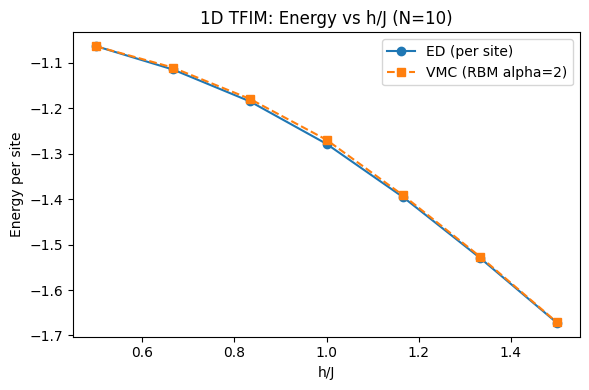

In [3]:
J = 1.0
N = 10
h_values = np.linspace(0.5, 1.5, 7)

chain = nk.graph.Chain(length=N, pbc=True)
ed_energies = []
vmc_energies = []

for h in h_values:
    hilbert, H = make_tfim(chain, J=J, h=h)
    E_ed = nk.exact.lanczos_ed(H, k=1, compute_eigenvectors=False)[0]
    E_vmc, _ = run_vmc(H, hilbert, alpha=2, n_iter=150, n_samples=1024, lr=0.05)
    ed_energies.append(E_ed / N)
    vmc_energies.append(E_vmc / N)

plt.figure(figsize=(6, 4))
plt.plot(h_values / J, ed_energies, 'o-', label='ED (per site)')
plt.plot(h_values / J, vmc_energies, 's--', label='VMC (RBM alpha=2)')
plt.xlabel('h/J')
plt.ylabel('Energy per site')
plt.title('1D TFIM: Energy vs h/J (N=10)')
plt.legend()
plt.tight_layout()
plt.show()


## 2) Energy variance vs $N$ (VMC only)

We keep $h/J=1$ fixed and measure the energy variance per site as a rough indicator of ansatz quality.


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:02<?, ?it/s, Energy=-7.956 ± 0.097 [σ²=8.2e+00, R̂=1.025]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-8.063 ± 0.080 [σ²=8.2e+00, R̂=1.010]]

  1%|          | 1/150 [00:00<00:10, 14.54it/s, Energy=-8.08 ± 0.12 [σ²=7.7e+00, R̂=1.032]]

  1%|▏         | 2/150 [00:00<00:06, 23.34it/s, Energy=-8.003 ± 0.081 [σ²=8.1e+00, R̂=1.010]]

  2%|▏         | 3/150 [00:00<00:05, 29.38it/s, Energy=-8.125 ± 0.076 [σ²=7.2e+00, R̂=1.010]]

  3%|▎         | 4/150 [00:00<00:03, 39.06it/s, Energy=-8.125 ± 0.076 [σ²=7.2e+00, R̂=1.010]]

  3%|▎         | 4/150 [00:00<00:03, 39.06it/s, Energy=-7.775 ± 0.087 [σ²=7.9e+00, R̂=1.017]]

  3%|▎         | 5/150 [00:00<00:03, 39.06it/s, Energy=-8.104 ± 0.073 [σ²=7.6e+00, R̂=1.008]]

  4%|▍         | 6/150 [00:00<00:03, 39.06it/s, Energy=-8.221 ± 0.077 [σ²=7.9e+00, R̂=1.014]]

  5%|▍         | 7/150 [00:00<00:03, 39.06it/s, Energy=-8.140 ± 0.076 [σ²=8.3e+00, R̂=1.008]]

  5%|▌         | 8/150 [00:00<00:03, 39.06it/s, Energy=-8.229 ± 0.086 [σ²=7.5e+00, R̂=1.014]]

  6%|▌         | 9/150 [00:00<00:03, 39.06it/s, Energy=-8.304 ± 0.073 [σ²=7.7e+00, R̂=1.015]]

  7%|▋         | 10/150 [00:00<00:02, 51.23it/s, Energy=-8.304 ± 0.073 [σ²=7.7e+00, R̂=1.015]]

  7%|▋         | 10/150 [00:00<00:02, 51.23it/s, Energy=-8.212 ± 0.092 [σ²=7.6e+00, R̂=1.016]]

  7%|▋         | 11/150 [00:00<00:02, 51.23it/s, Energy=-8.405 ± 0.085 [σ²=7.6e+00, R̂=1.022]]

  8%|▊         | 12/150 [00:00<00:02, 51.23it/s, Energy=-8.556 ± 0.090 [σ²=6.9e+00, R̂=1.025]]

  9%|▊         | 13/150 [00:00<00:02, 51.23it/s, Energy=-8.622 ± 0.086 [σ²=6.7e+00, R̂=1.014]]

  9%|▉         | 14/150 [00:00<00:02, 51.23it/s, Energy=-8.951 ± 0.083 [σ²=5.5e+00, R̂=1.022]]

 10%|█         | 15/150 [00:00<00:02, 51.23it/s, Energy=-9.679 ± 0.053 [σ²=3.4e+00, R̂=1.014]]

 11%|█         | 16/150 [00:00<00:02, 51.23it/s, Energy=-10.075 ± 0.035 [σ²=1.2e+00, R̂=1.017]]

 11%|█▏        | 17/150 [00:00<00:02, 55.77it/s, Energy=-10.075 ± 0.035 [σ²=1.2e+00, R̂=1.017]]

 11%|█▏        | 17/150 [00:00<00:02, 55.77it/s, Energy=-10.086 ± 0.030 [σ²=5.9e-01, R̂=1.035]]

 12%|█▏        | 18/150 [00:00<00:02, 55.77it/s, Energy=-10.088 ± 0.023 [σ²=7.6e-01, R̂=1.015]]

 13%|█▎        | 19/150 [00:00<00:02, 55.77it/s, Energy=-10.114 ± 0.025 [σ²=7.3e-01, R̂=1.014]]

 13%|█▎        | 20/150 [00:00<00:02, 55.77it/s, Energy=-10.124 ± 0.025 [σ²=7.0e-01, R̂=1.011]]

 14%|█▍        | 21/150 [00:00<00:02, 55.77it/s, Energy=-10.098 ± 0.023 [σ²=6.1e-01, R̂=1.018]]

 15%|█▍        | 22/150 [00:00<00:02, 55.77it/s, Energy=-10.115 ± 0.031 [σ²=9.6e-01, R̂=1.015]]

 15%|█▌        | 23/150 [00:00<00:02, 55.77it/s, Energy=-10.114 ± 0.025 [σ²=5.9e-01, R̂=1.017]]

 16%|█▌        | 24/150 [00:00<00:02, 57.77it/s, Energy=-10.114 ± 0.025 [σ²=5.9e-01, R̂=1.017]]

 16%|█▌        | 24/150 [00:00<00:02, 57.77it/s, Energy=-10.103 ± 0.029 [σ²=7.6e-01, R̂=1.019]]

 17%|█▋        | 25/150 [00:00<00:02, 57.77it/s, Energy=-10.124 ± 0.026 [σ²=7.9e-01, R̂=1.021]]

 17%|█▋        | 26/150 [00:00<00:02, 57.77it/s, Energy=-10.121 ± 0.022 [σ²=6.9e-01, R̂=1.009]]

 18%|█▊        | 27/150 [00:00<00:02, 57.77it/s, Energy=-10.132 ± 0.032 [σ²=8.0e-01, R̂=1.023]]

 19%|█▊        | 28/150 [00:00<00:02, 57.77it/s, Energy=-10.108 ± 0.026 [σ²=6.9e-01, R̂=1.023]]

 19%|█▉        | 29/150 [00:00<00:02, 57.77it/s, Energy=-10.098 ± 0.020 [σ²=7.1e-01, R̂=1.013]]

 20%|██        | 30/150 [00:00<00:02, 57.63it/s, Energy=-10.098 ± 0.020 [σ²=7.1e-01, R̂=1.013]]

 20%|██        | 30/150 [00:00<00:02, 57.63it/s, Energy=-10.063 ± 0.025 [σ²=6.9e-01, R̂=1.020]]

 21%|██        | 31/150 [00:00<00:02, 57.63it/s, Energy=-10.081 ± 0.031 [σ²=6.2e-01, R̂=1.023]]

 21%|██▏       | 32/150 [00:00<00:02, 57.63it/s, Energy=-10.074 ± 0.029 [σ²=5.2e-01, R̂=1.026]]

 22%|██▏       | 33/150 [00:00<00:02, 57.63it/s, Energy=-10.132 ± 0.018 [σ²=5.3e-01, R̂=1.015]]

 23%|██▎       | 34/150 [00:00<00:02, 57.63it/s, Energy=-10.196 ± 0.019 [σ²=5.6e-01, R̂=1.008]]

 23%|██▎       | 35/150 [00:00<00:01, 57.63it/s, Energy=-10.163 ± 0.023 [σ²=6.8e-01, R̂=1.021]]

 24%|██▍       | 36/150 [00:00<00:01, 58.28it/s, Energy=-10.163 ± 0.023 [σ²=6.8e-01, R̂=1.021]]

 24%|██▍       | 36/150 [00:00<00:01, 58.28it/s, Energy=-10.109 ± 0.029 [σ²=7.6e-01, R̂=1.012]]

 25%|██▍       | 37/150 [00:00<00:01, 58.28it/s, Energy=-10.150 ± 0.021 [σ²=5.6e-01, R̂=1.014]]

 25%|██▌       | 38/150 [00:00<00:01, 58.28it/s, Energy=-10.131 ± 0.018 [σ²=5.2e-01, R̂=1.006]]

 26%|██▌       | 39/150 [00:00<00:01, 58.28it/s, Energy=-10.121 ± 0.022 [σ²=6.9e-01, R̂=1.009]]

 27%|██▋       | 40/150 [00:00<00:01, 58.28it/s, Energy=-10.171 ± 0.030 [σ²=5.7e-01, R̂=1.023]]

 27%|██▋       | 41/150 [00:00<00:01, 58.28it/s, Energy=-10.162 ± 0.024 [σ²=6.3e-01, R̂=1.018]]

 28%|██▊       | 42/150 [00:00<00:01, 58.28it/s, Energy=-10.133 ± 0.019 [σ²=5.2e-01, R̂=1.017]]

 29%|██▊       | 43/150 [00:00<00:01, 59.03it/s, Energy=-10.133 ± 0.019 [σ²=5.2e-01, R̂=1.017]]

 29%|██▊       | 43/150 [00:00<00:01, 59.03it/s, Energy=-10.135 ± 0.022 [σ²=4.6e-01, R̂=1.015]]

 29%|██▉       | 44/150 [00:00<00:01, 59.03it/s, Energy=-10.109 ± 0.022 [σ²=5.3e-01, R̂=1.017]]

 30%|███       | 45/150 [00:00<00:01, 59.03it/s, Energy=-10.145 ± 0.018 [σ²=5.3e-01, R̂=1.004]]

 31%|███       | 46/150 [00:00<00:01, 59.03it/s, Energy=-10.102 ± 0.022 [σ²=5.4e-01, R̂=1.013]]

 31%|███▏      | 47/150 [00:00<00:01, 59.03it/s, Energy=-10.189 ± 0.030 [σ²=4.5e-01, R̂=1.033]]

 32%|███▏      | 48/150 [00:00<00:01, 59.03it/s, Energy=-10.158 ± 0.022 [σ²=5.3e-01, R̂=1.020]]

 33%|███▎      | 49/150 [00:00<00:01, 59.24it/s, Energy=-10.158 ± 0.022 [σ²=5.3e-01, R̂=1.020]]

 33%|███▎      | 49/150 [00:00<00:01, 59.24it/s, Energy=-10.112 ± 0.024 [σ²=5.8e-01, R̂=1.018]]

 33%|███▎      | 50/150 [00:00<00:01, 59.24it/s, Energy=-10.135 ± 0.015 [σ²=4.9e-01, R̂=1.007]]

 34%|███▍      | 51/150 [00:00<00:01, 59.24it/s, Energy=-10.170 ± 0.017 [σ²=4.1e-01, R̂=1.010]]

 35%|███▍      | 52/150 [00:00<00:01, 59.24it/s, Energy=-10.195 ± 0.021 [σ²=4.0e-01, R̂=1.020]]

 35%|███▌      | 53/150 [00:00<00:01, 59.24it/s, Energy=-10.168 ± 0.020 [σ²=5.0e-01, R̂=1.014]]

 36%|███▌      | 54/150 [00:00<00:01, 59.24it/s, Energy=-10.171 ± 0.017 [σ²=3.9e-01, R̂=1.013]]

 37%|███▋      | 55/150 [00:00<00:01, 59.24it/s, Energy=-10.173 ± 0.018 [σ²=4.0e-01, R̂=1.008]]

 37%|███▋      | 56/150 [00:00<00:01, 59.40it/s, Energy=-10.173 ± 0.018 [σ²=4.0e-01, R̂=1.008]]

 37%|███▋      | 56/150 [00:00<00:01, 59.40it/s, Energy=-10.176 ± 0.019 [σ²=4.5e-01, R̂=1.017]]

 38%|███▊      | 57/150 [00:01<00:01, 59.40it/s, Energy=-10.170 ± 0.022 [σ²=4.3e-01, R̂=1.016]]

 39%|███▊      | 58/150 [00:01<00:01, 59.40it/s, Energy=-10.140 ± 0.017 [σ²=4.0e-01, R̂=1.014]]

 39%|███▉      | 59/150 [00:01<00:01, 59.40it/s, Energy=-10.198 ± 0.021 [σ²=3.3e-01, R̂=1.020]]

 40%|████      | 60/150 [00:01<00:01, 59.40it/s, Energy=-10.204 ± 0.020 [σ²=4.2e-01, R̂=1.015]]

 41%|████      | 61/150 [00:01<00:01, 59.40it/s, Energy=-10.196 ± 0.024 [σ²=4.6e-01, R̂=1.024]]

 41%|████▏     | 62/150 [00:01<00:01, 59.40it/s, Energy=-10.224 ± 0.014 [σ²=3.6e-01, R̂=1.007]]

 42%|████▏     | 63/150 [00:01<00:01, 59.61it/s, Energy=-10.224 ± 0.014 [σ²=3.6e-01, R̂=1.007]]

 42%|████▏     | 63/150 [00:01<00:01, 59.61it/s, Energy=-10.199 ± 0.017 [σ²=4.2e-01, R̂=1.009]]

 43%|████▎     | 64/150 [00:01<00:01, 59.61it/s, Energy=-10.216 ± 0.019 [σ²=3.2e-01, R̂=1.022]]

 43%|████▎     | 65/150 [00:01<00:01, 59.61it/s, Energy=-10.175 ± 0.020 [σ²=3.4e-01, R̂=1.018]]

 44%|████▍     | 66/150 [00:01<00:01, 59.61it/s, Energy=-10.219 ± 0.022 [σ²=4.0e-01, R̂=1.018]]

 45%|████▍     | 67/150 [00:01<00:01, 59.61it/s, Energy=-10.192 ± 0.018 [σ²=4.0e-01, R̂=1.013]]

 45%|████▌     | 68/150 [00:01<00:01, 59.61it/s, Energy=-10.223 ± 0.021 [σ²=2.9e-01, R̂=1.022]]

 46%|████▌     | 69/150 [00:01<00:01, 59.61it/s, Energy=-10.182 ± 0.022 [σ²=5.2e-01, R̂=1.013]]

 47%|████▋     | 70/150 [00:01<00:01, 59.87it/s, Energy=-10.182 ± 0.022 [σ²=5.2e-01, R̂=1.013]]

 47%|████▋     | 70/150 [00:01<00:01, 59.87it/s, Energy=-10.235 ± 0.016 [σ²=2.7e-01, R̂=1.015]]

 47%|████▋     | 71/150 [00:01<00:01, 59.87it/s, Energy=-10.177 ± 0.022 [σ²=3.9e-01, R̂=1.019]]

 48%|████▊     | 72/150 [00:01<00:01, 59.87it/s, Energy=-10.176 ± 0.018 [σ²=3.1e-01, R̂=1.017]]

 49%|████▊     | 73/150 [00:01<00:01, 59.87it/s, Energy=-10.172 ± 0.018 [σ²=3.5e-01, R̂=1.017]]

 49%|████▉     | 74/150 [00:01<00:01, 59.87it/s, Energy=-10.206 ± 0.020 [σ²=3.6e-01, R̂=1.016]]

 50%|█████     | 75/150 [00:01<00:01, 59.87it/s, Energy=-10.194 ± 0.016 [σ²=2.9e-01, R̂=1.012]]

 51%|█████     | 76/150 [00:01<00:01, 59.89it/s, Energy=-10.194 ± 0.016 [σ²=2.9e-01, R̂=1.012]]

 51%|█████     | 76/150 [00:01<00:01, 59.89it/s, Energy=-10.218 ± 0.018 [σ²=3.2e-01, R̂=1.015]]

 51%|█████▏    | 77/150 [00:01<00:01, 59.89it/s, Energy=-10.164 ± 0.022 [σ²=3.4e-01, R̂=1.028]]

 52%|█████▏    | 78/150 [00:01<00:01, 59.89it/s, Energy=-10.217 ± 0.015 [σ²=2.8e-01, R̂=1.016]]

 53%|█████▎    | 79/150 [00:01<00:01, 59.89it/s, Energy=-10.192 ± 0.015 [σ²=3.3e-01, R̂=1.011]]

 53%|█████▎    | 80/150 [00:01<00:01, 59.89it/s, Energy=-10.174 ± 0.015 [σ²=3.2e-01, R̂=1.009]]

 54%|█████▍    | 81/150 [00:01<00:01, 59.89it/s, Energy=-10.204 ± 0.017 [σ²=2.7e-01, R̂=1.015]]

 55%|█████▍    | 82/150 [00:01<00:01, 59.89it/s, Energy=-10.223 ± 0.018 [σ²=3.1e-01, R̂=1.023]]

 55%|█████▌    | 83/150 [00:01<00:01, 60.12it/s, Energy=-10.223 ± 0.018 [σ²=3.1e-01, R̂=1.023]]

 55%|█████▌    | 83/150 [00:01<00:01, 60.12it/s, Energy=-10.186 ± 0.018 [σ²=3.2e-01, R̂=1.013]]

 56%|█████▌    | 84/150 [00:01<00:01, 60.12it/s, Energy=-10.207 ± 0.016 [σ²=2.8e-01, R̂=1.021]]

 57%|█████▋    | 85/150 [00:01<00:01, 60.12it/s, Energy=-10.181 ± 0.018 [σ²=3.3e-01, R̂=1.020]]

 57%|█████▋    | 86/150 [00:01<00:01, 60.12it/s, Energy=-10.235 ± 0.014 [σ²=2.3e-01, R̂=1.020]]

 58%|█████▊    | 87/150 [00:01<00:01, 60.12it/s, Energy=-10.222 ± 0.016 [σ²=3.0e-01, R̂=1.010]]

 59%|█████▊    | 88/150 [00:01<00:01, 60.12it/s, Energy=-10.229 ± 0.014 [σ²=2.7e-01, R̂=1.016]]

 59%|█████▉    | 89/150 [00:01<00:01, 60.12it/s, Energy=-10.214 ± 0.014 [σ²=2.6e-01, R̂=1.008]]

 60%|██████    | 90/150 [00:01<00:00, 60.17it/s, Energy=-10.214 ± 0.014 [σ²=2.6e-01, R̂=1.008]]

 60%|██████    | 90/150 [00:01<00:00, 60.17it/s, Energy=-10.216 ± 0.020 [σ²=2.8e-01, R̂=1.025]]

 61%|██████    | 91/150 [00:01<00:00, 60.17it/s, Energy=-10.218 ± 0.016 [σ²=2.8e-01, R̂=1.021]]

 61%|██████▏   | 92/150 [00:01<00:00, 60.17it/s, Energy=-10.215 ± 0.019 [σ²=2.8e-01, R̂=1.017]]

 62%|██████▏   | 93/150 [00:01<00:00, 60.17it/s, Energy=-10.215 ± 0.016 [σ²=3.6e-01, R̂=1.011]]

 63%|██████▎   | 94/150 [00:01<00:00, 60.17it/s, Energy=-10.210 ± 0.019 [σ²=2.8e-01, R̂=1.020]]

 63%|██████▎   | 95/150 [00:01<00:00, 60.17it/s, Energy=-10.187 ± 0.019 [σ²=2.9e-01, R̂=1.016]]

 64%|██████▍   | 96/150 [00:01<00:00, 60.17it/s, Energy=-10.199 ± 0.015 [σ²=2.9e-01, R̂=1.010]]

 65%|██████▍   | 97/150 [00:01<00:00, 60.13it/s, Energy=-10.199 ± 0.015 [σ²=2.9e-01, R̂=1.010]]

 65%|██████▍   | 97/150 [00:01<00:00, 60.13it/s, Energy=-10.235 ± 0.017 [σ²=2.5e-01, R̂=1.022]]

 65%|██████▌   | 98/150 [00:01<00:00, 60.13it/s, Energy=-10.190 ± 0.016 [σ²=2.9e-01, R̂=1.016]]

 66%|██████▌   | 99/150 [00:01<00:00, 60.13it/s, Energy=-10.203 ± 0.013 [σ²=2.5e-01, R̂=1.013]]

 67%|██████▋   | 100/150 [00:01<00:00, 60.13it/s, Energy=-10.219 ± 0.012 [σ²=2.7e-01, R̂=1.017]]

 67%|██████▋   | 101/150 [00:01<00:00, 60.13it/s, Energy=-10.230 ± 0.015 [σ²=2.5e-01, R̂=1.011]]

 68%|██████▊   | 102/150 [00:01<00:00, 60.13it/s, Energy=-10.234 ± 0.019 [σ²=2.9e-01, R̂=1.017]]

 69%|██████▊   | 103/150 [00:01<00:00, 60.13it/s, Energy=-10.185 ± 0.020 [σ²=3.0e-01, R̂=1.018]]

 69%|██████▉   | 104/150 [00:01<00:00, 60.11it/s, Energy=-10.185 ± 0.020 [σ²=3.0e-01, R̂=1.018]]

 69%|██████▉   | 104/150 [00:01<00:00, 60.11it/s, Energy=-10.201 ± 0.013 [σ²=2.3e-01, R̂=1.012]]

 70%|███████   | 105/150 [00:01<00:00, 60.11it/s, Energy=-10.234 ± 0.017 [σ²=2.9e-01, R̂=1.014]]

 71%|███████   | 106/150 [00:01<00:00, 60.11it/s, Energy=-10.183 ± 0.020 [σ²=3.5e-01, R̂=1.016]]

 71%|███████▏  | 107/150 [00:01<00:00, 60.11it/s, Energy=-10.210 ± 0.018 [σ²=2.8e-01, R̂=1.017]]

 72%|███████▏  | 108/150 [00:01<00:00, 60.11it/s, Energy=-10.205 ± 0.012 [σ²=2.6e-01, R̂=1.010]]

 73%|███████▎  | 109/150 [00:01<00:00, 60.11it/s, Energy=-10.193 ± 0.019 [σ²=2.1e-01, R̂=1.035]]

 73%|███████▎  | 110/150 [00:01<00:00, 60.11it/s, Energy=-10.234 ± 0.014 [σ²=2.7e-01, R̂=1.015]]

 74%|███████▍  | 111/150 [00:01<00:00, 60.25it/s, Energy=-10.234 ± 0.014 [σ²=2.7e-01, R̂=1.015]]

 74%|███████▍  | 111/150 [00:01<00:00, 60.25it/s, Energy=-10.258 ± 0.012 [σ²=2.6e-01, R̂=1.007]]

 75%|███████▍  | 112/150 [00:01<00:00, 60.25it/s, Energy=-10.210 ± 0.019 [σ²=2.7e-01, R̂=1.019]]

 75%|███████▌  | 113/150 [00:01<00:00, 60.25it/s, Energy=-10.205 ± 0.014 [σ²=2.6e-01, R̂=1.014]]

 76%|███████▌  | 114/150 [00:01<00:00, 60.25it/s, Energy=-10.211 ± 0.016 [σ²=2.4e-01, R̂=1.022]]

 77%|███████▋  | 115/150 [00:01<00:00, 60.25it/s, Energy=-10.222 ± 0.016 [σ²=2.5e-01, R̂=1.018]]

 77%|███████▋  | 116/150 [00:01<00:00, 60.25it/s, Energy=-10.248 ± 0.017 [σ²=2.3e-01, R̂=1.017]]

 78%|███████▊  | 117/150 [00:01<00:00, 60.25it/s, Energy=-10.198 ± 0.018 [σ²=3.2e-01, R̂=1.015]]

 79%|███████▊  | 118/150 [00:02<00:00, 60.42it/s, Energy=-10.198 ± 0.018 [σ²=3.2e-01, R̂=1.015]]

 79%|███████▊  | 118/150 [00:02<00:00, 60.42it/s, Energy=-10.246 ± 0.014 [σ²=2.2e-01, R̂=1.019]]

 79%|███████▉  | 119/150 [00:02<00:00, 60.42it/s, Energy=-10.238 ± 0.017 [σ²=2.6e-01, R̂=1.022]]

 80%|████████  | 120/150 [00:02<00:00, 60.42it/s, Energy=-10.204 ± 0.017 [σ²=2.8e-01, R̂=1.013]]

 81%|████████  | 121/150 [00:02<00:00, 60.42it/s, Energy=-10.193 ± 0.014 [σ²=2.7e-01, R̂=1.014]]

 81%|████████▏ | 122/150 [00:02<00:00, 60.42it/s, Energy=-10.215 ± 0.014 [σ²=2.2e-01, R̂=1.012]]

 82%|████████▏ | 123/150 [00:02<00:00, 60.42it/s, Energy=-10.219 ± 0.017 [σ²=2.7e-01, R̂=1.011]]

 83%|████████▎ | 124/150 [00:02<00:00, 60.42it/s, Energy=-10.219 ± 0.012 [σ²=2.2e-01, R̂=1.021]]

 83%|████████▎ | 125/150 [00:02<00:00, 60.47it/s, Energy=-10.219 ± 0.012 [σ²=2.2e-01, R̂=1.021]]

 83%|████████▎ | 125/150 [00:02<00:00, 60.47it/s, Energy=-10.225 ± 0.018 [σ²=2.7e-01, R̂=1.020]]

 84%|████████▍ | 126/150 [00:02<00:00, 60.47it/s, Energy=-10.233 ± 0.015 [σ²=2.3e-01, R̂=1.027]]

 85%|████████▍ | 127/150 [00:02<00:00, 60.47it/s, Energy=-10.213 ± 0.021 [σ²=2.8e-01, R̂=1.026]]

 85%|████████▌ | 128/150 [00:02<00:00, 60.47it/s, Energy=-10.215 ± 0.014 [σ²=2.8e-01, R̂=1.015]]

 86%|████████▌ | 129/150 [00:02<00:00, 60.47it/s, Energy=-10.229 ± 0.015 [σ²=2.2e-01, R̂=1.020]]

 87%|████████▋ | 130/150 [00:02<00:00, 60.47it/s, Energy=-10.209 ± 0.013 [σ²=2.5e-01, R̂=1.011]]

 87%|████████▋ | 131/150 [00:02<00:00, 60.47it/s, Energy=-10.231 ± 0.014 [σ²=2.5e-01, R̂=1.017]]

 88%|████████▊ | 132/150 [00:02<00:00, 60.52it/s, Energy=-10.231 ± 0.014 [σ²=2.5e-01, R̂=1.017]]

 88%|████████▊ | 132/150 [00:02<00:00, 60.52it/s, Energy=-10.245 ± 0.016 [σ²=2.5e-01, R̂=1.011]]

 89%|████████▊ | 133/150 [00:02<00:00, 60.52it/s, Energy=-10.208 ± 0.017 [σ²=2.2e-01, R̂=1.022]]

 89%|████████▉ | 134/150 [00:02<00:00, 60.52it/s, Energy=-10.198 ± 0.013 [σ²=2.0e-01, R̂=1.014]]

 90%|█████████ | 135/150 [00:02<00:00, 60.52it/s, Energy=-10.205 ± 0.015 [σ²=2.4e-01, R̂=1.018]]

 91%|█████████ | 136/150 [00:02<00:00, 60.52it/s, Energy=-10.208 ± 0.015 [σ²=2.5e-01, R̂=1.013]]

 91%|█████████▏| 137/150 [00:02<00:00, 60.52it/s, Energy=-10.204 ± 0.014 [σ²=2.4e-01, R̂=1.008]]

 92%|█████████▏| 138/150 [00:02<00:00, 60.52it/s, Energy=-10.198 ± 0.014 [σ²=2.6e-01, R̂=1.016]]

 93%|█████████▎| 139/150 [00:02<00:00, 60.66it/s, Energy=-10.198 ± 0.014 [σ²=2.6e-01, R̂=1.016]]

 93%|█████████▎| 139/150 [00:02<00:00, 60.66it/s, Energy=-10.223 ± 0.016 [σ²=2.4e-01, R̂=1.013]]

 93%|█████████▎| 140/150 [00:02<00:00, 60.66it/s, Energy=-10.245 ± 0.016 [σ²=2.4e-01, R̂=1.021]]

 94%|█████████▍| 141/150 [00:02<00:00, 60.66it/s, Energy=-10.221 ± 0.019 [σ²=2.8e-01, R̂=1.016]]

 95%|█████████▍| 142/150 [00:02<00:00, 60.66it/s, Energy=-10.226 ± 0.013 [σ²=2.3e-01, R̂=1.020]]

 95%|█████████▌| 143/150 [00:02<00:00, 60.66it/s, Energy=-10.243 ± 0.016 [σ²=2.2e-01, R̂=1.017]]

 96%|█████████▌| 144/150 [00:02<00:00, 60.66it/s, Energy=-10.207 ± 0.017 [σ²=2.9e-01, R̂=1.010]]

 97%|█████████▋| 145/150 [00:02<00:00, 60.66it/s, Energy=-10.2227 ± 0.0097 [σ²=1.9e-01, R̂=1.020]]

 97%|█████████▋| 146/150 [00:02<00:00, 60.60it/s, Energy=-10.2227 ± 0.0097 [σ²=1.9e-01, R̂=1.020]]

 97%|█████████▋| 146/150 [00:02<00:00, 60.60it/s, Energy=-10.192 ± 0.013 [σ²=2.4e-01, R̂=1.011]]  

 98%|█████████▊| 147/150 [00:02<00:00, 60.60it/s, Energy=-10.222 ± 0.012 [σ²=2.1e-01, R̂=1.008]]

 99%|█████████▊| 148/150 [00:02<00:00, 60.60it/s, Energy=-10.212 ± 0.013 [σ²=2.2e-01, R̂=1.015]]

100%|██████████| 150/150 [00:02<00:00, 59.72it/s, Energy=-10.212 ± 0.013 [σ²=2.2e-01, R̂=1.015]]


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-10.08 ± 0.12 [σ²=1.0e+01, R̂=1.023]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-9.97 ± 0.11 [σ²=9.6e+00, R̂=1.019]] 

  1%|          | 1/150 [00:00<00:12, 12.05it/s, Energy=-9.91 ± 0.10 [σ²=1.0e+01, R̂=1.014]]

  1%|▏         | 2/150 [00:00<00:07, 18.72it/s, Energy=-10.18 ± 0.11 [σ²=8.8e+00, R̂=1.033]]

  2%|▏         | 3/150 [00:00<00:05, 27.99it/s, Energy=-10.18 ± 0.11 [σ²=8.8e+00, R̂=1.033]]

  2%|▏         | 3/150 [00:00<00:05, 27.99it/s, Energy=-9.95 ± 0.11 [σ²=1.0e+01, R̂=1.017]] 

  3%|▎         | 4/150 [00:00<00:05, 27.99it/s, Energy=-9.927 ± 0.097 [σ²=1.0e+01, R̂=1.018]]

  3%|▎         | 5/150 [00:00<00:05, 27.99it/s, Energy=-10.060 ± 0.093 [σ²=1.0e+01, R̂=1.009]]

  4%|▍         | 6/150 [00:00<00:05, 27.99it/s, Energy=-10.17 ± 0.13 [σ²=9.3e+00, R̂=1.027]]  

  5%|▍         | 7/150 [00:00<00:05, 27.99it/s, Energy=-9.915 ± 0.094 [σ²=9.5e+00, R̂=1.009]]

  5%|▌         | 8/150 [00:00<00:03, 37.14it/s, Energy=-9.915 ± 0.094 [σ²=9.5e+00, R̂=1.009]]

  5%|▌         | 8/150 [00:00<00:03, 37.14it/s, Energy=-10.155 ± 0.096 [σ²=9.2e+00, R̂=1.013]]

  6%|▌         | 9/150 [00:00<00:03, 37.14it/s, Energy=-10.22 ± 0.11 [σ²=8.8e+00, R̂=1.021]]  

  7%|▋         | 10/150 [00:00<00:03, 37.14it/s, Energy=-10.56 ± 0.11 [σ²=8.5e+00, R̂=1.022]]

  7%|▋         | 11/150 [00:00<00:03, 37.14it/s, Energy=-10.740 ± 0.092 [σ²=7.5e+00, R̂=1.016]]

  8%|▊         | 12/150 [00:00<00:03, 37.14it/s, Energy=-11.15 ± 0.10 [σ²=6.6e+00, R̂=1.024]]  

  9%|▊         | 13/150 [00:00<00:03, 39.87it/s, Energy=-11.15 ± 0.10 [σ²=6.6e+00, R̂=1.024]]

  9%|▊         | 13/150 [00:00<00:03, 39.87it/s, Energy=-11.797 ± 0.081 [σ²=4.3e+00, R̂=1.035]]

  9%|▉         | 14/150 [00:00<00:03, 39.87it/s, Energy=-12.464 ± 0.041 [σ²=1.1e+00, R̂=1.027]]

 10%|█         | 15/150 [00:00<00:03, 39.87it/s, Energy=-12.448 ± 0.031 [σ²=6.4e-01, R̂=1.029]]

 11%|█         | 16/150 [00:00<00:03, 39.87it/s, Energy=-12.539 ± 0.026 [σ²=6.3e-01, R̂=1.021]]

 11%|█▏        | 17/150 [00:00<00:03, 39.87it/s, Energy=-12.499 ± 0.029 [σ²=8.7e-01, R̂=1.024]]

 12%|█▏        | 18/150 [00:00<00:03, 41.24it/s, Energy=-12.499 ± 0.029 [σ²=8.7e-01, R̂=1.024]]

 12%|█▏        | 18/150 [00:00<00:03, 41.24it/s, Energy=-12.551 ± 0.024 [σ²=5.6e-01, R̂=1.012]]

 13%|█▎        | 19/150 [00:00<00:03, 41.24it/s, Energy=-12.503 ± 0.029 [σ²=7.9e-01, R̂=1.021]]

 13%|█▎        | 20/150 [00:00<00:03, 41.24it/s, Energy=-12.525 ± 0.017 [σ²=4.5e-01, R̂=1.009]]

 14%|█▍        | 21/150 [00:00<00:03, 41.24it/s, Energy=-12.545 ± 0.023 [σ²=5.9e-01, R̂=1.020]]

 15%|█▍        | 22/150 [00:00<00:03, 41.24it/s, Energy=-12.604 ± 0.033 [σ²=8.8e-01, R̂=1.029]]

 15%|█▌        | 23/150 [00:00<00:03, 42.07it/s, Energy=-12.604 ± 0.033 [σ²=8.8e-01, R̂=1.029]]

 15%|█▌        | 23/150 [00:00<00:03, 42.07it/s, Energy=-12.565 ± 0.030 [σ²=7.6e-01, R̂=1.024]]

 16%|█▌        | 24/150 [00:00<00:02, 42.07it/s, Energy=-12.563 ± 0.032 [σ²=7.8e-01, R̂=1.018]]

 17%|█▋        | 25/150 [00:00<00:02, 42.07it/s, Energy=-12.551 ± 0.027 [σ²=7.2e-01, R̂=1.020]]

 17%|█▋        | 26/150 [00:00<00:02, 42.07it/s, Energy=-12.535 ± 0.033 [σ²=8.0e-01, R̂=1.026]]

 18%|█▊        | 27/150 [00:00<00:02, 42.07it/s, Energy=-12.569 ± 0.033 [σ²=8.0e-01, R̂=1.025]]

 19%|█▊        | 28/150 [00:00<00:02, 42.53it/s, Energy=-12.569 ± 0.033 [σ²=8.0e-01, R̂=1.025]]

 19%|█▊        | 28/150 [00:00<00:02, 42.53it/s, Energy=-12.560 ± 0.028 [σ²=7.1e-01, R̂=1.021]]

 19%|█▉        | 29/150 [00:00<00:02, 42.53it/s, Energy=-12.552 ± 0.035 [σ²=7.9e-01, R̂=1.029]]

 20%|██        | 30/150 [00:00<00:02, 42.53it/s, Energy=-12.553 ± 0.025 [σ²=6.9e-01, R̂=1.018]]

 21%|██        | 31/150 [00:00<00:02, 42.53it/s, Energy=-12.565 ± 0.030 [σ²=6.7e-01, R̂=1.023]]

 21%|██▏       | 32/150 [00:00<00:02, 42.53it/s, Energy=-12.574 ± 0.015 [σ²=5.1e-01, R̂=1.003]]

 22%|██▏       | 33/150 [00:00<00:02, 42.84it/s, Energy=-12.574 ± 0.015 [σ²=5.1e-01, R̂=1.003]]

 22%|██▏       | 33/150 [00:00<00:02, 42.84it/s, Energy=-12.539 ± 0.025 [σ²=4.5e-01, R̂=1.023]]

 23%|██▎       | 34/150 [00:00<00:02, 42.84it/s, Energy=-12.511 ± 0.025 [σ²=6.4e-01, R̂=1.021]]

 23%|██▎       | 35/150 [00:00<00:02, 42.84it/s, Energy=-12.590 ± 0.027 [σ²=6.1e-01, R̂=1.023]]

 24%|██▍       | 36/150 [00:00<00:02, 42.84it/s, Energy=-12.525 ± 0.025 [σ²=8.9e-01, R̂=1.017]]

 25%|██▍       | 37/150 [00:00<00:02, 42.84it/s, Energy=-12.585 ± 0.022 [σ²=6.9e-01, R̂=1.009]]

 25%|██▌       | 38/150 [00:00<00:02, 43.08it/s, Energy=-12.585 ± 0.022 [σ²=6.9e-01, R̂=1.009]]

 25%|██▌       | 38/150 [00:00<00:02, 43.08it/s, Energy=-12.546 ± 0.032 [σ²=6.3e-01, R̂=1.024]]

 26%|██▌       | 39/150 [00:00<00:02, 43.08it/s, Energy=-12.566 ± 0.024 [σ²=6.9e-01, R̂=1.011]]

 27%|██▋       | 40/150 [00:00<00:02, 43.08it/s, Energy=-12.547 ± 0.020 [σ²=6.3e-01, R̂=1.018]]

 27%|██▋       | 41/150 [00:01<00:02, 43.08it/s, Energy=-12.556 ± 0.026 [σ²=5.9e-01, R̂=1.017]]

 28%|██▊       | 42/150 [00:01<00:02, 43.08it/s, Energy=-12.559 ± 0.016 [σ²=4.9e-01, R̂=1.005]]

 29%|██▊       | 43/150 [00:01<00:02, 43.14it/s, Energy=-12.559 ± 0.016 [σ²=4.9e-01, R̂=1.005]]

 29%|██▊       | 43/150 [00:01<00:02, 43.14it/s, Energy=-12.624 ± 0.026 [σ²=4.8e-01, R̂=1.024]]

 29%|██▉       | 44/150 [00:01<00:02, 43.14it/s, Energy=-12.516 ± 0.032 [σ²=8.8e-01, R̂=1.019]]

 30%|███       | 45/150 [00:01<00:02, 43.14it/s, Energy=-12.562 ± 0.023 [σ²=5.0e-01, R̂=1.022]]

 31%|███       | 46/150 [00:01<00:02, 43.14it/s, Energy=-12.566 ± 0.023 [σ²=6.4e-01, R̂=1.008]]

 31%|███▏      | 47/150 [00:01<00:02, 43.14it/s, Energy=-12.540 ± 0.017 [σ²=5.3e-01, R̂=1.009]]

 32%|███▏      | 48/150 [00:01<00:02, 43.16it/s, Energy=-12.540 ± 0.017 [σ²=5.3e-01, R̂=1.009]]

 32%|███▏      | 48/150 [00:01<00:02, 43.16it/s, Energy=-12.595 ± 0.024 [σ²=5.6e-01, R̂=1.012]]

 33%|███▎      | 49/150 [00:01<00:02, 43.16it/s, Energy=-12.543 ± 0.024 [σ²=6.2e-01, R̂=1.010]]

 33%|███▎      | 50/150 [00:01<00:02, 43.16it/s, Energy=-12.574 ± 0.021 [σ²=5.1e-01, R̂=1.015]]

 34%|███▍      | 51/150 [00:01<00:02, 43.16it/s, Energy=-12.571 ± 0.022 [σ²=5.4e-01, R̂=1.015]]

 35%|███▍      | 52/150 [00:01<00:02, 43.16it/s, Energy=-12.560 ± 0.017 [σ²=4.8e-01, R̂=1.009]]

 35%|███▌      | 53/150 [00:01<00:02, 43.23it/s, Energy=-12.560 ± 0.017 [σ²=4.8e-01, R̂=1.009]]

 35%|███▌      | 53/150 [00:01<00:02, 43.23it/s, Energy=-12.572 ± 0.021 [σ²=4.4e-01, R̂=1.016]]

 36%|███▌      | 54/150 [00:01<00:02, 43.23it/s, Energy=-12.620 ± 0.027 [σ²=5.7e-01, R̂=1.020]]

 37%|███▋      | 55/150 [00:01<00:02, 43.23it/s, Energy=-12.598 ± 0.023 [σ²=5.9e-01, R̂=1.009]]

 37%|███▋      | 56/150 [00:01<00:02, 43.23it/s, Energy=-12.598 ± 0.028 [σ²=5.9e-01, R̂=1.023]]

 38%|███▊      | 57/150 [00:01<00:02, 43.23it/s, Energy=-12.582 ± 0.019 [σ²=4.9e-01, R̂=1.013]]

 39%|███▊      | 58/150 [00:01<00:02, 43.22it/s, Energy=-12.582 ± 0.019 [σ²=4.9e-01, R̂=1.013]]

 39%|███▊      | 58/150 [00:01<00:02, 43.22it/s, Energy=-12.568 ± 0.026 [σ²=4.3e-01, R̂=1.025]]

 39%|███▉      | 59/150 [00:01<00:02, 43.22it/s, Energy=-12.569 ± 0.027 [σ²=4.8e-01, R̂=1.021]]

 40%|████      | 60/150 [00:01<00:02, 43.22it/s, Energy=-12.610 ± 0.018 [σ²=4.4e-01, R̂=1.014]]

 41%|████      | 61/150 [00:01<00:02, 43.22it/s, Energy=-12.583 ± 0.031 [σ²=6.4e-01, R̂=1.025]]

 41%|████▏     | 62/150 [00:01<00:02, 43.22it/s, Energy=-12.585 ± 0.027 [σ²=5.7e-01, R̂=1.023]]

 42%|████▏     | 63/150 [00:01<00:02, 43.21it/s, Energy=-12.585 ± 0.027 [σ²=5.7e-01, R̂=1.023]]

 42%|████▏     | 63/150 [00:01<00:02, 43.21it/s, Energy=-12.618 ± 0.019 [σ²=5.2e-01, R̂=1.017]]

 43%|████▎     | 64/150 [00:01<00:01, 43.21it/s, Energy=-12.582 ± 0.030 [σ²=5.7e-01, R̂=1.032]]

 43%|████▎     | 65/150 [00:01<00:01, 43.21it/s, Energy=-12.605 ± 0.025 [σ²=4.7e-01, R̂=1.028]]

 44%|████▍     | 66/150 [00:01<00:01, 43.21it/s, Energy=-12.581 ± 0.027 [σ²=6.2e-01, R̂=1.026]]

 45%|████▍     | 67/150 [00:01<00:01, 43.21it/s, Energy=-12.584 ± 0.020 [σ²=3.8e-01, R̂=1.020]]

 45%|████▌     | 68/150 [00:01<00:01, 43.22it/s, Energy=-12.584 ± 0.020 [σ²=3.8e-01, R̂=1.020]]

 45%|████▌     | 68/150 [00:01<00:01, 43.22it/s, Energy=-12.612 ± 0.017 [σ²=3.9e-01, R̂=1.010]]

 46%|████▌     | 69/150 [00:01<00:01, 43.22it/s, Energy=-12.566 ± 0.019 [σ²=4.3e-01, R̂=1.018]]

 47%|████▋     | 70/150 [00:01<00:01, 43.22it/s, Energy=-12.631 ± 0.021 [σ²=4.9e-01, R̂=1.022]]

 47%|████▋     | 71/150 [00:01<00:01, 43.22it/s, Energy=-12.583 ± 0.021 [σ²=5.3e-01, R̂=1.010]]

 48%|████▊     | 72/150 [00:01<00:01, 43.22it/s, Energy=-12.590 ± 0.027 [σ²=4.8e-01, R̂=1.020]]

 49%|████▊     | 73/150 [00:01<00:01, 43.18it/s, Energy=-12.590 ± 0.027 [σ²=4.8e-01, R̂=1.020]]

 49%|████▊     | 73/150 [00:01<00:01, 43.18it/s, Energy=-12.620 ± 0.017 [σ²=5.1e-01, R̂=1.003]]

 49%|████▉     | 74/150 [00:01<00:01, 43.18it/s, Energy=-12.624 ± 0.022 [σ²=4.8e-01, R̂=1.027]]

 50%|█████     | 75/150 [00:01<00:01, 43.18it/s, Energy=-12.637 ± 0.022 [σ²=5.5e-01, R̂=1.009]]

 51%|█████     | 76/150 [00:01<00:01, 43.18it/s, Energy=-12.611 ± 0.025 [σ²=5.0e-01, R̂=1.017]]

 51%|█████▏    | 77/150 [00:01<00:01, 43.18it/s, Energy=-12.629 ± 0.017 [σ²=4.3e-01, R̂=1.015]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.19it/s, Energy=-12.629 ± 0.017 [σ²=4.3e-01, R̂=1.015]]

 52%|█████▏    | 78/150 [00:01<00:01, 43.19it/s, Energy=-12.579 ± 0.028 [σ²=6.1e-01, R̂=1.020]]

 53%|█████▎    | 79/150 [00:01<00:01, 43.19it/s, Energy=-12.600 ± 0.018 [σ²=3.2e-01, R̂=1.021]]

 53%|█████▎    | 80/150 [00:01<00:01, 43.19it/s, Energy=-12.624 ± 0.025 [σ²=5.2e-01, R̂=1.021]]

 54%|█████▍    | 81/150 [00:01<00:01, 43.19it/s, Energy=-12.626 ± 0.018 [σ²=4.2e-01, R̂=1.011]]

 55%|█████▍    | 82/150 [00:01<00:01, 43.19it/s, Energy=-12.610 ± 0.019 [σ²=4.3e-01, R̂=1.016]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.19it/s, Energy=-12.610 ± 0.019 [σ²=4.3e-01, R̂=1.016]]

 55%|█████▌    | 83/150 [00:01<00:01, 43.19it/s, Energy=-12.630 ± 0.022 [σ²=4.3e-01, R̂=1.024]]

 56%|█████▌    | 84/150 [00:02<00:01, 43.19it/s, Energy=-12.613 ± 0.022 [σ²=4.2e-01, R̂=1.019]]

 57%|█████▋    | 85/150 [00:02<00:01, 43.19it/s, Energy=-12.640 ± 0.019 [σ²=4.6e-01, R̂=1.019]]

 57%|█████▋    | 86/150 [00:02<00:01, 43.19it/s, Energy=-12.624 ± 0.022 [σ²=4.4e-01, R̂=1.026]]

 58%|█████▊    | 87/150 [00:02<00:01, 43.19it/s, Energy=-12.588 ± 0.023 [σ²=6.0e-01, R̂=1.016]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.20it/s, Energy=-12.588 ± 0.023 [σ²=6.0e-01, R̂=1.016]]

 59%|█████▊    | 88/150 [00:02<00:01, 43.20it/s, Energy=-12.619 ± 0.022 [σ²=4.7e-01, R̂=1.023]]

 59%|█████▉    | 89/150 [00:02<00:01, 43.20it/s, Energy=-12.626 ± 0.025 [σ²=5.0e-01, R̂=1.028]]

 60%|██████    | 90/150 [00:02<00:01, 43.20it/s, Energy=-12.635 ± 0.021 [σ²=5.7e-01, R̂=1.016]]

 61%|██████    | 91/150 [00:02<00:01, 43.20it/s, Energy=-12.652 ± 0.019 [σ²=4.0e-01, R̂=1.014]]

 61%|██████▏   | 92/150 [00:02<00:01, 43.20it/s, Energy=-12.647 ± 0.021 [σ²=3.9e-01, R̂=1.016]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.23it/s, Energy=-12.647 ± 0.021 [σ²=3.9e-01, R̂=1.016]]

 62%|██████▏   | 93/150 [00:02<00:01, 43.23it/s, Energy=-12.652 ± 0.017 [σ²=4.1e-01, R̂=1.013]]

 63%|██████▎   | 94/150 [00:02<00:01, 43.23it/s, Energy=-12.692 ± 0.020 [σ²=3.8e-01, R̂=1.011]]

 63%|██████▎   | 95/150 [00:02<00:01, 43.23it/s, Energy=-12.659 ± 0.017 [σ²=4.3e-01, R̂=1.014]]

 64%|██████▍   | 96/150 [00:02<00:01, 43.23it/s, Energy=-12.629 ± 0.020 [σ²=4.5e-01, R̂=1.010]]

 65%|██████▍   | 97/150 [00:02<00:01, 43.23it/s, Energy=-12.620 ± 0.019 [σ²=4.8e-01, R̂=1.011]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.16it/s, Energy=-12.620 ± 0.019 [σ²=4.8e-01, R̂=1.011]]

 65%|██████▌   | 98/150 [00:02<00:01, 43.16it/s, Energy=-12.624 ± 0.020 [σ²=3.9e-01, R̂=1.013]]

 66%|██████▌   | 99/150 [00:02<00:01, 43.16it/s, Energy=-12.677 ± 0.021 [σ²=4.0e-01, R̂=1.024]]

 67%|██████▋   | 100/150 [00:02<00:01, 43.16it/s, Energy=-12.629 ± 0.016 [σ²=4.5e-01, R̂=1.005]]

 67%|██████▋   | 101/150 [00:02<00:01, 43.16it/s, Energy=-12.680 ± 0.021 [σ²=3.9e-01, R̂=1.018]]

 68%|██████▊   | 102/150 [00:02<00:01, 43.16it/s, Energy=-12.643 ± 0.022 [σ²=4.4e-01, R̂=1.017]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.18it/s, Energy=-12.643 ± 0.022 [σ²=4.4e-01, R̂=1.017]]

 69%|██████▊   | 103/150 [00:02<00:01, 43.18it/s, Energy=-12.665 ± 0.018 [σ²=3.0e-01, R̂=1.019]]

 69%|██████▉   | 104/150 [00:02<00:01, 43.18it/s, Energy=-12.636 ± 0.025 [σ²=5.0e-01, R̂=1.014]]

 70%|███████   | 105/150 [00:02<00:01, 43.18it/s, Energy=-12.622 ± 0.020 [σ²=5.4e-01, R̂=1.008]]

 71%|███████   | 106/150 [00:02<00:01, 43.18it/s, Energy=-12.683 ± 0.021 [σ²=4.1e-01, R̂=1.021]]

 71%|███████▏  | 107/150 [00:02<00:00, 43.18it/s, Energy=-12.653 ± 0.019 [σ²=4.6e-01, R̂=1.009]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.24it/s, Energy=-12.653 ± 0.019 [σ²=4.6e-01, R̂=1.009]]

 72%|███████▏  | 108/150 [00:02<00:00, 43.24it/s, Energy=-12.644 ± 0.023 [σ²=4.2e-01, R̂=1.023]]

 73%|███████▎  | 109/150 [00:02<00:00, 43.24it/s, Energy=-12.628 ± 0.016 [σ²=3.5e-01, R̂=1.020]]

 73%|███████▎  | 110/150 [00:02<00:00, 43.24it/s, Energy=-12.642 ± 0.024 [σ²=3.8e-01, R̂=1.026]]

 74%|███████▍  | 111/150 [00:02<00:00, 43.24it/s, Energy=-12.610 ± 0.019 [σ²=4.0e-01, R̂=1.012]]

 75%|███████▍  | 112/150 [00:02<00:00, 43.24it/s, Energy=-12.644 ± 0.019 [σ²=3.3e-01, R̂=1.026]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.25it/s, Energy=-12.644 ± 0.019 [σ²=3.3e-01, R̂=1.026]]

 75%|███████▌  | 113/150 [00:02<00:00, 43.25it/s, Energy=-12.642 ± 0.024 [σ²=4.6e-01, R̂=1.016]]

 76%|███████▌  | 114/150 [00:02<00:00, 43.25it/s, Energy=-12.636 ± 0.023 [σ²=4.6e-01, R̂=1.030]]

 77%|███████▋  | 115/150 [00:02<00:00, 43.25it/s, Energy=-12.670 ± 0.021 [σ²=4.1e-01, R̂=1.017]]

 77%|███████▋  | 116/150 [00:02<00:00, 43.25it/s, Energy=-12.635 ± 0.021 [σ²=4.3e-01, R̂=1.020]]

 78%|███████▊  | 117/150 [00:02<00:00, 43.25it/s, Energy=-12.683 ± 0.018 [σ²=4.3e-01, R̂=1.022]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.26it/s, Energy=-12.683 ± 0.018 [σ²=4.3e-01, R̂=1.022]]

 79%|███████▊  | 118/150 [00:02<00:00, 43.26it/s, Energy=-12.661 ± 0.017 [σ²=4.7e-01, R̂=1.005]]

 79%|███████▉  | 119/150 [00:02<00:00, 43.26it/s, Energy=-12.676 ± 0.020 [σ²=3.9e-01, R̂=1.016]]

 80%|████████  | 120/150 [00:02<00:00, 43.26it/s, Energy=-12.670 ± 0.021 [σ²=4.4e-01, R̂=1.022]]

 81%|████████  | 121/150 [00:02<00:00, 43.26it/s, Energy=-12.653 ± 0.025 [σ²=5.3e-01, R̂=1.017]]

 81%|████████▏ | 122/150 [00:02<00:00, 43.26it/s, Energy=-12.666 ± 0.021 [σ²=3.7e-01, R̂=1.021]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.31it/s, Energy=-12.666 ± 0.021 [σ²=3.7e-01, R̂=1.021]]

 82%|████████▏ | 123/150 [00:02<00:00, 43.31it/s, Energy=-12.672 ± 0.021 [σ²=3.6e-01, R̂=1.012]]

 83%|████████▎ | 124/150 [00:02<00:00, 43.31it/s, Energy=-12.625 ± 0.024 [σ²=4.3e-01, R̂=1.022]]

 83%|████████▎ | 125/150 [00:02<00:00, 43.31it/s, Energy=-12.691 ± 0.019 [σ²=3.7e-01, R̂=1.012]]

 84%|████████▍ | 126/150 [00:02<00:00, 43.31it/s, Energy=-12.648 ± 0.022 [σ²=4.1e-01, R̂=1.019]]

 85%|████████▍ | 127/150 [00:02<00:00, 43.31it/s, Energy=-12.699 ± 0.017 [σ²=3.6e-01, R̂=1.008]]

 85%|████████▌ | 128/150 [00:02<00:00, 43.33it/s, Energy=-12.699 ± 0.017 [σ²=3.6e-01, R̂=1.008]]

 85%|████████▌ | 128/150 [00:03<00:00, 43.33it/s, Energy=-12.637 ± 0.021 [σ²=4.6e-01, R̂=1.020]]

 86%|████████▌ | 129/150 [00:03<00:00, 43.33it/s, Energy=-12.644 ± 0.021 [σ²=4.3e-01, R̂=1.015]]

 87%|████████▋ | 130/150 [00:03<00:00, 43.33it/s, Energy=-12.616 ± 0.023 [σ²=4.1e-01, R̂=1.025]]

 87%|████████▋ | 131/150 [00:03<00:00, 43.33it/s, Energy=-12.628 ± 0.016 [σ²=3.1e-01, R̂=1.006]]

 88%|████████▊ | 132/150 [00:03<00:00, 43.33it/s, Energy=-12.659 ± 0.016 [σ²=3.5e-01, R̂=1.013]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.26it/s, Energy=-12.659 ± 0.016 [σ²=3.5e-01, R̂=1.013]]

 89%|████████▊ | 133/150 [00:03<00:00, 43.26it/s, Energy=-12.680 ± 0.019 [σ²=4.3e-01, R̂=1.015]]

 89%|████████▉ | 134/150 [00:03<00:00, 43.26it/s, Energy=-12.674 ± 0.011 [σ²=4.4e-01, R̂=1.005]]

 90%|█████████ | 135/150 [00:03<00:00, 43.26it/s, Energy=-12.690 ± 0.020 [σ²=2.9e-01, R̂=1.022]]

 91%|█████████ | 136/150 [00:03<00:00, 43.26it/s, Energy=-12.671 ± 0.022 [σ²=3.2e-01, R̂=1.031]]

 91%|█████████▏| 137/150 [00:03<00:00, 43.26it/s, Energy=-12.641 ± 0.016 [σ²=3.9e-01, R̂=1.003]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.20it/s, Energy=-12.641 ± 0.016 [σ²=3.9e-01, R̂=1.003]]

 92%|█████████▏| 138/150 [00:03<00:00, 43.20it/s, Energy=-12.659 ± 0.017 [σ²=2.7e-01, R̂=1.017]]

 93%|█████████▎| 139/150 [00:03<00:00, 43.20it/s, Energy=-12.638 ± 0.017 [σ²=3.5e-01, R̂=1.011]]

 93%|█████████▎| 140/150 [00:03<00:00, 43.20it/s, Energy=-12.643 ± 0.014 [σ²=2.9e-01, R̂=1.005]]

 94%|█████████▍| 141/150 [00:03<00:00, 43.20it/s, Energy=-12.675 ± 0.012 [σ²=3.3e-01, R̂=1.006]]

 95%|█████████▍| 142/150 [00:03<00:00, 43.20it/s, Energy=-12.706 ± 0.019 [σ²=2.9e-01, R̂=1.028]]

 95%|█████████▌| 143/150 [00:03<00:00, 40.62it/s, Energy=-12.706 ± 0.019 [σ²=2.9e-01, R̂=1.028]]

 95%|█████████▌| 143/150 [00:03<00:00, 40.62it/s, Energy=-12.695 ± 0.019 [σ²=3.5e-01, R̂=1.022]]

 96%|█████████▌| 144/150 [00:03<00:00, 40.62it/s, Energy=-12.660 ± 0.017 [σ²=3.8e-01, R̂=1.009]]

 97%|█████████▋| 145/150 [00:03<00:00, 40.62it/s, Energy=-12.662 ± 0.017 [σ²=3.1e-01, R̂=1.015]]

 97%|█████████▋| 146/150 [00:03<00:00, 40.62it/s, Energy=-12.643 ± 0.019 [σ²=3.3e-01, R̂=1.011]]

 98%|█████████▊| 147/150 [00:03<00:00, 40.62it/s, Energy=-12.718 ± 0.020 [σ²=2.9e-01, R̂=1.022]]

 99%|█████████▊| 148/150 [00:03<00:00, 41.01it/s, Energy=-12.718 ± 0.020 [σ²=2.9e-01, R̂=1.022]]

 99%|█████████▊| 148/150 [00:03<00:00, 41.01it/s, Energy=-12.671 ± 0.016 [σ²=3.9e-01, R̂=1.009]]

100%|██████████| 150/150 [00:03<00:00, 42.71it/s, Energy=-12.671 ± 0.016 [σ²=3.9e-01, R̂=1.009]]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s]

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-11.889 ± 0.090 [σ²=1.3e+01, R̂=1.005]]

  0%|          | 0/150 [00:00<?, ?it/s, Energy=-12.06 ± 0.12 [σ²=1.3e+01, R̂=1.019]]  

  1%|          | 1/150 [00:00<00:14, 10.36it/s, Energy=-12.11 ± 0.12 [σ²=1.3e+01, R̂=1.016]]

  1%|▏         | 2/150 [00:00<00:09, 15.90it/s, Energy=-12.097 ± 0.094 [σ²=1.2e+01, R̂=1.008]]

  2%|▏         | 3/150 [00:00<00:06, 23.78it/s, Energy=-12.097 ± 0.094 [σ²=1.2e+01, R̂=1.008]]

  2%|▏         | 3/150 [00:00<00:06, 23.78it/s, Energy=-12.32 ± 0.11 [σ²=1.2e+01, R̂=1.016]]  

  3%|▎         | 4/150 [00:00<00:06, 23.78it/s, Energy=-12.07 ± 0.10 [σ²=1.2e+01, R̂=1.014]]

  3%|▎         | 5/150 [00:00<00:06, 23.78it/s, Energy=-11.94 ± 0.10 [σ²=1.1e+01, R̂=1.017]]

  4%|▍         | 6/150 [00:00<00:06, 23.78it/s, Energy=-11.92 ± 0.11 [σ²=1.1e+01, R̂=1.018]]

  5%|▍         | 7/150 [00:00<00:04, 30.05it/s, Energy=-11.92 ± 0.11 [σ²=1.1e+01, R̂=1.018]]

  5%|▍         | 7/150 [00:00<00:04, 30.05it/s, Energy=-12.11 ± 0.10 [σ²=1.2e+01, R̂=1.011]]

  5%|▌         | 8/150 [00:00<00:04, 30.05it/s, Energy=-12.65 ± 0.11 [σ²=1.0e+01, R̂=1.021]]

  6%|▌         | 9/150 [00:00<00:04, 30.05it/s, Energy=-12.61 ± 0.11 [σ²=1.0e+01, R̂=1.024]]

  7%|▋         | 10/150 [00:00<00:04, 30.05it/s, Energy=-13.378 ± 0.099 [σ²=8.8e+00, R̂=1.025]]

  7%|▋         | 11/150 [00:00<00:04, 32.33it/s, Energy=-13.378 ± 0.099 [σ²=8.8e+00, R̂=1.025]]

  7%|▋         | 11/150 [00:00<00:04, 32.33it/s, Energy=-14.38 ± 0.10 [σ²=5.1e+00, R̂=1.037]]  

  8%|▊         | 12/150 [00:00<00:04, 32.33it/s, Energy=-14.906 ± 0.033 [σ²=8.1e-01, R̂=1.025]]

  9%|▊         | 13/150 [00:00<00:04, 32.33it/s, Energy=-15.033 ± 0.040 [σ²=1.4e+00, R̂=1.011]]

  9%|▉         | 14/150 [00:00<00:04, 32.33it/s, Energy=-15.032 ± 0.027 [σ²=7.2e-01, R̂=1.011]]

 10%|█         | 15/150 [00:00<00:04, 33.38it/s, Energy=-15.032 ± 0.027 [σ²=7.2e-01, R̂=1.011]]

 10%|█         | 15/150 [00:00<00:04, 33.38it/s, Energy=-15.007 ± 0.031 [σ²=8.6e-01, R̂=1.020]]

 11%|█         | 16/150 [00:00<00:04, 33.38it/s, Energy=-14.980 ± 0.030 [σ²=6.2e-01, R̂=1.030]]

 11%|█▏        | 17/150 [00:00<00:03, 33.38it/s, Energy=-15.055 ± 0.028 [σ²=7.6e-01, R̂=1.028]]

 12%|█▏        | 18/150 [00:00<00:03, 33.38it/s, Energy=-15.027 ± 0.027 [σ²=6.6e-01, R̂=1.015]]

 13%|█▎        | 19/150 [00:00<00:03, 34.14it/s, Energy=-15.027 ± 0.027 [σ²=6.6e-01, R̂=1.015]]

 13%|█▎        | 19/150 [00:00<00:03, 34.14it/s, Energy=-15.012 ± 0.033 [σ²=1.1e+00, R̂=1.016]]

 13%|█▎        | 20/150 [00:00<00:03, 34.14it/s, Energy=-15.090 ± 0.033 [σ²=7.8e-01, R̂=1.019]]

 14%|█▍        | 21/150 [00:00<00:03, 34.14it/s, Energy=-15.090 ± 0.032 [σ²=9.6e-01, R̂=1.023]]

 15%|█▍        | 22/150 [00:00<00:03, 34.14it/s, Energy=-15.055 ± 0.026 [σ²=8.5e-01, R̂=1.008]]

 15%|█▌        | 23/150 [00:00<00:03, 34.55it/s, Energy=-15.055 ± 0.026 [σ²=8.5e-01, R̂=1.008]]

 15%|█▌        | 23/150 [00:00<00:03, 34.55it/s, Energy=-15.066 ± 0.037 [σ²=8.0e-01, R̂=1.032]]

 16%|█▌        | 24/150 [00:00<00:03, 34.55it/s, Energy=-15.023 ± 0.036 [σ²=1.1e+00, R̂=1.014]]

 17%|█▋        | 25/150 [00:00<00:03, 34.55it/s, Energy=-15.024 ± 0.027 [σ²=8.1e-01, R̂=1.014]]

 17%|█▋        | 26/150 [00:00<00:03, 34.55it/s, Energy=-14.989 ± 0.040 [σ²=9.1e-01, R̂=1.030]]

 18%|█▊        | 27/150 [00:00<00:03, 34.81it/s, Energy=-14.989 ± 0.040 [σ²=9.1e-01, R̂=1.030]]

 18%|█▊        | 27/150 [00:00<00:03, 34.81it/s, Energy=-15.034 ± 0.029 [σ²=8.2e-01, R̂=1.012]]

 19%|█▊        | 28/150 [00:00<00:03, 34.81it/s, Energy=-15.036 ± 0.038 [σ²=9.6e-01, R̂=1.028]]

 19%|█▉        | 29/150 [00:00<00:03, 34.81it/s, Energy=-15.032 ± 0.028 [σ²=7.6e-01, R̂=1.023]]

 20%|██        | 30/150 [00:00<00:03, 34.81it/s, Energy=-15.032 ± 0.033 [σ²=9.7e-01, R̂=1.015]]

 21%|██        | 31/150 [00:00<00:03, 34.95it/s, Energy=-15.032 ± 0.033 [σ²=9.7e-01, R̂=1.015]]

 21%|██        | 31/150 [00:00<00:03, 34.95it/s, Energy=-15.016 ± 0.030 [σ²=7.6e-01, R̂=1.021]]

 21%|██▏       | 32/150 [00:00<00:03, 34.95it/s, Energy=-15.067 ± 0.026 [σ²=6.8e-01, R̂=1.019]]

 22%|██▏       | 33/150 [00:01<00:03, 34.95it/s, Energy=-15.095 ± 0.033 [σ²=1.1e+00, R̂=1.017]]

 23%|██▎       | 34/150 [00:01<00:03, 34.95it/s, Energy=-15.069 ± 0.027 [σ²=7.9e-01, R̂=1.013]]

 23%|██▎       | 35/150 [00:01<00:03, 35.07it/s, Energy=-15.069 ± 0.027 [σ²=7.9e-01, R̂=1.013]]

 23%|██▎       | 35/150 [00:01<00:03, 35.07it/s, Energy=-15.129 ± 0.042 [σ²=1.0e+00, R̂=1.031]]

 24%|██▍       | 36/150 [00:01<00:03, 35.07it/s, Energy=-15.016 ± 0.035 [σ²=1.1e+00, R̂=1.021]]

 25%|██▍       | 37/150 [00:01<00:03, 35.07it/s, Energy=-15.059 ± 0.027 [σ²=5.9e-01, R̂=1.023]]

 25%|██▌       | 38/150 [00:01<00:03, 35.07it/s, Energy=-15.058 ± 0.029 [σ²=7.6e-01, R̂=1.027]]

 26%|██▌       | 39/150 [00:01<00:03, 35.19it/s, Energy=-15.058 ± 0.029 [σ²=7.6e-01, R̂=1.027]]

 26%|██▌       | 39/150 [00:01<00:03, 35.19it/s, Energy=-15.093 ± 0.030 [σ²=7.5e-01, R̂=1.022]]

 27%|██▋       | 40/150 [00:01<00:03, 35.19it/s, Energy=-15.064 ± 0.034 [σ²=1.0e+00, R̂=1.018]]

 27%|██▋       | 41/150 [00:01<00:03, 35.19it/s, Energy=-15.051 ± 0.029 [σ²=7.3e-01, R̂=1.023]]

 28%|██▊       | 42/150 [00:01<00:03, 35.19it/s, Energy=-15.091 ± 0.036 [σ²=8.5e-01, R̂=1.030]]

 29%|██▊       | 43/150 [00:01<00:03, 35.21it/s, Energy=-15.091 ± 0.036 [σ²=8.5e-01, R̂=1.030]]

 29%|██▊       | 43/150 [00:01<00:03, 35.21it/s, Energy=-15.043 ± 0.027 [σ²=8.1e-01, R̂=1.021]]

 29%|██▉       | 44/150 [00:01<00:03, 35.21it/s, Energy=-15.061 ± 0.028 [σ²=7.5e-01, R̂=1.014]]

 30%|███       | 45/150 [00:01<00:02, 35.21it/s, Energy=-15.066 ± 0.023 [σ²=6.2e-01, R̂=1.020]]

 31%|███       | 46/150 [00:01<00:02, 35.21it/s, Energy=-15.107 ± 0.031 [σ²=9.6e-01, R̂=1.019]]

 31%|███▏      | 47/150 [00:01<00:02, 35.27it/s, Energy=-15.107 ± 0.031 [σ²=9.6e-01, R̂=1.019]]

 31%|███▏      | 47/150 [00:01<00:02, 35.27it/s, Energy=-15.125 ± 0.023 [σ²=7.6e-01, R̂=1.013]]

 32%|███▏      | 48/150 [00:01<00:02, 35.27it/s, Energy=-15.068 ± 0.022 [σ²=8.4e-01, R̂=1.006]]

 33%|███▎      | 49/150 [00:01<00:02, 35.27it/s, Energy=-15.077 ± 0.028 [σ²=6.1e-01, R̂=1.023]]

 33%|███▎      | 50/150 [00:01<00:02, 35.27it/s, Energy=-15.055 ± 0.027 [σ²=7.3e-01, R̂=1.013]]

 34%|███▍      | 51/150 [00:01<00:02, 35.27it/s, Energy=-15.055 ± 0.027 [σ²=7.3e-01, R̂=1.013]]

 34%|███▍      | 51/150 [00:01<00:02, 35.27it/s, Energy=-15.025 ± 0.030 [σ²=9.2e-01, R̂=1.014]]

 35%|███▍      | 52/150 [00:01<00:02, 35.27it/s, Energy=-15.077 ± 0.034 [σ²=8.0e-01, R̂=1.031]]

 35%|███▌      | 53/150 [00:01<00:02, 35.27it/s, Energy=-15.078 ± 0.031 [σ²=7.7e-01, R̂=1.032]]

 36%|███▌      | 54/150 [00:01<00:02, 35.27it/s, Energy=-15.091 ± 0.025 [σ²=6.3e-01, R̂=1.018]]

 37%|███▋      | 55/150 [00:01<00:02, 35.28it/s, Energy=-15.091 ± 0.025 [σ²=6.3e-01, R̂=1.018]]

 37%|███▋      | 55/150 [00:01<00:02, 35.28it/s, Energy=-15.082 ± 0.023 [σ²=4.7e-01, R̂=1.019]]

 37%|███▋      | 56/150 [00:01<00:02, 35.28it/s, Energy=-15.102 ± 0.028 [σ²=7.0e-01, R̂=1.019]]

 38%|███▊      | 57/150 [00:01<00:02, 35.28it/s, Energy=-15.017 ± 0.028 [σ²=9.1e-01, R̂=1.008]]

 39%|███▊      | 58/150 [00:01<00:02, 35.28it/s, Energy=-15.041 ± 0.033 [σ²=7.8e-01, R̂=1.029]]

 39%|███▉      | 59/150 [00:01<00:02, 35.30it/s, Energy=-15.041 ± 0.033 [σ²=7.8e-01, R̂=1.029]]

 39%|███▉      | 59/150 [00:01<00:02, 35.30it/s, Energy=-15.051 ± 0.031 [σ²=9.5e-01, R̂=1.010]]

 40%|████      | 60/150 [00:01<00:02, 35.30it/s, Energy=-15.058 ± 0.032 [σ²=6.9e-01, R̂=1.027]]

 41%|████      | 61/150 [00:01<00:02, 35.30it/s, Energy=-15.140 ± 0.024 [σ²=6.9e-01, R̂=1.023]]

 41%|████▏     | 62/150 [00:01<00:02, 35.30it/s, Energy=-15.115 ± 0.034 [σ²=8.9e-01, R̂=1.020]]

 42%|████▏     | 63/150 [00:01<00:02, 35.26it/s, Energy=-15.115 ± 0.034 [σ²=8.9e-01, R̂=1.020]]

 42%|████▏     | 63/150 [00:01<00:02, 35.26it/s, Energy=-15.061 ± 0.028 [σ²=7.1e-01, R̂=1.014]]

 43%|████▎     | 64/150 [00:01<00:02, 35.26it/s, Energy=-15.075 ± 0.029 [σ²=6.1e-01, R̂=1.018]]

 43%|████▎     | 65/150 [00:01<00:02, 35.26it/s, Energy=-15.055 ± 0.038 [σ²=7.6e-01, R̂=1.034]]

 44%|████▍     | 66/150 [00:01<00:02, 35.26it/s, Energy=-15.114 ± 0.026 [σ²=6.0e-01, R̂=1.024]]

 45%|████▍     | 67/150 [00:01<00:02, 35.27it/s, Energy=-15.114 ± 0.026 [σ²=6.0e-01, R̂=1.024]]

 45%|████▍     | 67/150 [00:01<00:02, 35.27it/s, Energy=-15.042 ± 0.027 [σ²=8.1e-01, R̂=1.012]]

 45%|████▌     | 68/150 [00:01<00:02, 35.27it/s, Energy=-15.095 ± 0.021 [σ²=5.0e-01, R̂=1.014]]

 46%|████▌     | 69/150 [00:02<00:02, 35.27it/s, Energy=-15.101 ± 0.031 [σ²=6.7e-01, R̂=1.029]]

 47%|████▋     | 70/150 [00:02<00:02, 35.27it/s, Energy=-15.101 ± 0.021 [σ²=7.2e-01, R̂=1.006]]

 47%|████▋     | 71/150 [00:02<00:02, 35.33it/s, Energy=-15.101 ± 0.021 [σ²=7.2e-01, R̂=1.006]]

 47%|████▋     | 71/150 [00:02<00:02, 35.33it/s, Energy=-15.149 ± 0.036 [σ²=9.3e-01, R̂=1.025]]

 48%|████▊     | 72/150 [00:02<00:02, 35.33it/s, Energy=-15.077 ± 0.028 [σ²=7.2e-01, R̂=1.017]]

 49%|████▊     | 73/150 [00:02<00:02, 35.33it/s, Energy=-15.071 ± 0.025 [σ²=5.3e-01, R̂=1.017]]

 49%|████▉     | 74/150 [00:02<00:02, 35.33it/s, Energy=-15.099 ± 0.025 [σ²=6.6e-01, R̂=1.009]]

 50%|█████     | 75/150 [00:02<00:02, 35.25it/s, Energy=-15.099 ± 0.025 [σ²=6.6e-01, R̂=1.009]]

 50%|█████     | 75/150 [00:02<00:02, 35.25it/s, Energy=-15.080 ± 0.034 [σ²=6.7e-01, R̂=1.031]]

 51%|█████     | 76/150 [00:02<00:02, 35.25it/s, Energy=-15.111 ± 0.025 [σ²=5.0e-01, R̂=1.029]]

 51%|█████▏    | 77/150 [00:02<00:02, 35.25it/s, Energy=-15.060 ± 0.024 [σ²=7.5e-01, R̂=1.014]]

 52%|█████▏    | 78/150 [00:02<00:02, 35.25it/s, Energy=-15.119 ± 0.021 [σ²=6.1e-01, R̂=1.011]]

 53%|█████▎    | 79/150 [00:02<00:02, 35.26it/s, Energy=-15.119 ± 0.021 [σ²=6.1e-01, R̂=1.011]]

 53%|█████▎    | 79/150 [00:02<00:02, 35.26it/s, Energy=-15.159 ± 0.025 [σ²=7.1e-01, R̂=1.011]]

 53%|█████▎    | 80/150 [00:02<00:01, 35.26it/s, Energy=-15.120 ± 0.024 [σ²=6.2e-01, R̂=1.014]]

 54%|█████▍    | 81/150 [00:02<00:01, 35.26it/s, Energy=-15.109 ± 0.027 [σ²=6.9e-01, R̂=1.014]]

 55%|█████▍    | 82/150 [00:02<00:01, 35.26it/s, Energy=-15.101 ± 0.031 [σ²=6.9e-01, R̂=1.021]]

 55%|█████▌    | 83/150 [00:02<00:01, 35.28it/s, Energy=-15.101 ± 0.031 [σ²=6.9e-01, R̂=1.021]]

 55%|█████▌    | 83/150 [00:02<00:01, 35.28it/s, Energy=-15.153 ± 0.019 [σ²=4.9e-01, R̂=1.014]]

 56%|█████▌    | 84/150 [00:02<00:01, 35.28it/s, Energy=-15.116 ± 0.028 [σ²=6.3e-01, R̂=1.015]]

 57%|█████▋    | 85/150 [00:02<00:01, 35.28it/s, Energy=-15.158 ± 0.021 [σ²=6.1e-01, R̂=1.012]]

 57%|█████▋    | 86/150 [00:02<00:01, 35.28it/s, Energy=-15.103 ± 0.027 [σ²=7.2e-01, R̂=1.015]]

 58%|█████▊    | 87/150 [00:02<00:01, 35.23it/s, Energy=-15.103 ± 0.027 [σ²=7.2e-01, R̂=1.015]]

 58%|█████▊    | 87/150 [00:02<00:01, 35.23it/s, Energy=-15.143 ± 0.018 [σ²=5.1e-01, R̂=1.009]]

 59%|█████▊    | 88/150 [00:02<00:01, 35.23it/s, Energy=-15.089 ± 0.021 [σ²=6.9e-01, R̂=1.014]]

 59%|█████▉    | 89/150 [00:02<00:01, 35.23it/s, Energy=-15.151 ± 0.024 [σ²=4.8e-01, R̂=1.027]]

 60%|██████    | 90/150 [00:02<00:01, 35.23it/s, Energy=-15.147 ± 0.025 [σ²=6.2e-01, R̂=1.015]]

 61%|██████    | 91/150 [00:02<00:01, 35.33it/s, Energy=-15.147 ± 0.025 [σ²=6.2e-01, R̂=1.015]]

 61%|██████    | 91/150 [00:02<00:01, 35.33it/s, Energy=-15.146 ± 0.020 [σ²=5.5e-01, R̂=1.010]]

 61%|██████▏   | 92/150 [00:02<00:01, 35.33it/s, Energy=-15.150 ± 0.020 [σ²=5.7e-01, R̂=1.010]]

 62%|██████▏   | 93/150 [00:02<00:01, 35.33it/s, Energy=-15.113 ± 0.021 [σ²=6.2e-01, R̂=1.008]]

 63%|██████▎   | 94/150 [00:02<00:01, 35.33it/s, Energy=-15.143 ± 0.025 [σ²=4.7e-01, R̂=1.018]]

 63%|██████▎   | 95/150 [00:02<00:01, 35.36it/s, Energy=-15.143 ± 0.025 [σ²=4.7e-01, R̂=1.018]]

 63%|██████▎   | 95/150 [00:02<00:01, 35.36it/s, Energy=-15.162 ± 0.024 [σ²=6.5e-01, R̂=1.010]]

 64%|██████▍   | 96/150 [00:02<00:01, 35.36it/s, Energy=-15.129 ± 0.029 [σ²=7.0e-01, R̂=1.018]]

 65%|██████▍   | 97/150 [00:02<00:01, 35.36it/s, Energy=-15.179 ± 0.024 [σ²=4.9e-01, R̂=1.019]]

 65%|██████▌   | 98/150 [00:02<00:01, 35.36it/s, Energy=-15.144 ± 0.033 [σ²=8.4e-01, R̂=1.031]]

 66%|██████▌   | 99/150 [00:02<00:01, 35.45it/s, Energy=-15.144 ± 0.033 [σ²=8.4e-01, R̂=1.031]]

 66%|██████▌   | 99/150 [00:02<00:01, 35.45it/s, Energy=-15.144 ± 0.024 [σ²=5.2e-01, R̂=1.022]]

 67%|██████▋   | 100/150 [00:02<00:01, 35.45it/s, Energy=-15.137 ± 0.023 [σ²=5.4e-01, R̂=1.010]]

 67%|██████▋   | 101/150 [00:02<00:01, 35.45it/s, Energy=-15.148 ± 0.022 [σ²=5.3e-01, R̂=1.006]]

 68%|██████▊   | 102/150 [00:02<00:01, 35.45it/s, Energy=-15.163 ± 0.024 [σ²=5.3e-01, R̂=1.025]]

 69%|██████▊   | 103/150 [00:02<00:01, 35.51it/s, Energy=-15.163 ± 0.024 [σ²=5.3e-01, R̂=1.025]]

 69%|██████▊   | 103/150 [00:02<00:01, 35.51it/s, Energy=-15.178 ± 0.026 [σ²=5.5e-01, R̂=1.027]]

 69%|██████▉   | 104/150 [00:03<00:01, 35.51it/s, Energy=-15.142 ± 0.021 [σ²=6.2e-01, R̂=1.010]]

 70%|███████   | 105/150 [00:03<00:01, 35.51it/s, Energy=-15.167 ± 0.023 [σ²=5.6e-01, R̂=1.021]]

 71%|███████   | 106/150 [00:03<00:01, 35.51it/s, Energy=-15.171 ± 0.027 [σ²=6.7e-01, R̂=1.016]]

 71%|███████▏  | 107/150 [00:03<00:01, 35.54it/s, Energy=-15.171 ± 0.027 [σ²=6.7e-01, R̂=1.016]]

 71%|███████▏  | 107/150 [00:03<00:01, 35.54it/s, Energy=-15.122 ± 0.022 [σ²=5.7e-01, R̂=1.016]]

 72%|███████▏  | 108/150 [00:03<00:01, 35.54it/s, Energy=-15.179 ± 0.029 [σ²=5.3e-01, R̂=1.029]]

 73%|███████▎  | 109/150 [00:03<00:01, 35.54it/s, Energy=-15.139 ± 0.026 [σ²=6.4e-01, R̂=1.013]]

 73%|███████▎  | 110/150 [00:03<00:01, 35.54it/s, Energy=-15.149 ± 0.020 [σ²=4.8e-01, R̂=1.012]]

 74%|███████▍  | 111/150 [00:03<00:01, 35.42it/s, Energy=-15.149 ± 0.020 [σ²=4.8e-01, R̂=1.012]]

 74%|███████▍  | 111/150 [00:03<00:01, 35.42it/s, Energy=-15.203 ± 0.028 [σ²=6.1e-01, R̂=1.020]]

 75%|███████▍  | 112/150 [00:03<00:01, 35.42it/s, Energy=-15.153 ± 0.025 [σ²=6.3e-01, R̂=1.013]]

 75%|███████▌  | 113/150 [00:03<00:01, 35.42it/s, Energy=-15.175 ± 0.029 [σ²=6.7e-01, R̂=1.021]]

 76%|███████▌  | 114/150 [00:03<00:01, 35.42it/s, Energy=-15.167 ± 0.023 [σ²=5.8e-01, R̂=1.014]]

 77%|███████▋  | 115/150 [00:03<00:01, 34.91it/s, Energy=-15.167 ± 0.023 [σ²=5.8e-01, R̂=1.014]]

 77%|███████▋  | 115/150 [00:03<00:01, 34.91it/s, Energy=-15.183 ± 0.019 [σ²=4.3e-01, R̂=1.009]]

 77%|███████▋  | 116/150 [00:03<00:00, 34.91it/s, Energy=-15.168 ± 0.026 [σ²=4.9e-01, R̂=1.026]]

 78%|███████▊  | 117/150 [00:03<00:00, 34.91it/s, Energy=-15.185 ± 0.017 [σ²=4.5e-01, R̂=1.009]]

 79%|███████▊  | 118/150 [00:03<00:00, 34.91it/s, Energy=-15.184 ± 0.017 [σ²=3.9e-01, R̂=1.009]]

 79%|███████▉  | 119/150 [00:03<00:00, 35.03it/s, Energy=-15.184 ± 0.017 [σ²=3.9e-01, R̂=1.009]]

 79%|███████▉  | 119/150 [00:03<00:00, 35.03it/s, Energy=-15.189 ± 0.021 [σ²=5.0e-01, R̂=1.011]]

 80%|████████  | 120/150 [00:03<00:00, 35.03it/s, Energy=-15.206 ± 0.021 [σ²=4.8e-01, R̂=1.012]]

 81%|████████  | 121/150 [00:03<00:00, 35.03it/s, Energy=-15.251 ± 0.027 [σ²=5.1e-01, R̂=1.019]]

 81%|████████▏ | 122/150 [00:03<00:00, 35.03it/s, Energy=-15.175 ± 0.022 [σ²=5.7e-01, R̂=1.016]]

 82%|████████▏ | 123/150 [00:03<00:00, 35.07it/s, Energy=-15.175 ± 0.022 [σ²=5.7e-01, R̂=1.016]]

 82%|████████▏ | 123/150 [00:03<00:00, 35.07it/s, Energy=-15.200 ± 0.022 [σ²=4.0e-01, R̂=1.018]]

 83%|████████▎ | 124/150 [00:03<00:00, 35.07it/s, Energy=-15.154 ± 0.020 [σ²=5.6e-01, R̂=1.018]]

 83%|████████▎ | 125/150 [00:03<00:00, 35.07it/s, Energy=-15.223 ± 0.025 [σ²=4.4e-01, R̂=1.017]]

 84%|████████▍ | 126/150 [00:03<00:00, 35.07it/s, Energy=-15.186 ± 0.024 [σ²=6.6e-01, R̂=1.006]]

 85%|████████▍ | 127/150 [00:03<00:00, 35.13it/s, Energy=-15.186 ± 0.024 [σ²=6.6e-01, R̂=1.006]]

 85%|████████▍ | 127/150 [00:03<00:00, 35.13it/s, Energy=-15.193 ± 0.019 [σ²=4.4e-01, R̂=1.013]]

 85%|████████▌ | 128/150 [00:03<00:00, 35.13it/s, Energy=-15.137 ± 0.025 [σ²=5.4e-01, R̂=1.022]]

 86%|████████▌ | 129/150 [00:03<00:00, 35.13it/s, Energy=-15.179 ± 0.024 [σ²=4.2e-01, R̂=1.027]]

 87%|████████▋ | 130/150 [00:03<00:00, 35.13it/s, Energy=-15.226 ± 0.018 [σ²=4.2e-01, R̂=1.007]]

 87%|████████▋ | 131/150 [00:03<00:00, 35.15it/s, Energy=-15.226 ± 0.018 [σ²=4.2e-01, R̂=1.007]]

 87%|████████▋ | 131/150 [00:03<00:00, 35.15it/s, Energy=-15.210 ± 0.024 [σ²=5.3e-01, R̂=1.021]]

 88%|████████▊ | 132/150 [00:03<00:00, 35.15it/s, Energy=-15.200 ± 0.023 [σ²=4.6e-01, R̂=1.023]]

 89%|████████▊ | 133/150 [00:03<00:00, 35.15it/s, Energy=-15.174 ± 0.022 [σ²=5.7e-01, R̂=1.019]]

 89%|████████▉ | 134/150 [00:03<00:00, 35.15it/s, Energy=-15.178 ± 0.019 [σ²=3.8e-01, R̂=1.013]]

 90%|█████████ | 135/150 [00:03<00:00, 35.20it/s, Energy=-15.178 ± 0.019 [σ²=3.8e-01, R̂=1.013]]

 90%|█████████ | 135/150 [00:03<00:00, 35.20it/s, Energy=-15.167 ± 0.023 [σ²=4.4e-01, R̂=1.025]]

 91%|█████████ | 136/150 [00:03<00:00, 35.20it/s, Energy=-15.166 ± 0.021 [σ²=4.8e-01, R̂=1.015]]

 91%|█████████▏| 137/150 [00:03<00:00, 35.20it/s, Energy=-15.173 ± 0.020 [σ²=3.3e-01, R̂=1.022]]

 92%|█████████▏| 138/150 [00:03<00:00, 35.20it/s, Energy=-15.210 ± 0.023 [σ²=3.9e-01, R̂=1.022]]

 93%|█████████▎| 139/150 [00:03<00:00, 35.19it/s, Energy=-15.210 ± 0.023 [σ²=3.9e-01, R̂=1.022]]

 93%|█████████▎| 139/150 [00:04<00:00, 35.19it/s, Energy=-15.210 ± 0.021 [σ²=4.3e-01, R̂=1.022]]

 93%|█████████▎| 140/150 [00:04<00:00, 35.19it/s, Energy=-15.217 ± 0.019 [σ²=3.5e-01, R̂=1.018]]

 94%|█████████▍| 141/150 [00:04<00:00, 35.19it/s, Energy=-15.187 ± 0.022 [σ²=4.3e-01, R̂=1.015]]

 95%|█████████▍| 142/150 [00:04<00:00, 35.19it/s, Energy=-15.243 ± 0.022 [σ²=4.3e-01, R̂=1.024]]

 95%|█████████▌| 143/150 [00:04<00:00, 35.18it/s, Energy=-15.243 ± 0.022 [σ²=4.3e-01, R̂=1.024]]

 95%|█████████▌| 143/150 [00:04<00:00, 35.18it/s, Energy=-15.190 ± 0.019 [σ²=5.2e-01, R̂=1.010]]

 96%|█████████▌| 144/150 [00:04<00:00, 35.18it/s, Energy=-15.225 ± 0.020 [σ²=3.4e-01, R̂=1.023]]

 97%|█████████▋| 145/150 [00:04<00:00, 35.18it/s, Energy=-15.225 ± 0.020 [σ²=4.0e-01, R̂=1.017]]

 97%|█████████▋| 146/150 [00:04<00:00, 35.18it/s, Energy=-15.210 ± 0.021 [σ²=4.0e-01, R̂=1.013]]

 98%|█████████▊| 147/150 [00:04<00:00, 35.15it/s, Energy=-15.210 ± 0.021 [σ²=4.0e-01, R̂=1.013]]

 98%|█████████▊| 147/150 [00:04<00:00, 35.15it/s, Energy=-15.207 ± 0.017 [σ²=3.6e-01, R̂=1.022]]

 99%|█████████▊| 148/150 [00:04<00:00, 35.15it/s, Energy=-15.197 ± 0.018 [σ²=3.9e-01, R̂=1.014]]

100%|██████████| 150/150 [00:04<00:00, 35.15it/s, Energy=-15.197 ± 0.018 [σ²=3.9e-01, R̂=1.014]]


/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib

/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:171: UserWarning: Explicitly requested dtype float64 is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return random.normal(key, shape, dtype,
/Users/atalnarayansahu/Desktop/F25/UCLA/code/netket-tfim/.venv/lib/python3.11/site-packages/jax/_src/nn/initializers.py:172: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  out_sharding=out_sharding) * jnp.array(stddev, dtype)


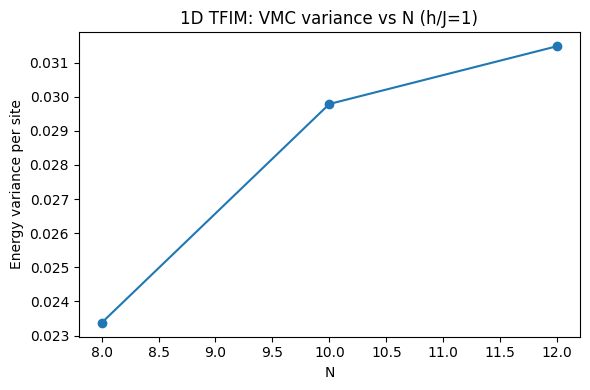

In [4]:
h = 1.0
N_values = [8, 10, 12]
variances = []

for N in N_values:
    chain = nk.graph.Chain(length=N, pbc=True)
    hilbert, H = make_tfim(chain, J=J, h=h)
    _, var = run_vmc(H, hilbert, alpha=2, n_iter=150, n_samples=1024, lr=0.05)
    variances.append(var / N)

plt.figure(figsize=(6, 4))
plt.plot(N_values, variances, 'o-')
plt.xlabel('N')
plt.ylabel('Energy variance per site')
plt.title('1D TFIM: VMC variance vs N (h/J=1)')
plt.tight_layout()
plt.show()


### Notes
- Increase `n_samples` and `n_iter` for smoother curves.
- Try larger `alpha` for improved VMC accuracy.
- For 2D, ED quickly becomes infeasible; use VMC only or smaller grids.
